In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.cm as cm
from matplotlib import pyplot as plt
from scipy import stats as st
import seaborn as sns

from IPython.core.pylabtools import figsize

import numpy.random as r
from pylab import *
from matplotlib.gridspec import GridSpec

import sys
sys.path.insert(0, '../../utils')
import splicing_utils as spu
import single_cell_plots as scp
from single_cell_plots import *

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"


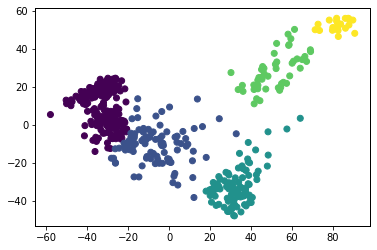

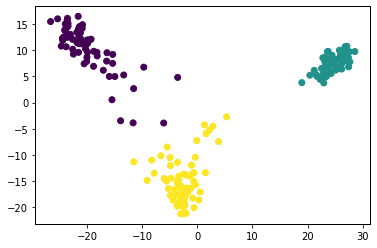

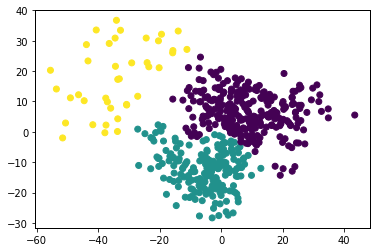

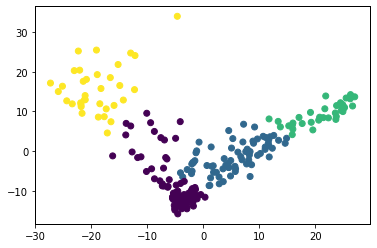

In [2]:
%run -i 'load_data.py'

In [3]:
# import importlib
# importlib.reload(scp)
# importlib.reload(spu)
# sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

In [4]:
# Already ran

# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Cadm1_2', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Cadm1_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)

# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Rpn2_1', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Clta_4', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Mff_3', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Tecr_4', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Idh3g_1', 10, plot_dir='plots_review/figure3/events/')
# scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
#              'Zfp207_1', 10, plot_dir='plots_review/figure3/events/')


In [5]:
from sklearn.decomposition import PCA
from scipy.stats import spearmanr
import rpy2
import rpy2.robjects.packages as rpackages
import rpy2.robjects as robjects
import rpy2.robjects.numpy2ri as rpyn
from statsmodels.stats.multitest import multipletests
dt = rpy2.robjects.packages.importr('diptest')

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


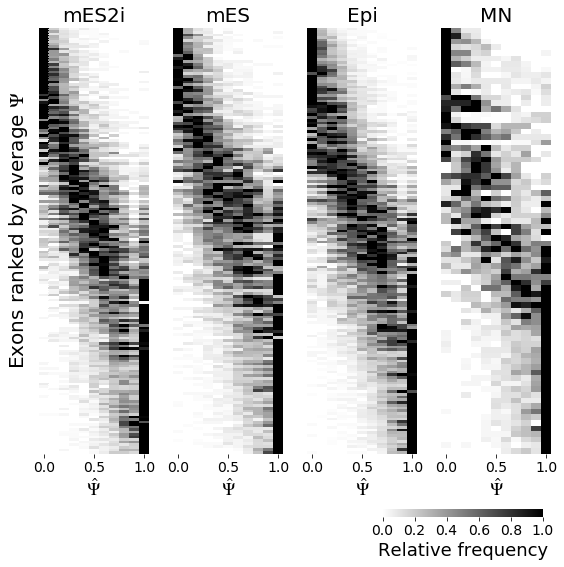

In [6]:
chen_ES2i_filtered = process_subpop(chen_ES2i, chen_PSI, chen_mrna_counts, 
                                    mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_ES_filtered = process_subpop(chen_ES, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_Epi_filtered = process_subpop(chen_Epi, chen_PSI, chen_mrna_counts, 
                                   mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)
chen_MN_filtered = process_subpop(chen_MN, chen_PSI, chen_mrna_counts, 
                                  mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [chen_ES2i_filtered[4], chen_ES_filtered[4], chen_Epi_filtered[4], chen_MN_filtered[4]]

dset_name_list = ['mES2i', 'mES', 'Epi', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'chen_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

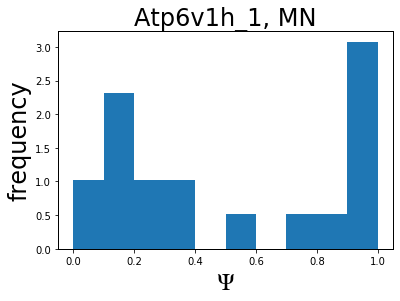

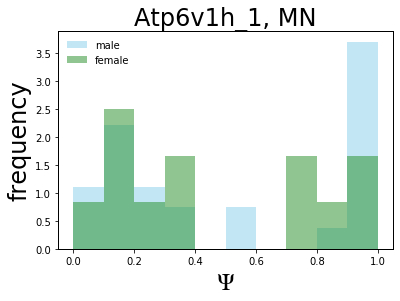

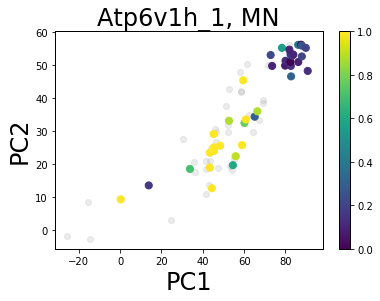

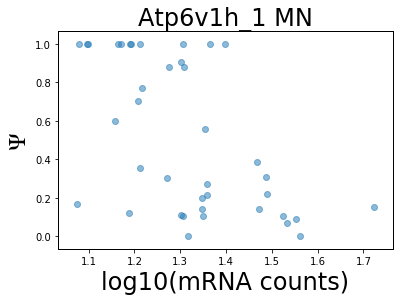

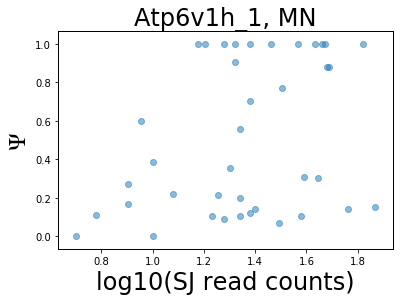

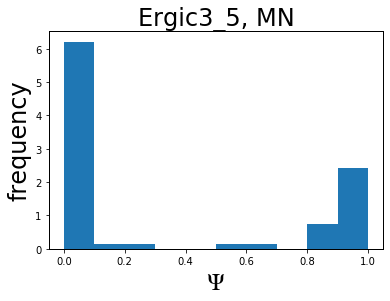

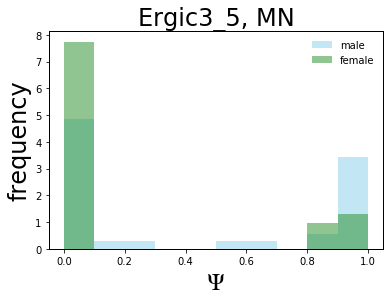

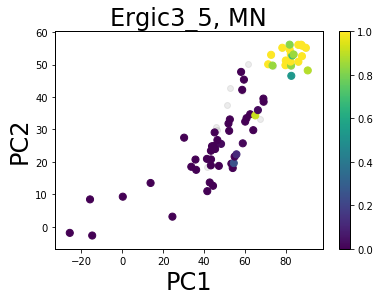

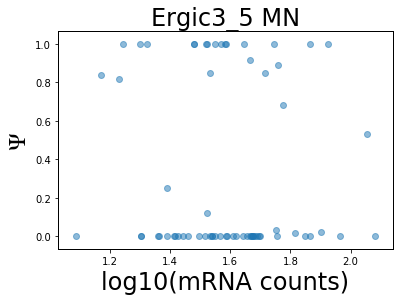

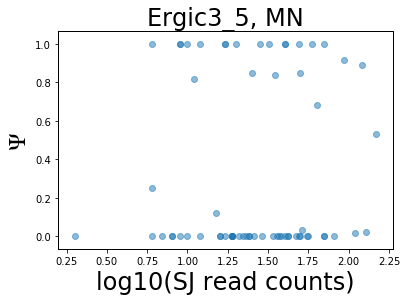

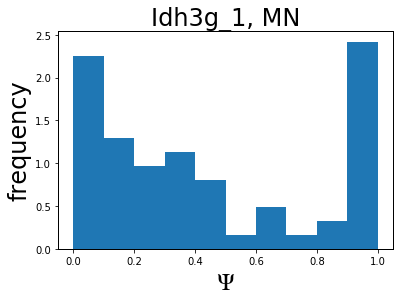

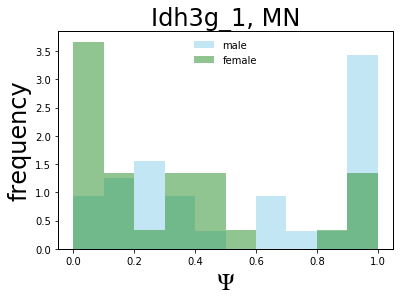

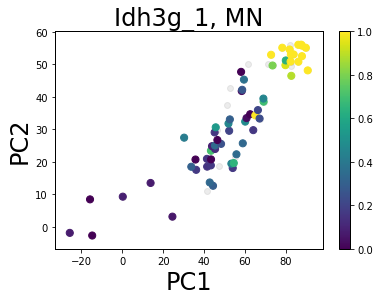

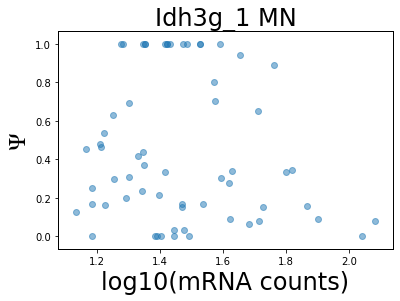

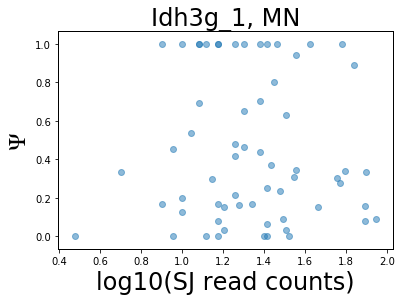

In [7]:
figsize(6, 4)
filtered_bimodal([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
                 ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


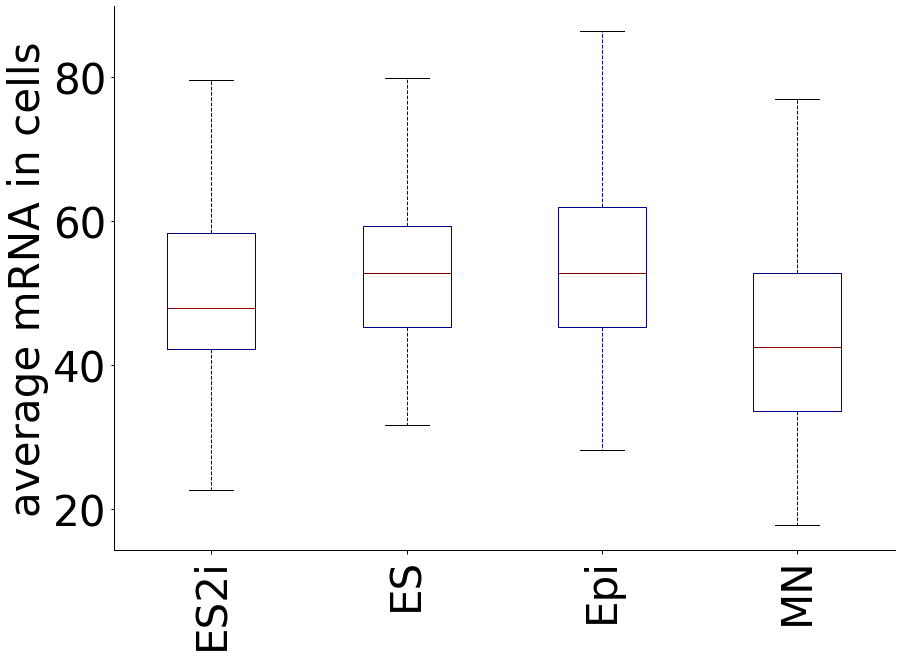

In [8]:


dset_names = ['ES2i', 'ES', 'Epi', 'MN']

scp.plot_boxplot([chen_ES2i_filtered[2].mean(),chen_ES_filtered[2].mean(), 
                  chen_Epi_filtered[2].mean(), chen_MN_filtered[2].mean()], 
                 'average mRNA in cells', dset_names, 
                 'chen_mean_mrna_cell_types',
                 xlocs = np.array([1, 2, 3, 4]), save_dir='plots_review/figure3/')

plt.show()

In [9]:
# figsize(4,3)
# hartigan_multiple_test([chen_ES2i_filtered, chen_ES_filtered, chen_Epi_filtered, chen_MN_filtered], 
#                  ['ES2i', 'ES', 'Epi', 'MN'], chen_pca, mrna_per_event_chen, 
#                      chen_read_counts, quantile = 0.25, psi_lim = 0.25)

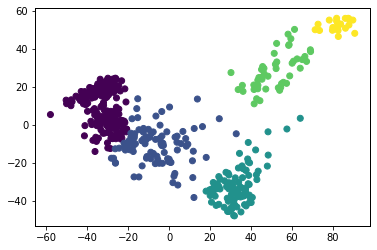

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


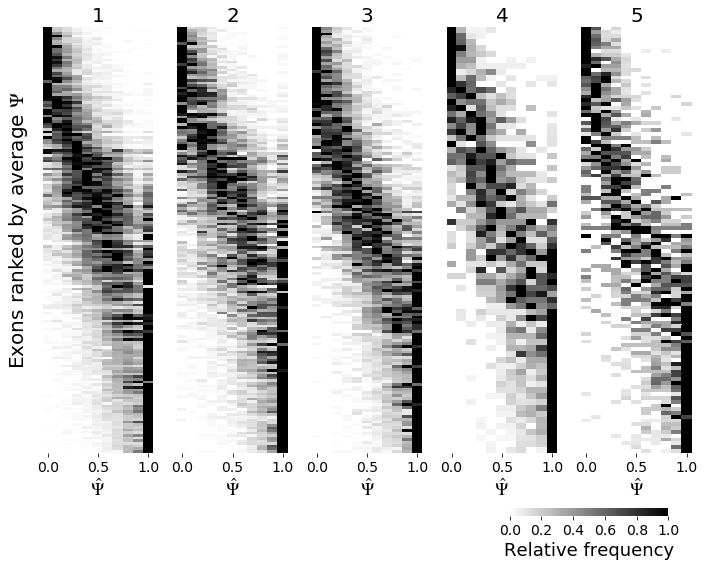

In [10]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=5)
ac_clusters = ac.fit_predict(chen_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(chen_pca.PC1, chen_pca.PC2, c=ac_clusters)
plt.show()

chen_pca_clust = chen_pca.copy()
chen_pca_clust['AC'] = ac_clusters

chen_clust_filter = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    
    chen_filter = process_subpop(clust_subpop, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    chen_clust_filter.append(chen_filter)
    
    
hist_list = [x[4] for x in chen_clust_filter]

dset_name_list = ['1', '2', '3', '4', '5']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'chen_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

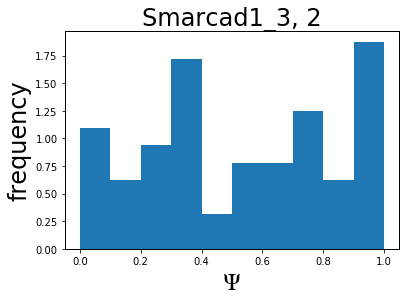

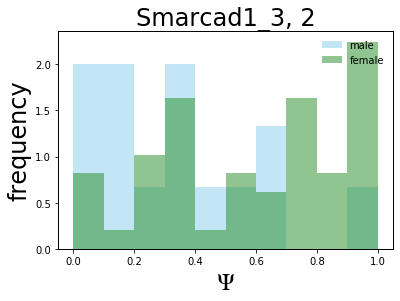

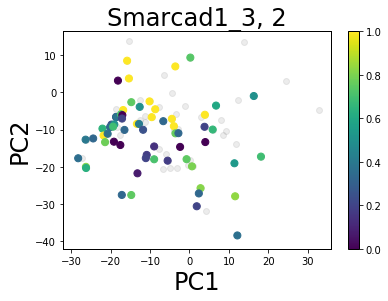

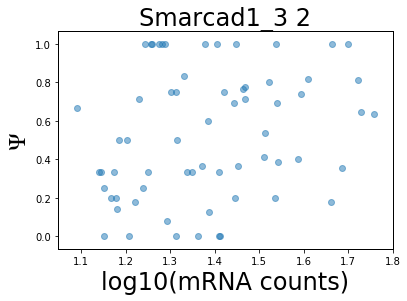

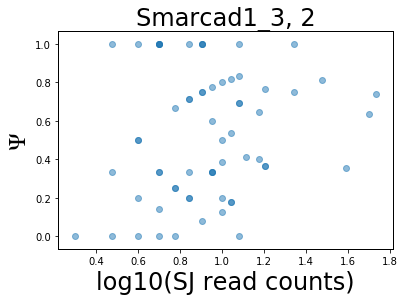

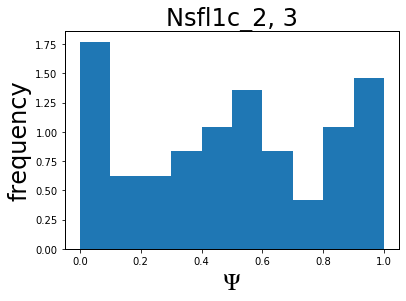

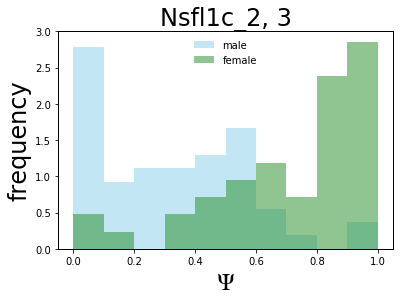

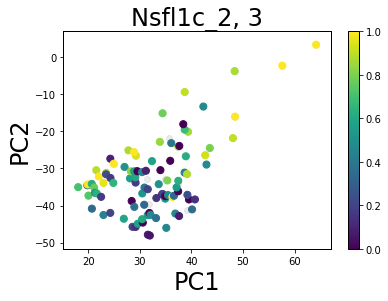

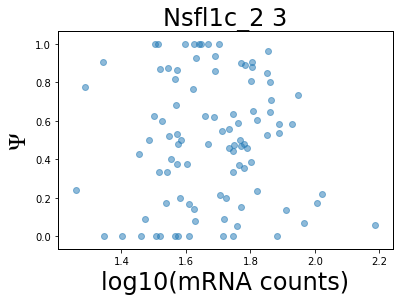

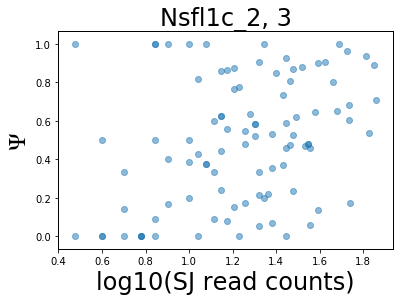

In [11]:
figsize(6, 4)
filtered_bimodal(chen_clust_filter, dset_name_list, chen_pca, mrna_per_event_chen, 
                     chen_read_counts, quantile = 0.25, psi_lim = 0.25)

In [12]:
[x[0].shape[0] for x in chen_clust_filter]

[160, 163, 146, 71, 113]

In [13]:
ex_list = []
for x in chen_clust_filter:
    ex_list.extend(list(x[0].index))
    
print(len(set(ex_list)))

319


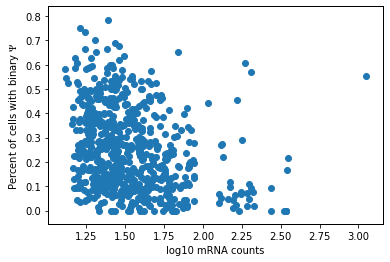

(-0.2956954662279252, 1.2111497560413672e-14)


In [14]:
x_axis = []
y_axis = []

for i in range(5):
    x_axis.extend(list(np.log10(chen_clust_filter[i][2].median(axis=1))))
    y_axis.extend((np.abs(0.5 - chen_clust_filter[i][0]) == 0.5).sum(axis=1) / ((~chen_clust_filter[i][0].isna()).sum(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.xlabel('log10 mRNA counts')
plt.ylabel('Percent of cells with binary $\Psi$')
plt.show()

print(pearsonr(x_axis,y_axis))

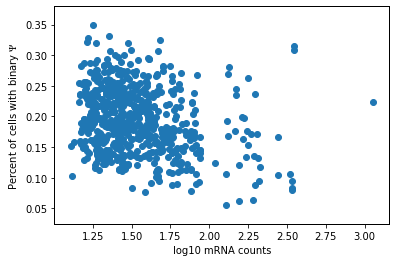

(-0.26247734253506705, 9.472966578426996e-12)


In [15]:
x_axis = []
y_axis = []

for i in range(5):
    x_axis.extend(list(np.log10(chen_clust_filter[i][2].median(axis=1))))
    y_axis.extend(list(chen_clust_filter[i][0].std(axis=1)))
    
    
figsize(6,4)
plt.scatter(x_axis,y_axis)
plt.xlabel('log10 mRNA counts')
plt.ylabel('Percent of cells with binary $\Psi$')
plt.show()

print(pearsonr(x_axis,y_axis))

/home/cfbuenabadn/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:61: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return bound(*args, **kwds)


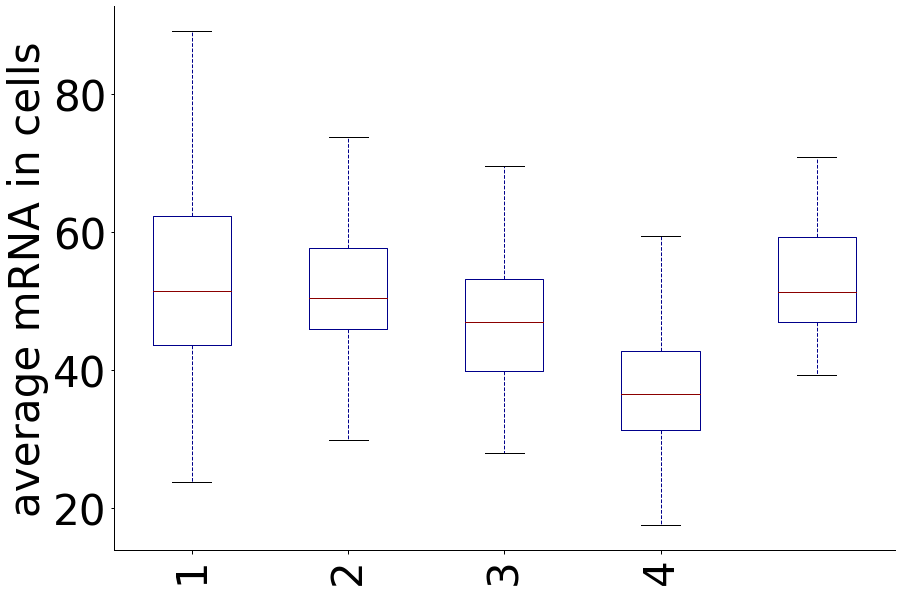

In [16]:
scp.plot_boxplot([x[2].mean() for x in chen_clust_filter], 
                 'average mRNA in cells', dset_name_list, 
                 'chen_mean_mrna_filtered_clusters',
                 xlocs = np.array([1, 2, 3, 4]), save_dir='plots_review/figure3/')

plt.show()

In [17]:
# figsize(6, 4)
# hartigan_multiple_test(chen_clust_filter, dset_name_list, chen_pca, mrna_per_event_chen, 
#                      chen_read_counts, quantile = 0.25, psi_lim = 0.25)

In [18]:
# chen_filtered = process_subpop(chen_PSI.columns, chen_PSI, chen_mrna_counts, 
#                                     mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.05, 10)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


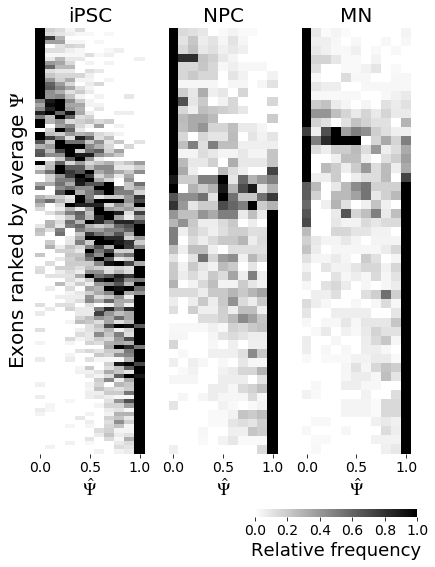

In [19]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, 
                                    mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [song_iPSC_filtered[4], song_NPC_filtered[4], song_MN_filtered[4]]

dset_name_list = ['iPSC', 'NPC', 'MN']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'song_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

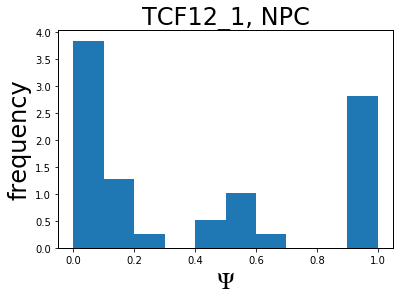

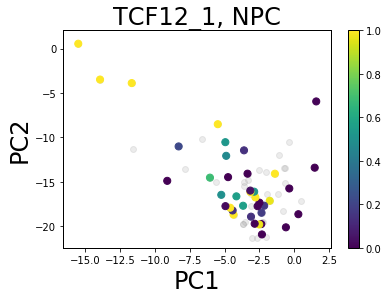

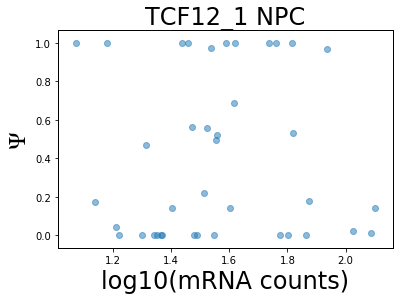

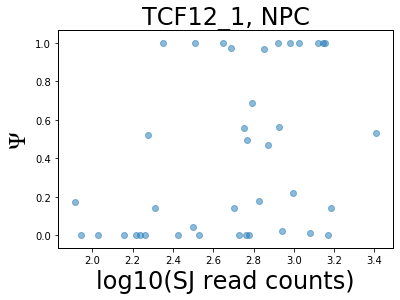

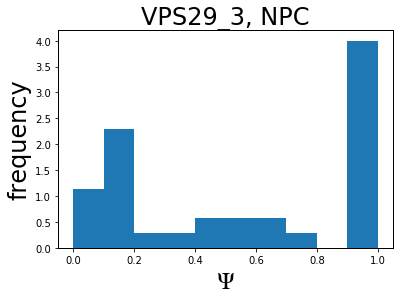

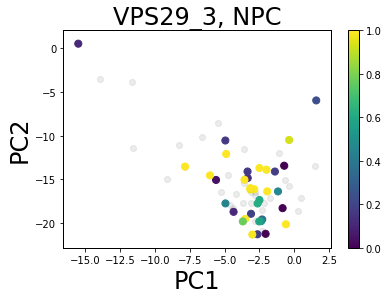

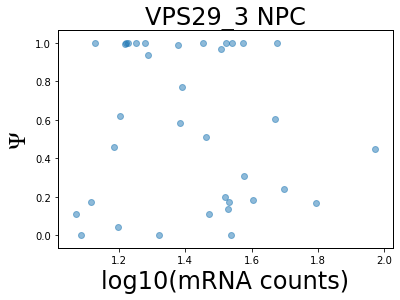

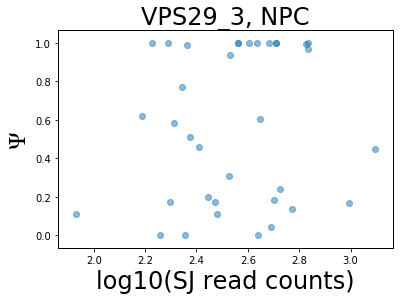

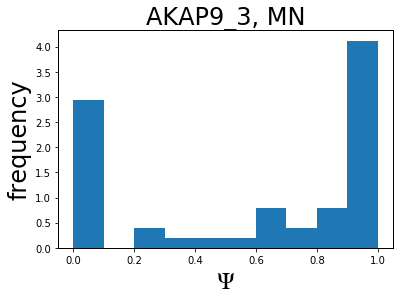

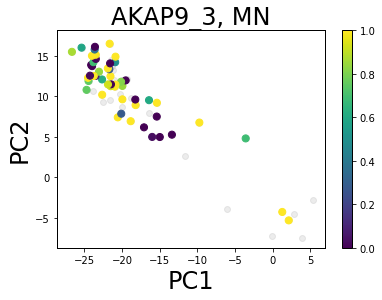

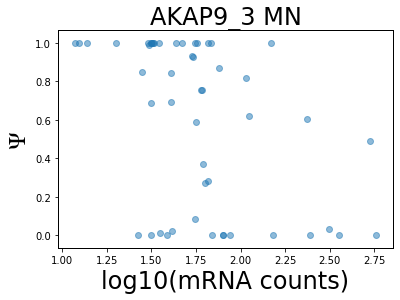

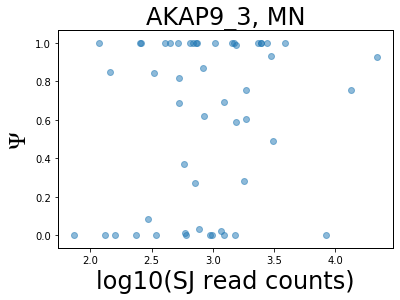

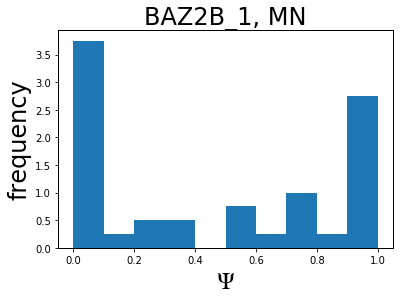

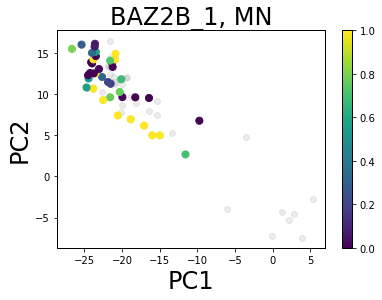

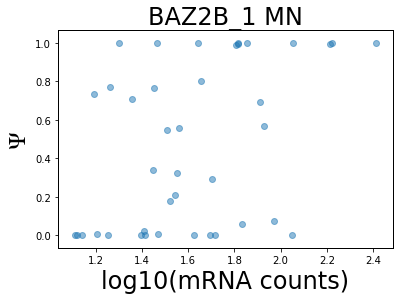

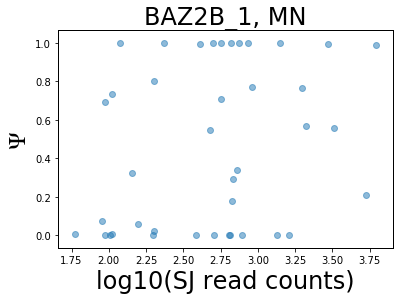

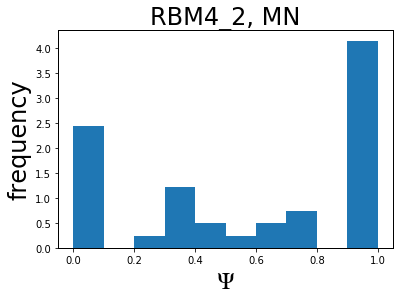

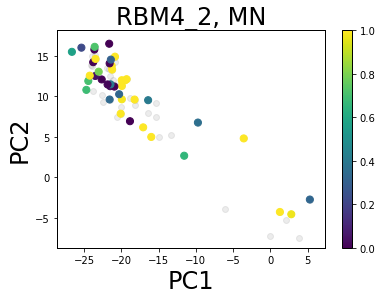

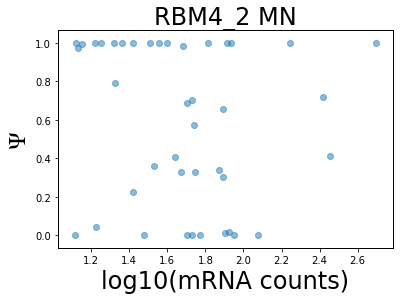

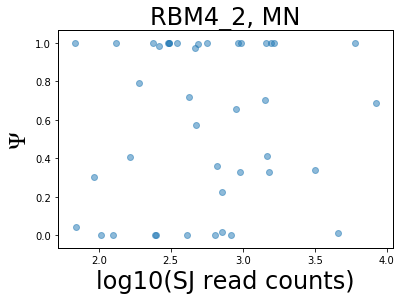

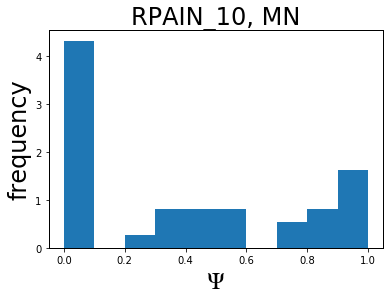

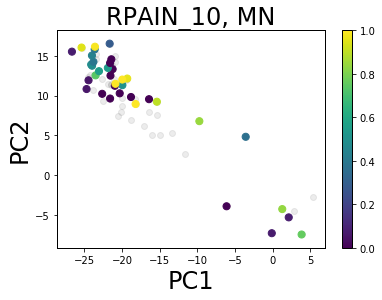

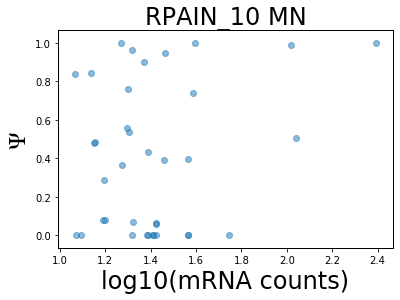

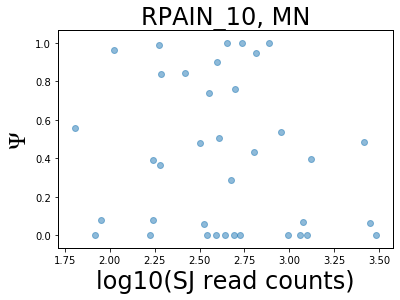

In [20]:
figsize(6, 4)
filtered_bimodal([song_iPSC_filtered, song_NPC_filtered, song_MN_filtered], 
                 ['iPSC', 'NPC', 'MN'], song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

In [21]:
song_MN_filtered[0].loc['RBM4_2'].loc[song_MN_filtered[2].loc['RBM4_2'].sort_values().dropna().index]

SRR4047299    0.000000
SRR4047319    1.000000
SRR4047296    0.974684
SRR4047334    0.995943
SRR4047326    1.000000
SRR4047343    0.045455
SRR4047335    1.000000
SRR4047340    1.000000
SRR4047341    0.790476
SRR4047293    1.000000
SRR4047351    0.999669
SRR4047285    0.225086
SRR4047280    0.000000
SRR4047279    1.000000
SRR4047292    0.362615
SRR4047333    1.000000
SRR4047344    1.000000
SRR4047325    0.404255
SRR4047297    0.326345
SRR4047317    0.984791
SRR4047283    0.000000
SRR4047352    0.686884
SRR4047339    0.000000
SRR4047287    0.705463
SRR4047338    0.571906
SRR4047289    0.329825
SRR4047308    0.000000
SRR4047316    1.000000
SRR4047347    0.337692
SRR4047342    0.658900
SRR4047322    0.304965
SRR4047350    0.013216
SRR4047321    1.000000
SRR4047286    0.015647
SRR4047303    1.000000
SRR4047318    0.000000
SRR4047305    0.001565
SRR4047312    0.998623
SRR4047311    0.718941
SRR4047306    0.409899
SRR4047314    1.000000
Name: RBM4_2, dtype: float64

In [22]:
song_MN_filtered[2].loc['RBM4_2'].sort_values().dropna().index

Index(['SRR4047299', 'SRR4047319', 'SRR4047296', 'SRR4047334', 'SRR4047326',
       'SRR4047343', 'SRR4047335', 'SRR4047340', 'SRR4047341', 'SRR4047293',
       'SRR4047351', 'SRR4047285', 'SRR4047280', 'SRR4047279', 'SRR4047292',
       'SRR4047333', 'SRR4047344', 'SRR4047325', 'SRR4047297', 'SRR4047317',
       'SRR4047283', 'SRR4047352', 'SRR4047339', 'SRR4047287', 'SRR4047338',
       'SRR4047289', 'SRR4047308', 'SRR4047316', 'SRR4047347', 'SRR4047342',
       'SRR4047322', 'SRR4047350', 'SRR4047321', 'SRR4047286', 'SRR4047303',
       'SRR4047318', 'SRR4047305', 'SRR4047312', 'SRR4047311', 'SRR4047306',
       'SRR4047314'],
      dtype='object')

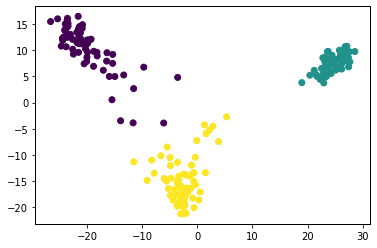

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


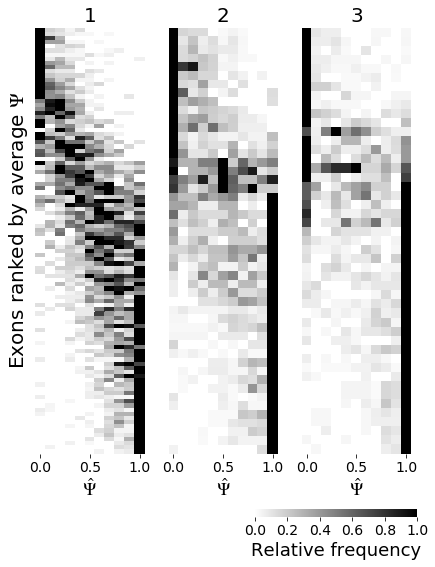

In [23]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(song_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(song_pca.PC1, song_pca.PC2, c=ac_clusters)
plt.show()

song_pca_clust = song_pca.copy()
song_pca_clust['AC'] = ac_clusters

song_clust_filter = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    
    song_filter = process_subpop(clust_subpop, song_PSI, song_mrna_counts, mrna_per_event_song, 
                                 song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    song_clust_filter.append(song_filter)
    
    
hist_list = [x[4] for x in song_clust_filter]

dset_name_list = ['1', '2', '3']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'song_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

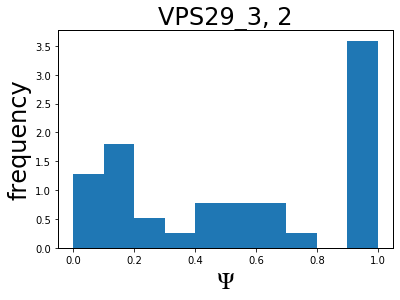

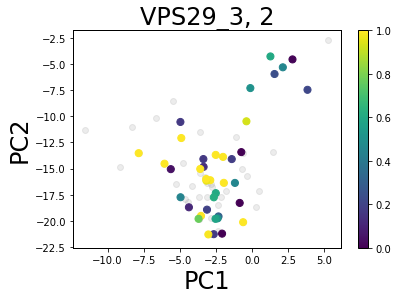

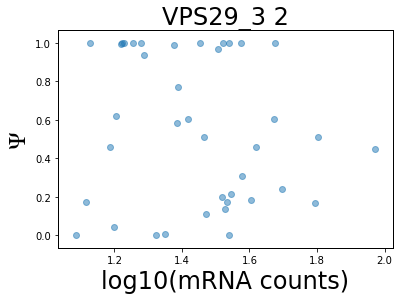

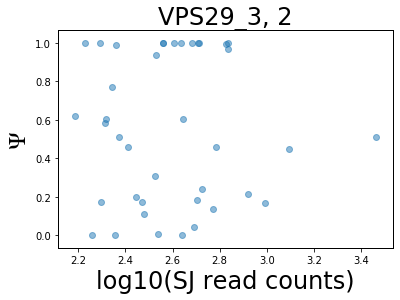

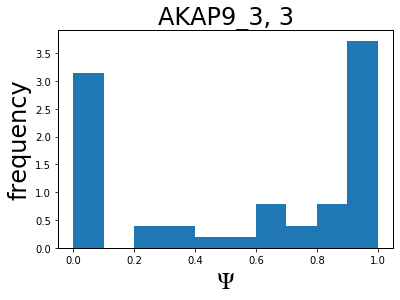

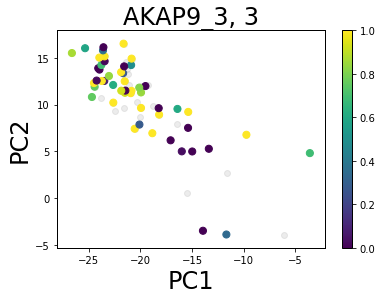

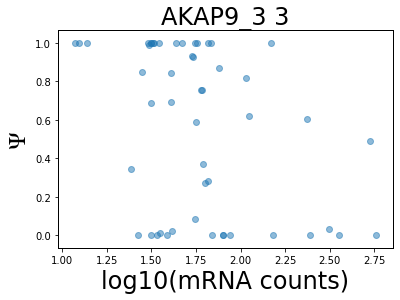

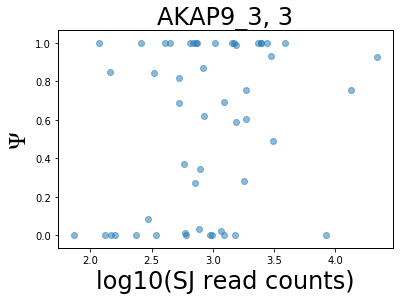

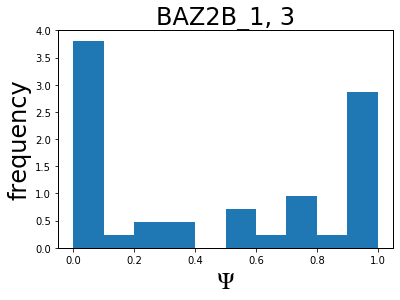

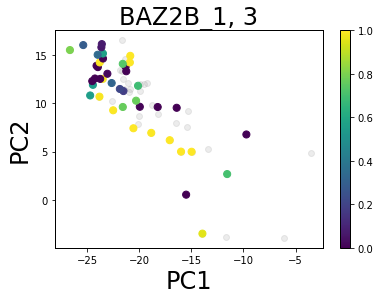

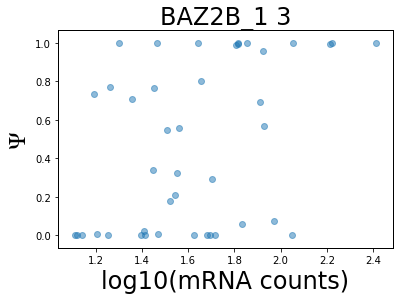

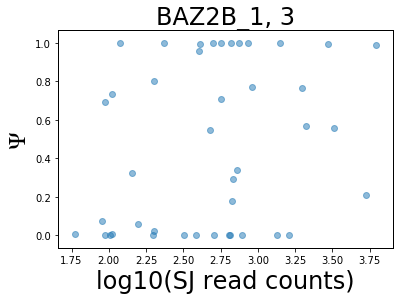

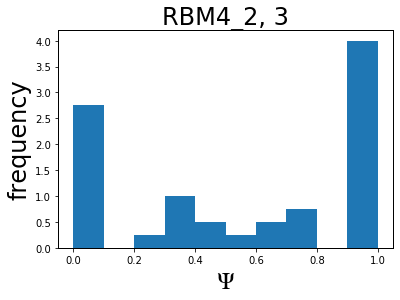

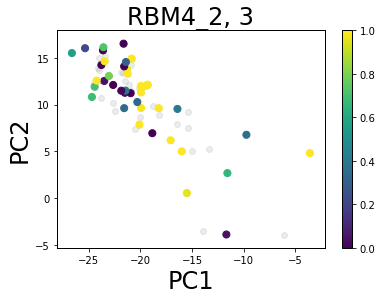

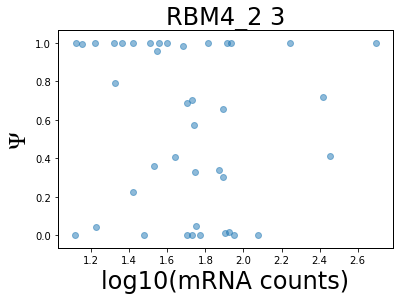

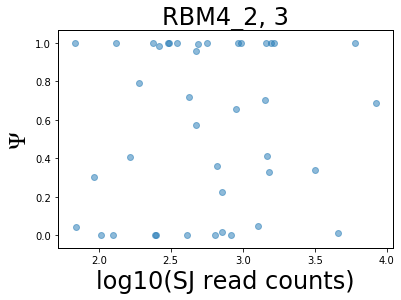

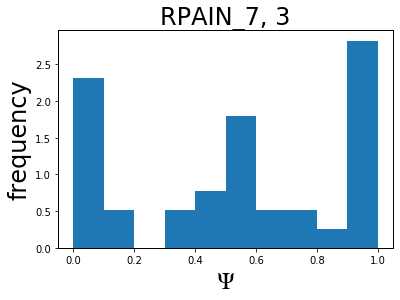

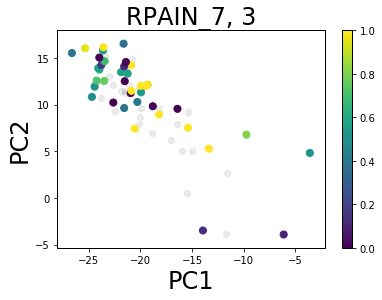

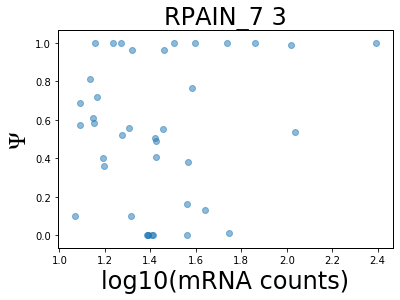

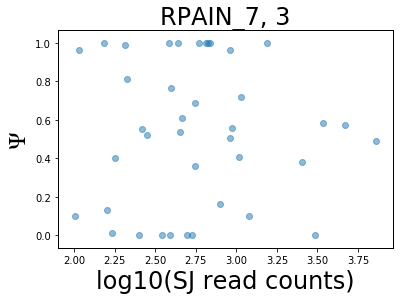

In [24]:
figsize(6, 4)
filtered_bimodal(song_clust_filter, dset_name_list, song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


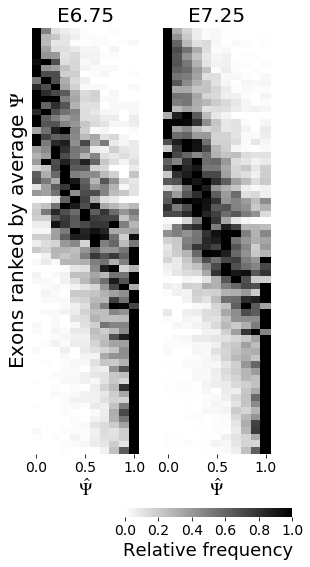

In [25]:
lescroart_E6_filtered = process_subpop(lescroart_E6, lescroart_PSI, lescroart_mrna_counts, 
                                    mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)
lescroart_E7_filtered = process_subpop(lescroart_E7, lescroart_PSI, lescroart_mrna_counts, 
                                  mrna_per_event_lescroart, lescroart_read_counts, 
                                       lescroart_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [lescroart_E6_filtered[4], lescroart_E7_filtered[4]]

dset_name_list = ['E6.75', 'E7.25']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'lescroart_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [26]:
figsize(6, 4)
filtered_bimodal([lescroart_E6_filtered, lescroart_E7_filtered], 
                 ['6', '7'], song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

In [27]:
print(lescroart_E6_filtered[0].shape[0])
print(lescroart_E7_filtered[0].shape[0])
print(len(set(list(lescroart_E6_filtered[0].index)+list(lescroart_E7_filtered[0].index))))

68
65
77


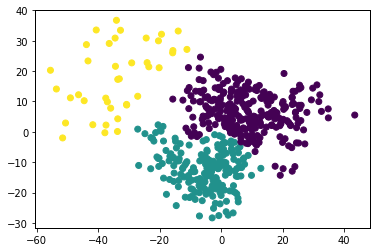

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


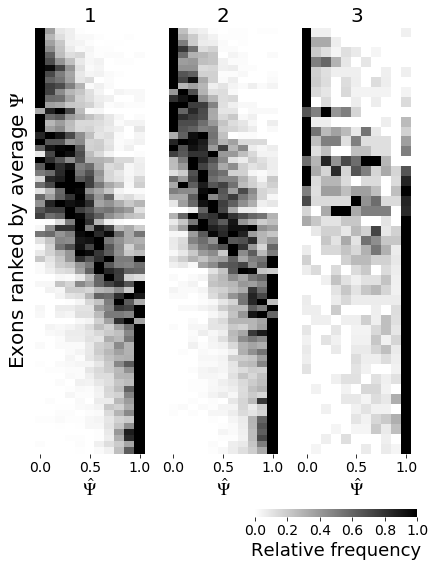

In [28]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=3)
ac_clusters = ac.fit_predict(lescroart_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(lescroart_pca.PC1, lescroart_pca.PC2, c=ac_clusters)
plt.show()

lescroart_pca_clust = lescroart_pca.copy()
lescroart_pca_clust['AC'] = ac_clusters

lescroart_clust_filter = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    
    lescroart_filter = process_subpop(clust_subpop, lescroart_PSI, lescroart_mrna_counts, mrna_per_event_lescroart, 
                                 lescroart_read_counts, lescroart_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    lescroart_clust_filter.append(lescroart_filter)
    
    
hist_list = [x[4] for x in lescroart_clust_filter]

dset_name_list = ['1', '2', '3']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'lescroart_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


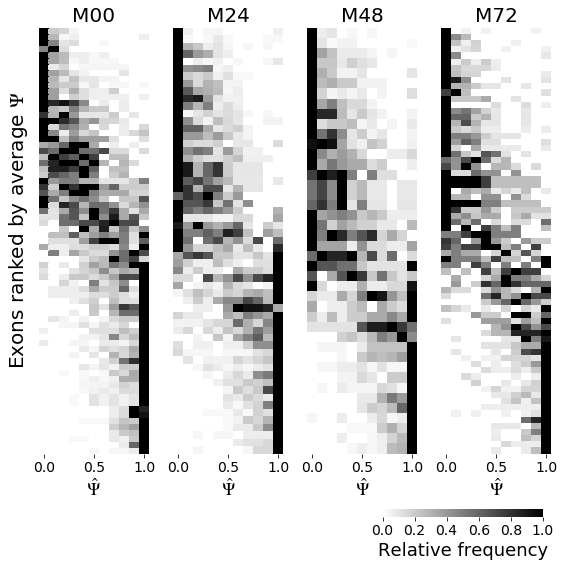

In [29]:
trapnell_M00_filtered = process_subpop(trapnell_M00, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M24_filtered = process_subpop(trapnell_M24, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M48_filtered = process_subpop(trapnell_M48, trapnell_PSI, trapnell_mrna_counts, 
                                    mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)
trapnell_M72_filtered = process_subpop(trapnell_M72, trapnell_PSI, trapnell_mrna_counts, 
                                  mrna_per_event_trapnell, trapnell_read_counts, 
                                       trapnell_coverage_tab['SJ_coverage'], 0.1, 10)

hist_list = [trapnell_M00_filtered[4], trapnell_M24_filtered[4], trapnell_M48_filtered[4], trapnell_M72_filtered[4]]

dset_name_list = ['M00', 'M24', 'M48', 'M72']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure1/', plot_name = 'trapnell_filtered_distributions_cell_type',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

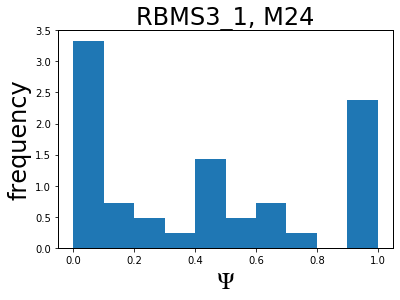

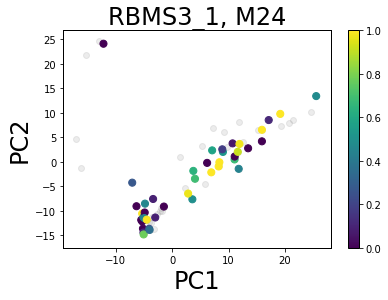

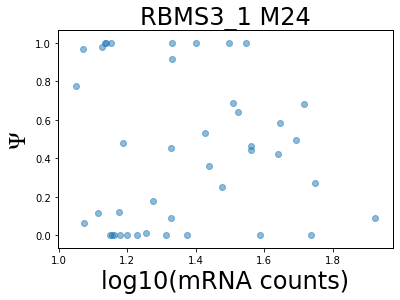

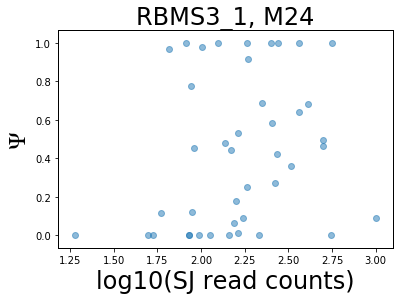

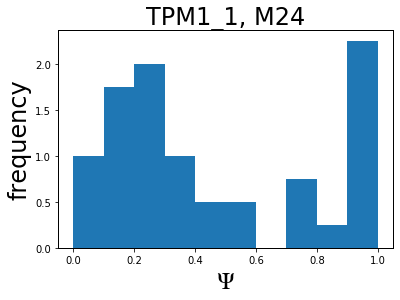

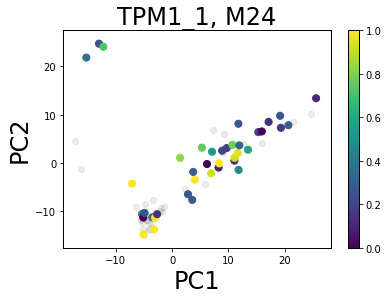

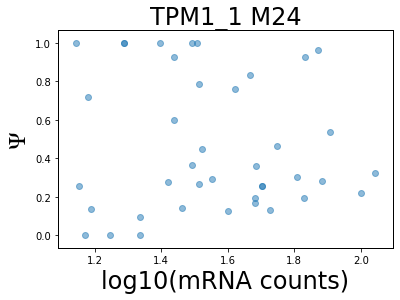

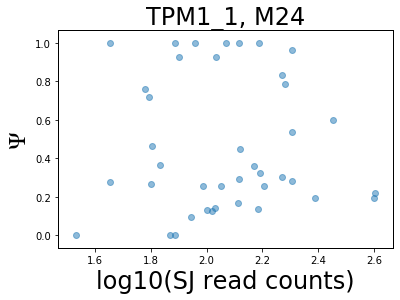

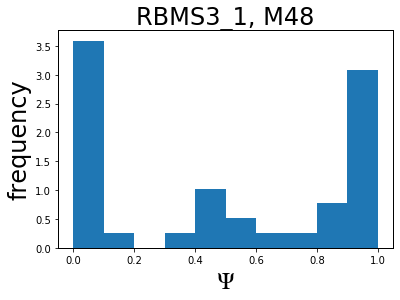

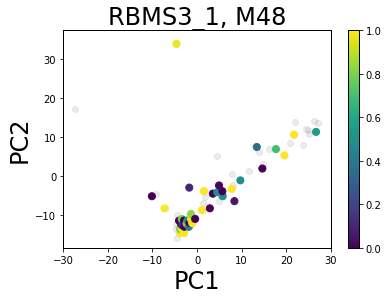

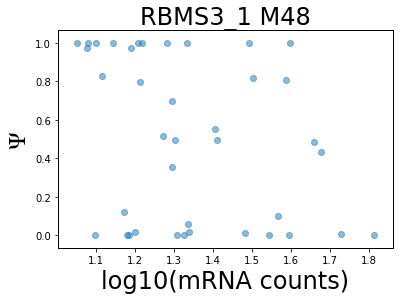

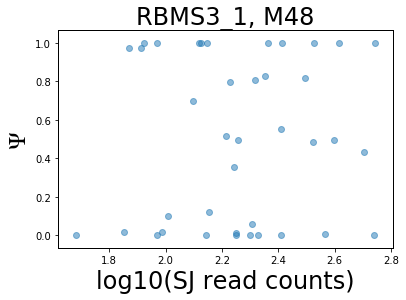

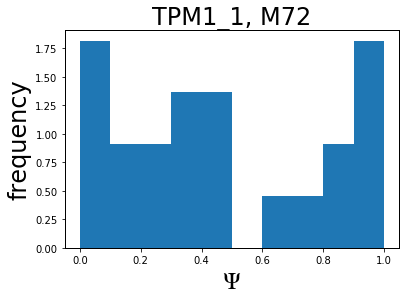

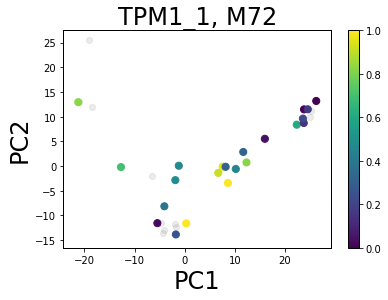

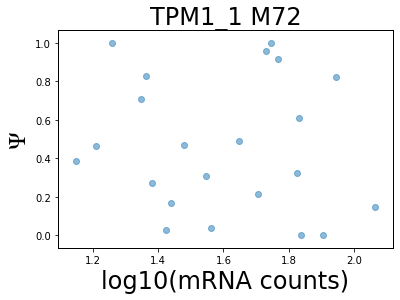

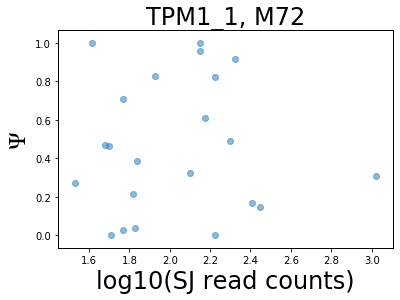

In [30]:
trapnell_groups = [trapnell_M00_filtered, trapnell_M24_filtered, trapnell_M48_filtered, trapnell_M72_filtered]
figsize(6, 4)
filtered_bimodal(trapnell_groups, ['M00', 'M24', 'M48', 'M72'], trapnell_pca, mrna_per_event_trapnell, 
                     trapnell_read_counts, quantile = 0.25, psi_lim = 0.25)

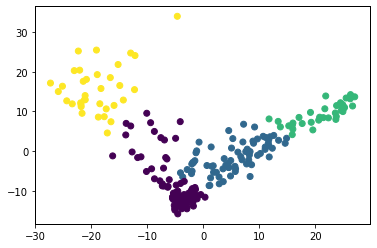

../../utils/single_cell_plots.py:849: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0.05, 0.235, 1, 0.95])


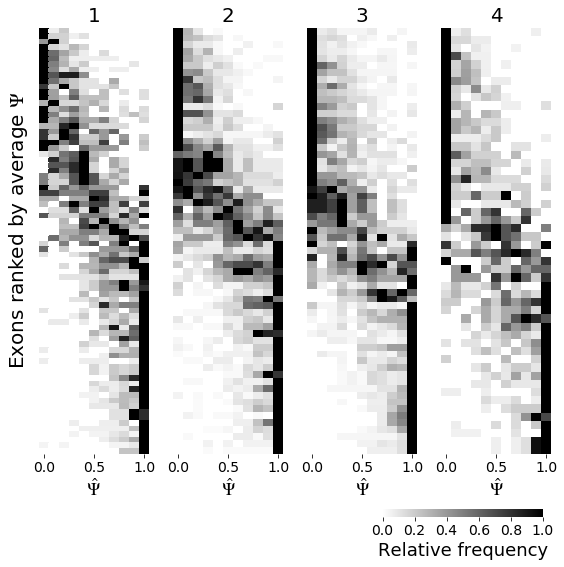

In [31]:
# from sklearn.cluster import AgglomerativeClustering

ac = AgglomerativeClustering(n_clusters=4)
ac_clusters = ac.fit_predict(trapnell_pca[['PC1', 'PC2']])

figsize(6,4)
plt.scatter(trapnell_pca.PC1, trapnell_pca.PC2, c=ac_clusters)
plt.show()

trapnell_pca_clust = trapnell_pca.copy()
trapnell_pca_clust['AC'] = ac_clusters

trapnell_clust_filter = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    
    trapnell_filter = process_subpop(clust_subpop, trapnell_PSI, trapnell_mrna_counts, mrna_per_event_trapnell, 
                                 trapnell_read_counts, trapnell_coverage_tab['SJ_coverage'], 0.1, 10, 0, cell_min=0.5)
    
    trapnell_clust_filter.append(trapnell_filter)
    
    
hist_list = [x[4] for x in trapnell_clust_filter]

dset_name_list = ['1', '2', '3', '4']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots_review/figure3/', plot_name = 'trapnell_PSI_distributions_filtered_clusters',
                    plot_title = "", 
                    ylab='Exons ranked by average $\Psi$', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

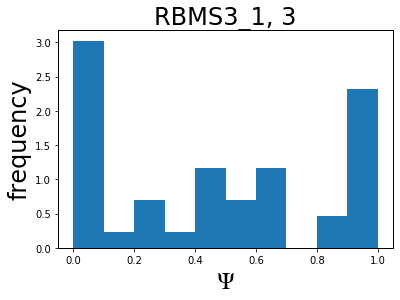

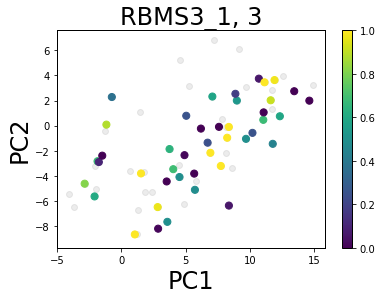

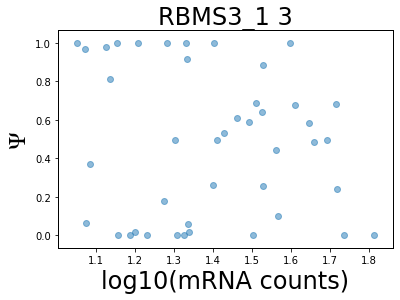

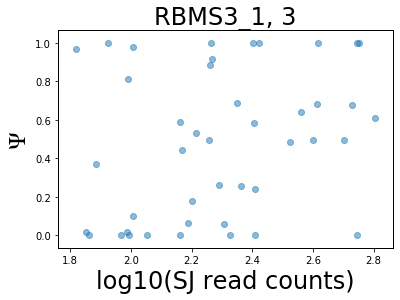

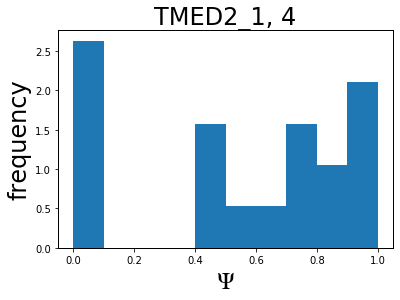

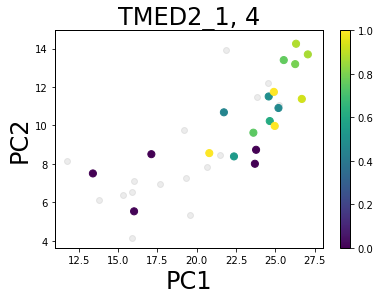

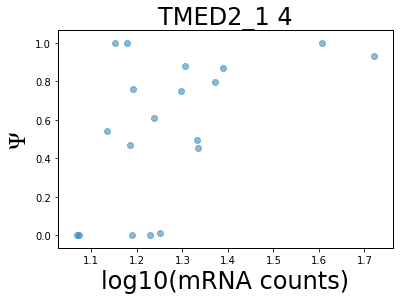

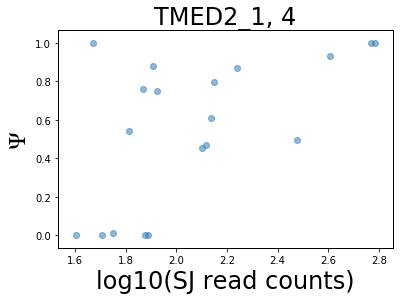

In [32]:
figsize(6, 4)
filtered_bimodal(trapnell_clust_filter, dset_name_list, trapnell_pca, mrna_per_event_trapnell, 
                     trapnell_read_counts, quantile = 0.25, psi_lim = 0.25)

In [33]:
trapnell_clust_filter[0][0].index

Index(['AKR1A1_1', 'ALDOA_1', 'ANAPC11_5', 'ANAPC11_6', 'ANXA2_2', 'AP2M1_5',
       'ATP6V0B_2', 'CD59_6', 'CDKN3_1', 'CHRNA1_1', 'CHURC1_2', 'CHURC1_3',
       'CKLF_1', 'DGUOK_5', 'EIF3M_5', 'EIF4A2_2', 'EIF4A2_3',
       'EIF4A2_nmdSE_1', 'EIF4G2_1', 'EIF6_5', 'EMC4_3', 'FN1_1', 'FN1_2',
       'FN1_7', 'GAS5_1', 'HNRNPA2B1_4', 'HNRNPC_2', 'HNRNPR_1', 'HNRNPR_7',
       'ITGB1BP1_2', 'LAMP2_1', 'LRRC75A-AS1_10', 'LRRC75A-AS1_4',
       'LRRC75A-AS1_5', 'LRRC75A-AS1_8', 'MORF4L2_7', 'MORF4L2_8', 'MRPL33_1',
       'MRPS18C_5', 'MTCH2_1', 'MYL6_2', 'NQO1_3', 'NUSAP1_2', 'PCBP2_2',
       'PCBP2_9', 'PDZD11_1', 'RBM39_nmdSE_2', 'RHOC_2', 'RHOC_3', 'RHOC_4',
       'RHOC_5', 'RHOC_6', 'RPLP0_1', 'RPLP0_3', 'RPS24_1', 'SEPT2_14',
       'SEPT7_1', 'SEPT7_11', 'SEPT7_2', 'SEPT7_6', 'SNHG5_12',
       'SRSF10_nmdSE_1', 'SRSF7_5', 'SRSF7_nmdSE_1', 'SYNCRIP_1', 'TFPI_12',
       'TFPI_4', 'TPM1_2', 'TXN2_2', 'VKORC1_1', 'VPS29_3', 'VPS29_6',
       'VPS29_9', 'ZFAS1_1', 'ZFAS1_3', 'ZNF207_1

In [34]:
song_modalities = pd.read_csv('../../../data/song/song_event_modalities.tab', sep='\t', index_col = 0)

AASS_11
excluded


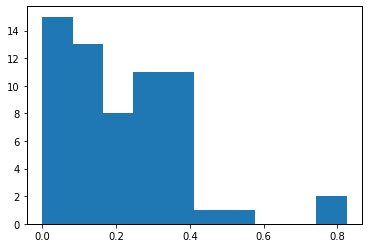

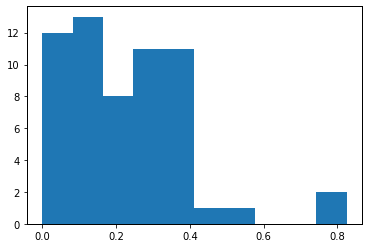

AASS_9
included


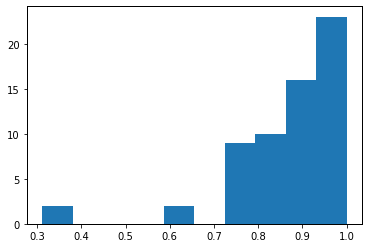

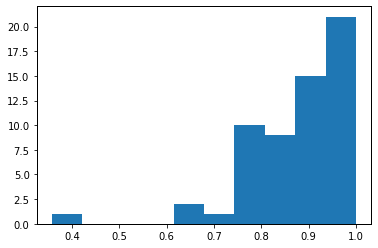

ACP1_1
included


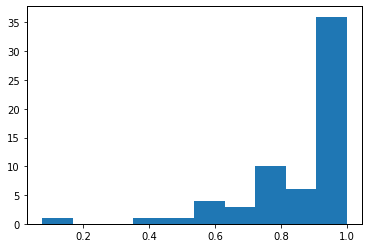

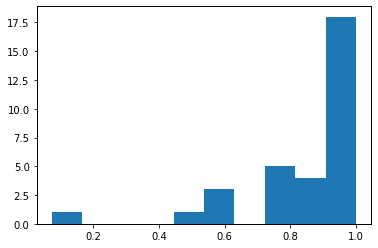

ACP1_2
excluded


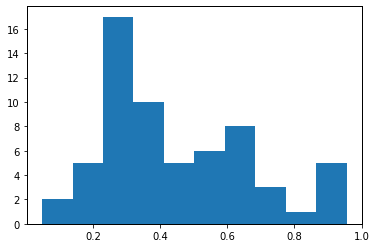

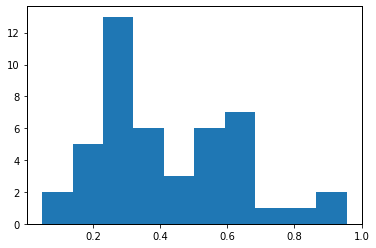

ADSL_1
included


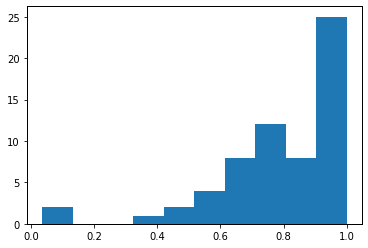

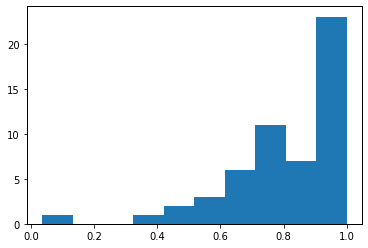

AKR1A1_1
uncategorized


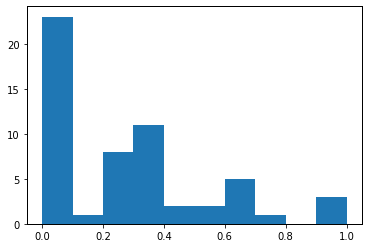

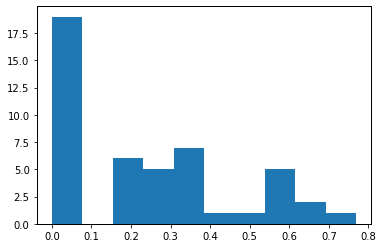

AKR1A1_5
uncategorized


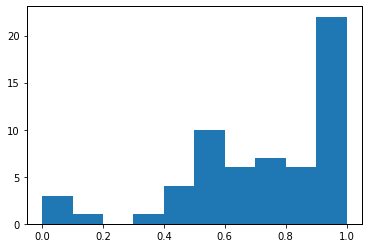

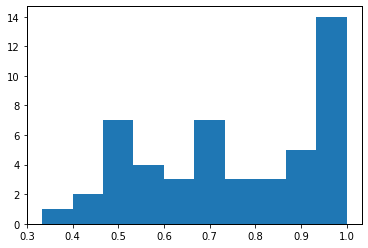

ALDOA_1
excluded


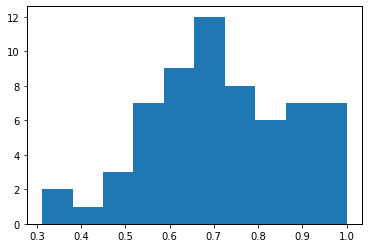

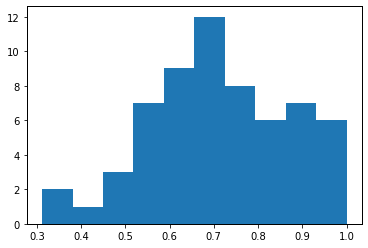

ANAPC11_3
bimodal


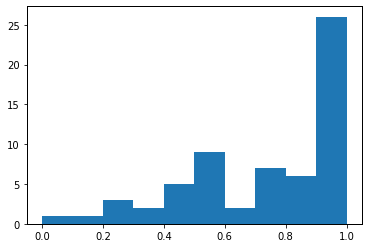

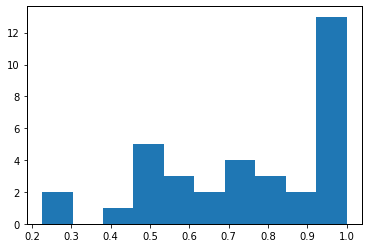

ANAPC11_6
uncategorized


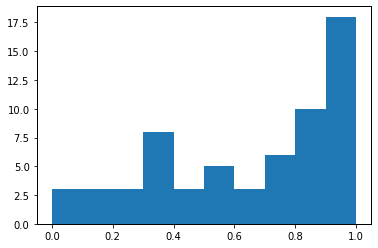

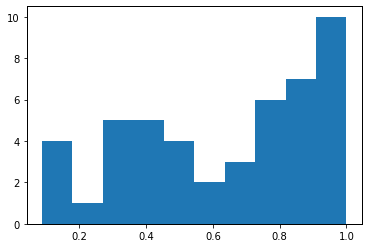

C8orf59_1
included


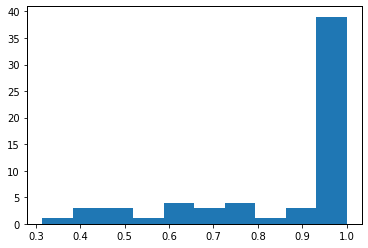

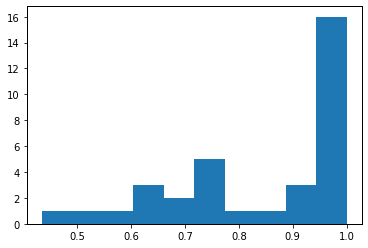

C8orf59_2
uncategorized


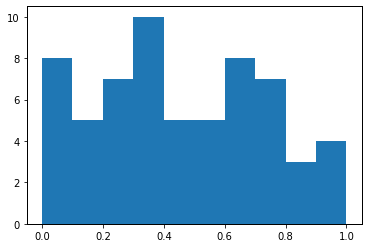

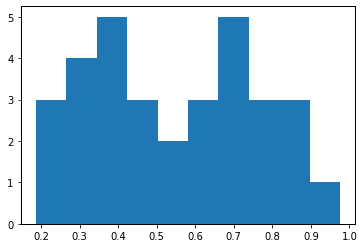

COA1_1
excluded


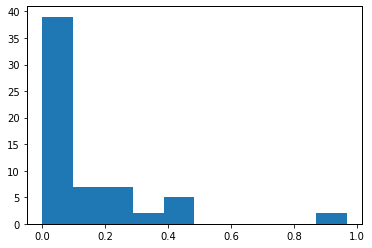

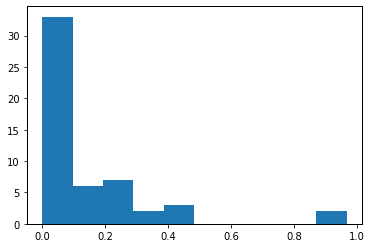

COA4_1
excluded


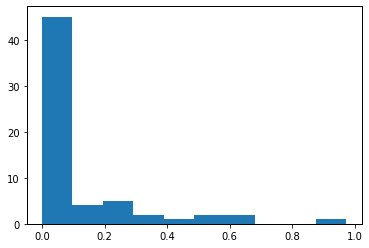

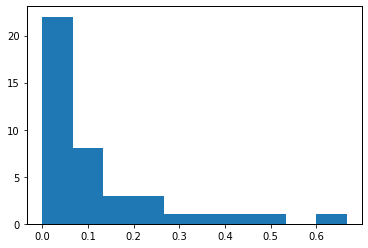

CSDE1_4
excluded


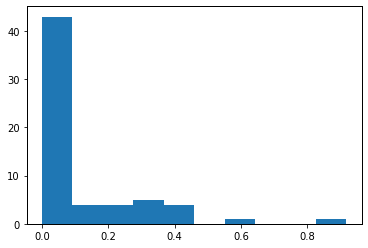

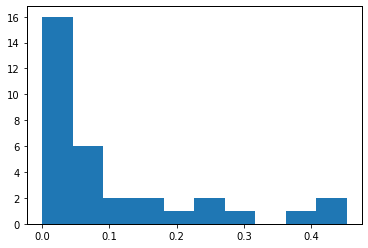

CSNK1A1_4
excluded


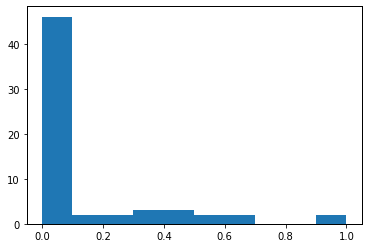

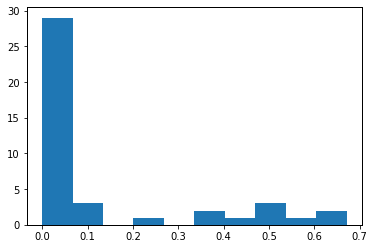

DGUOK_3
included


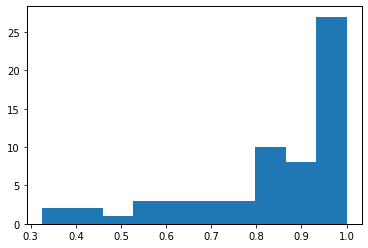

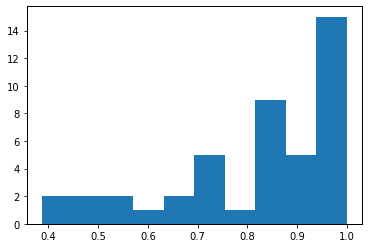

DGUOK_7
excluded


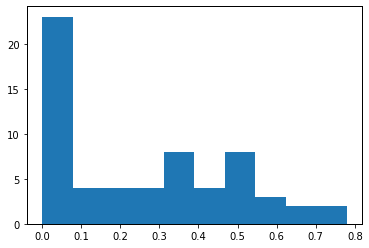

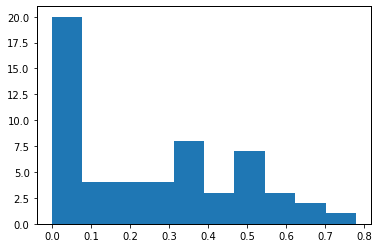

DGUOK_9
excluded


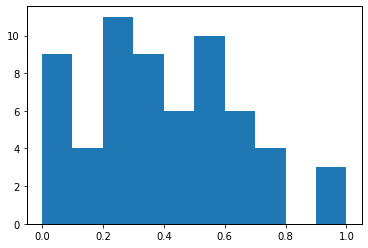

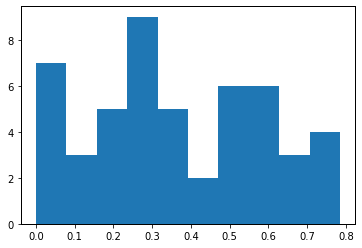

DMKN_18
uncategorized


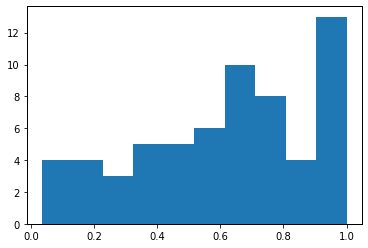

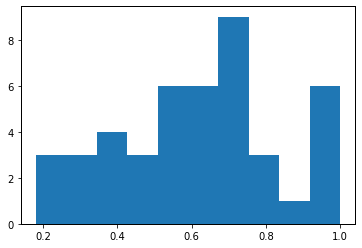

DMKN_23
excluded


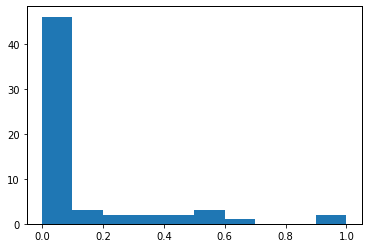

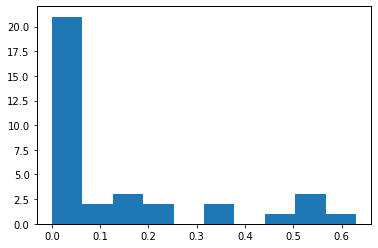

DNAJC19_5
bimodal


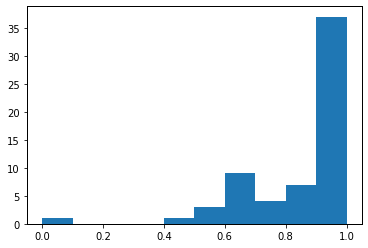

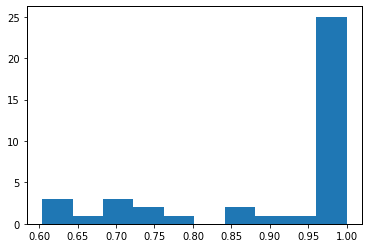

DNMT1_13
excluded


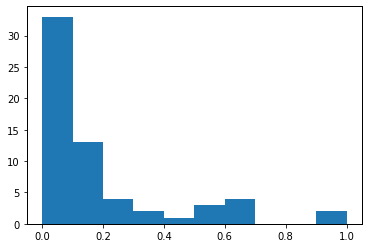

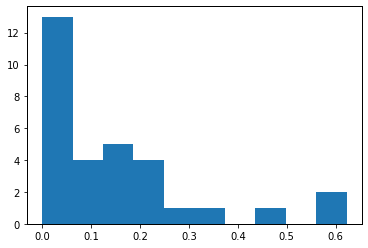

DNMT3B_2
bimodal


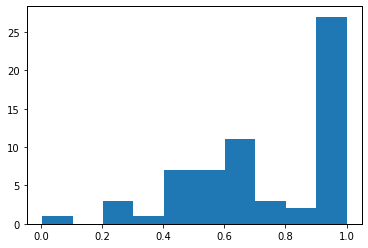

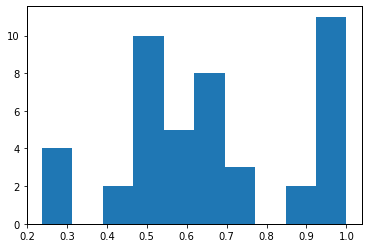

DNMT3B_4
excluded


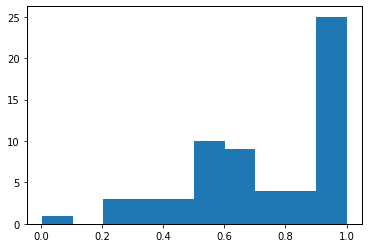

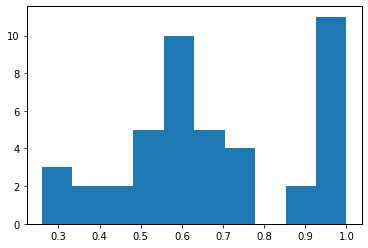

EIF3K_1
included


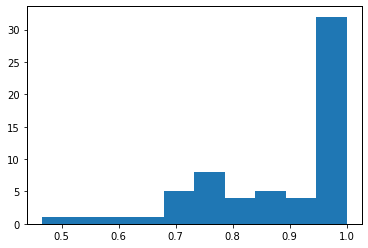

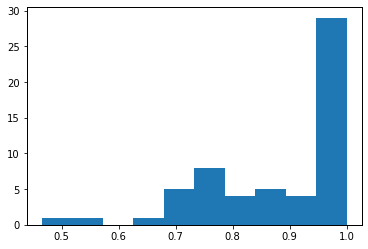

EIF4A2_3
bimodal


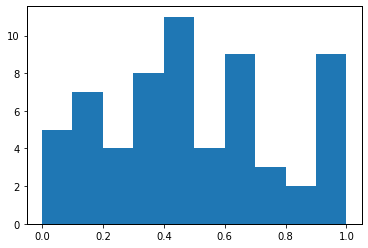

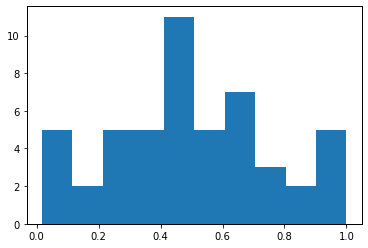

EIF4A2_4
uncategorized


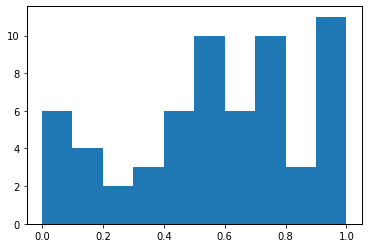

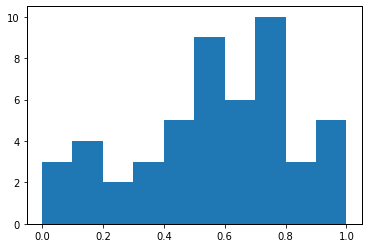

EIF4A2_7
uncategorized


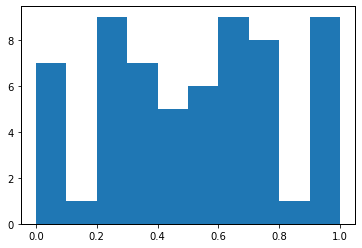

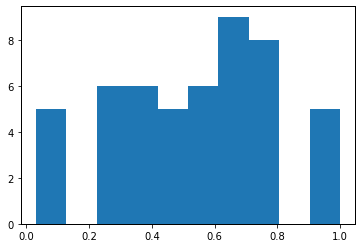

EIF4E2_2
included


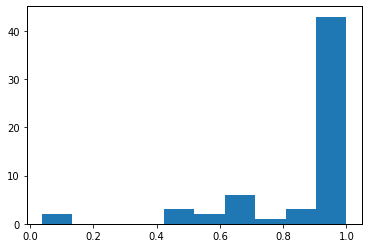

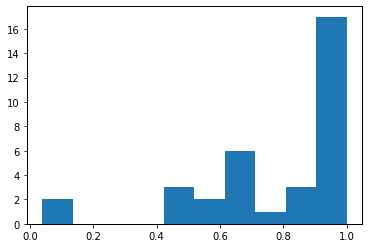

EIF4G2_1
included


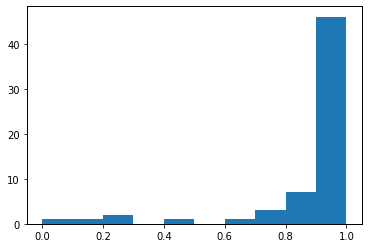

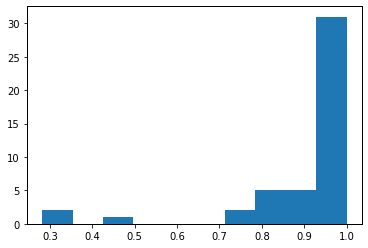

EIF6_1
included


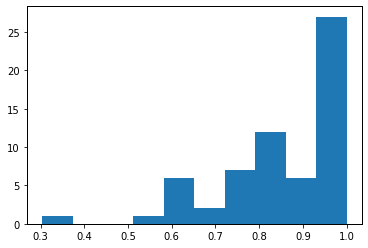

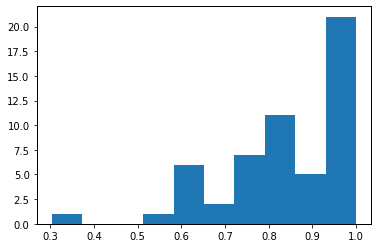

EMC4_3
included


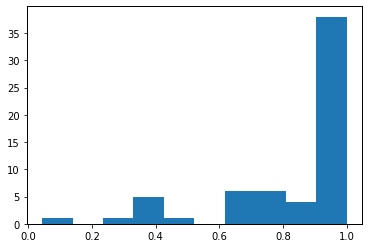

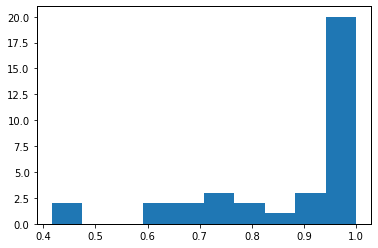

FDPS_3
bimodal


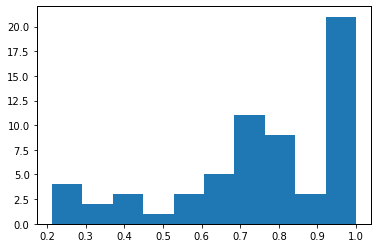

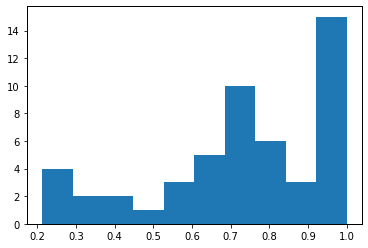

FDPS_4
included


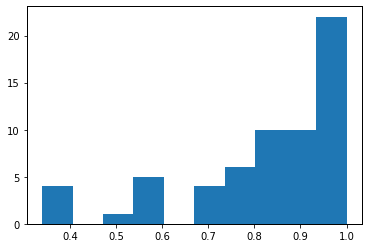

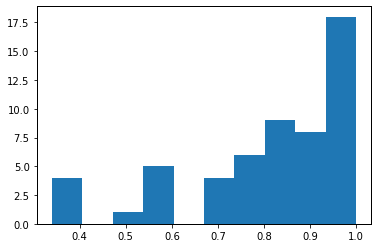

FIBP_1
bimodal


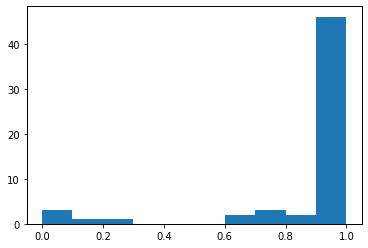

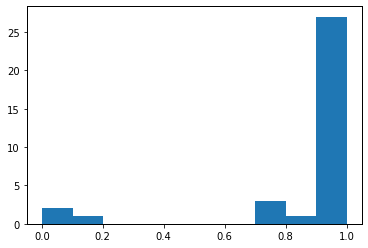

GGCT_3
uncategorized


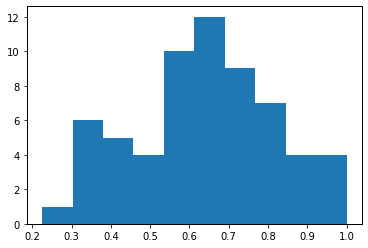

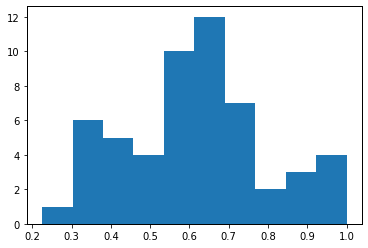

GNAS_6
bimodal


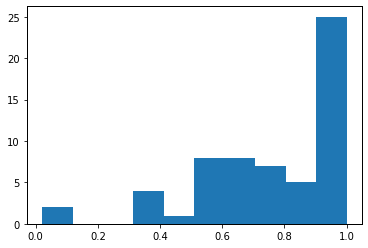

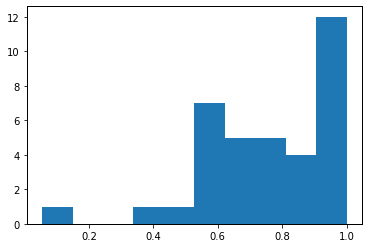

HDDC2_1
uncategorized


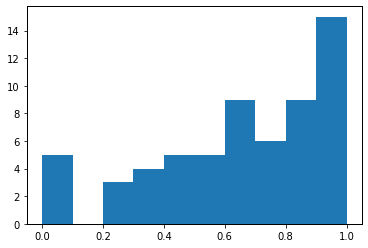

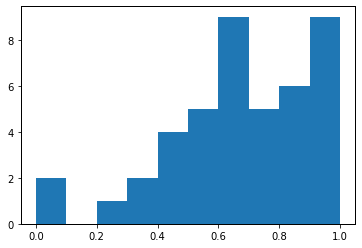

HMGN5_8
included


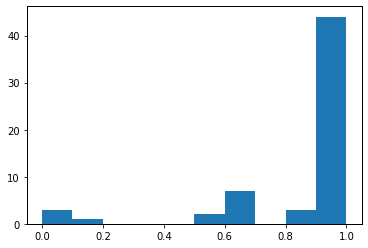

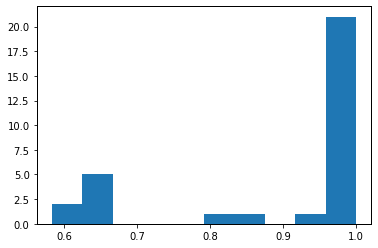

HNRNPA2B1_1
excluded


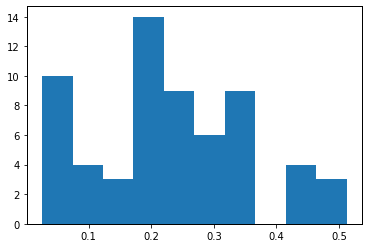

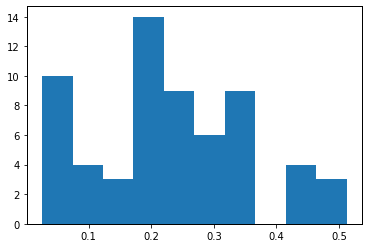

HNRNPC_1
included


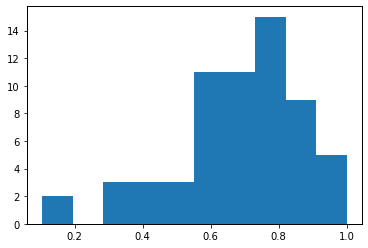

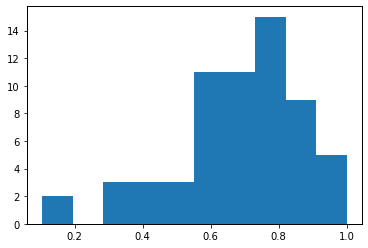

HNRNPD_4
uncategorized


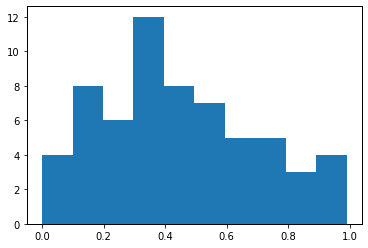

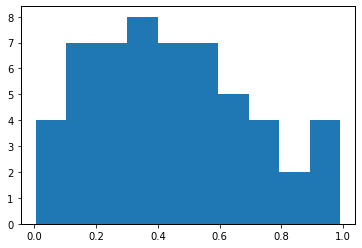

HNRNPR_6
uncategorized


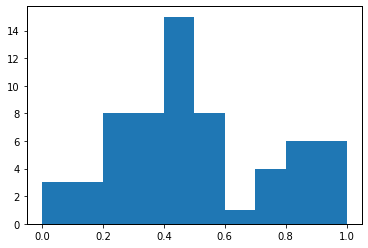

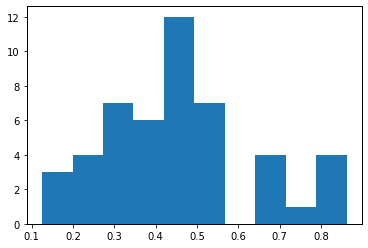

HNRNPR_7
uncategorized


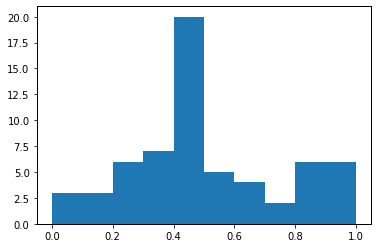

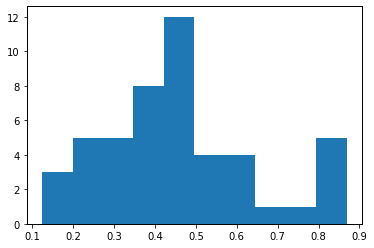

JMJD1C_7
bimodal


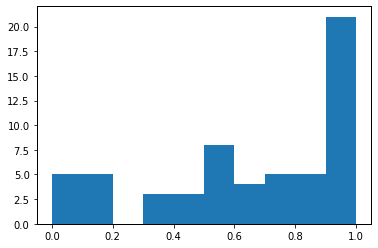

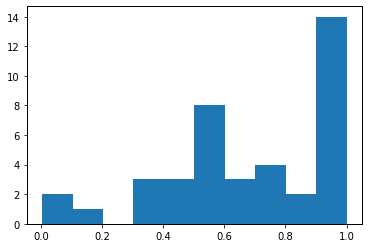

LINC00458_1
bimodal


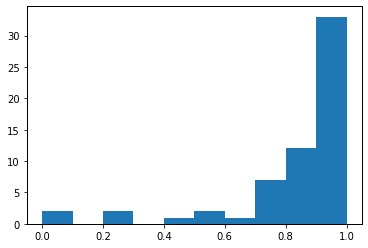

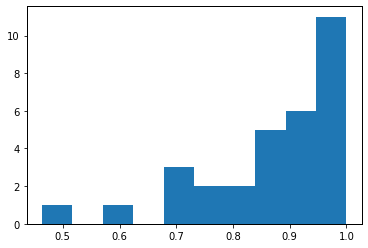

LRRC75A-AS1_12
excluded


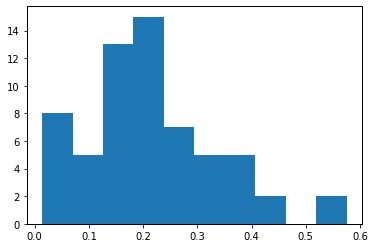

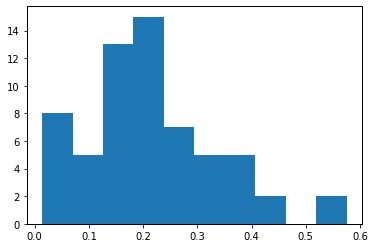

LRRC75A-AS1_2
excluded


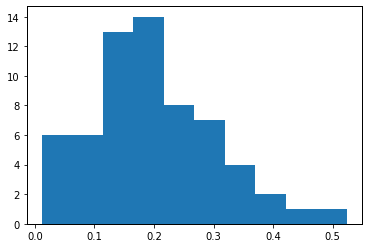

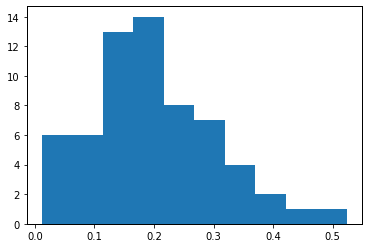

LRRC75A-AS1_3
excluded


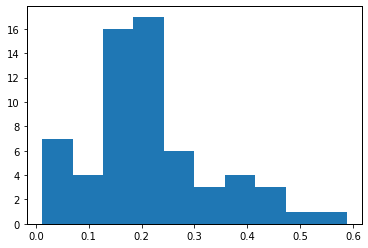

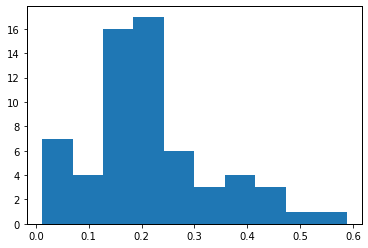

MATR3_1
bimodal


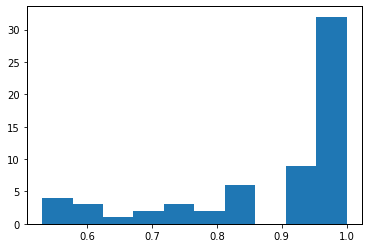

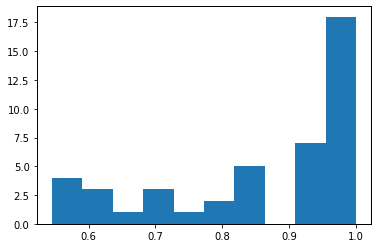

MATR3_10
bimodal


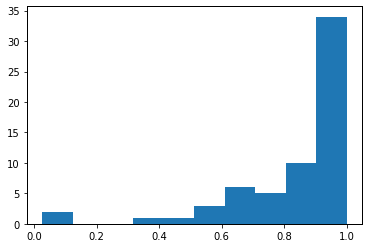

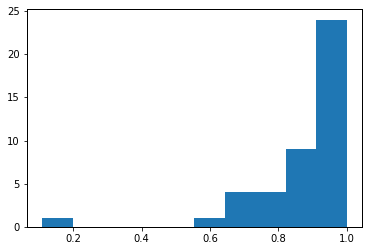

MORF4L2_8
excluded


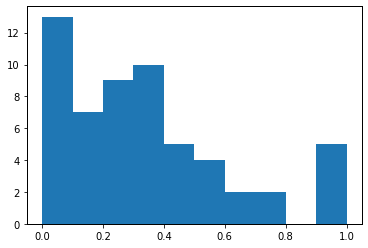

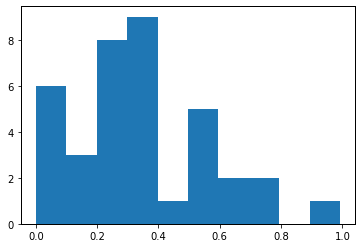

MRPL22_1
included


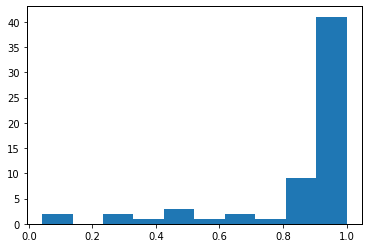

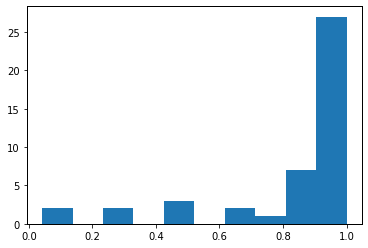

MRPL22_2
bimodal


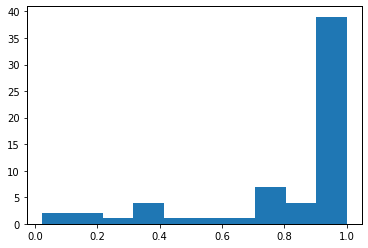

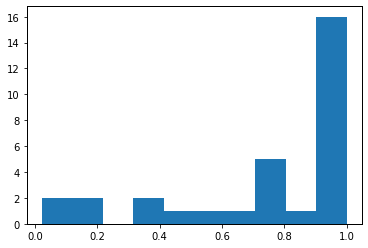

MRPL33_3
uncategorized


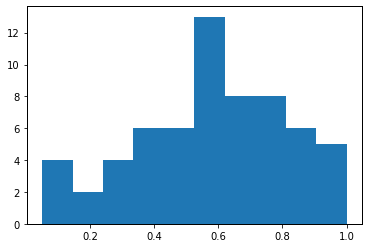

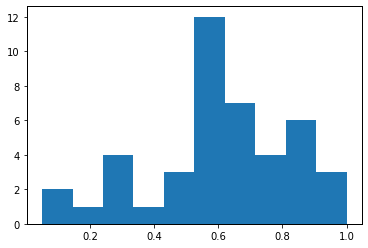

MTHFD2_3
included


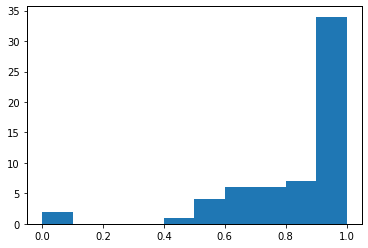

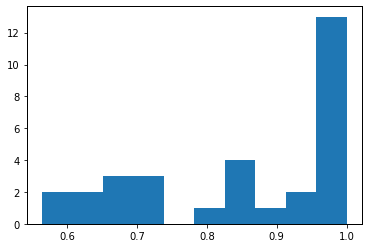

MYL6_3
excluded


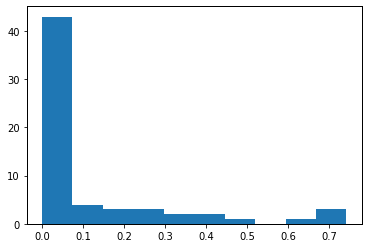

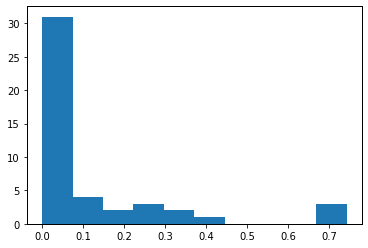

MYL6_4
bimodal


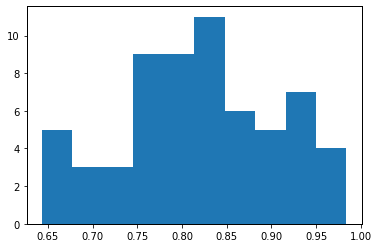

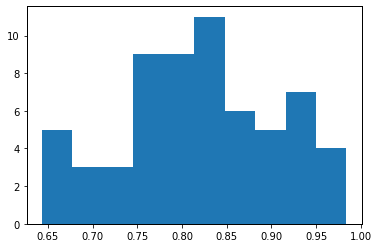

MYL6_7
excluded


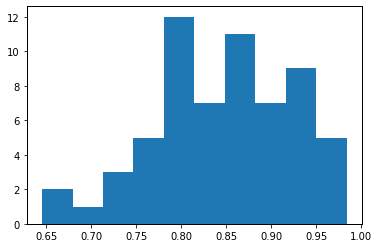

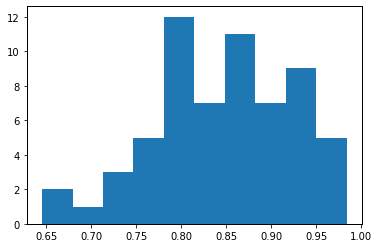

NASP_1
included


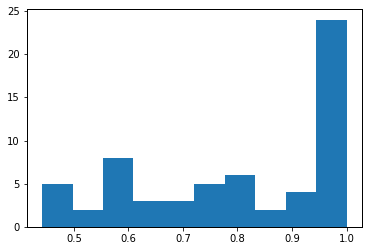

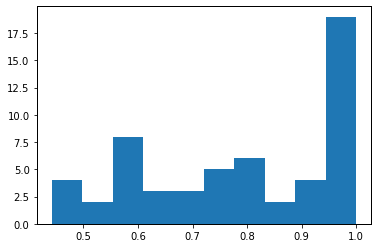

NDUFB3_2
excluded


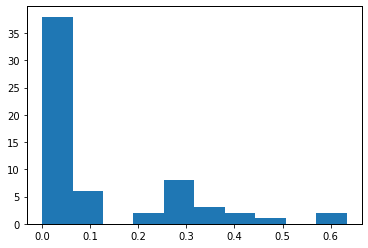

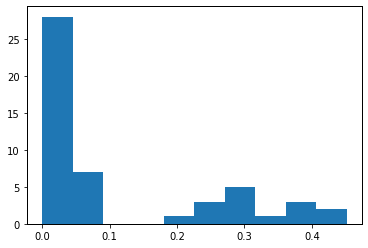

NQO2_11
bimodal


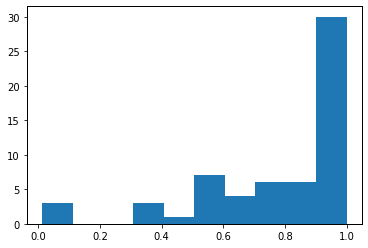

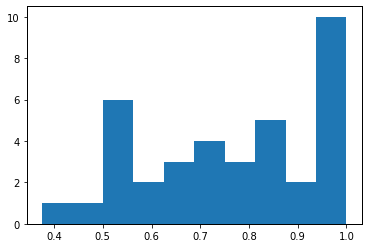

OCIAD2_9
included


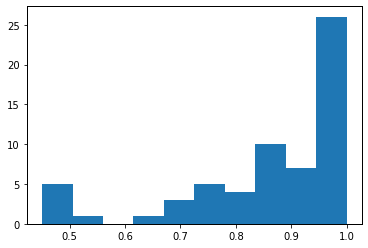

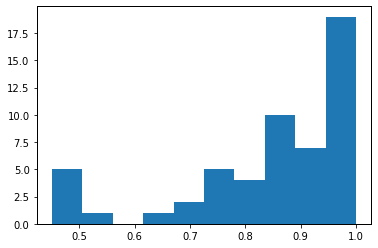

PCBP2_11
bimodal


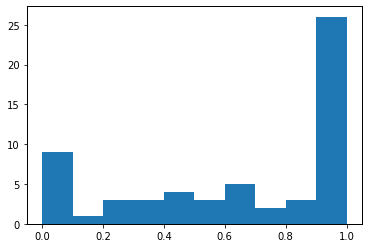

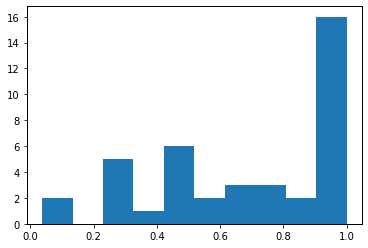

PCBP2_5
bimodal


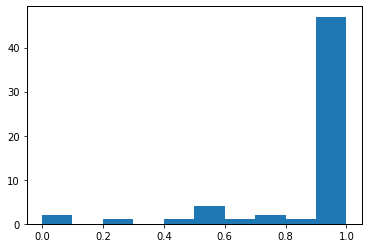

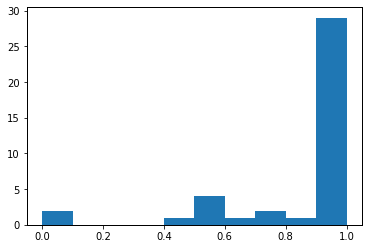

PCBP2_9
uncategorized


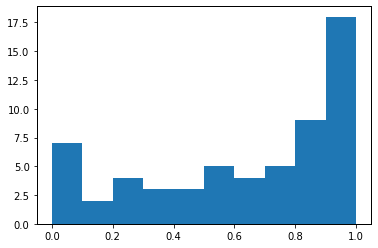

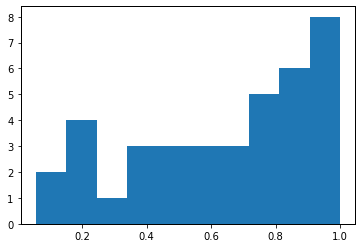

PDCD10_8
excluded


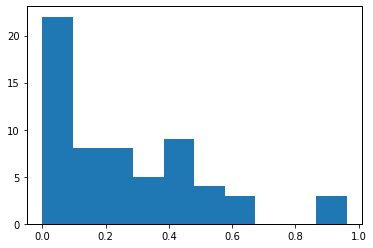

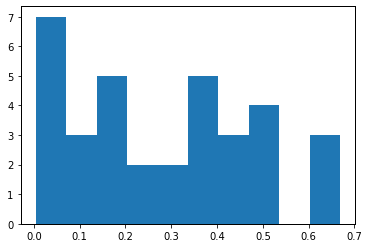

PFDN5_4
excluded


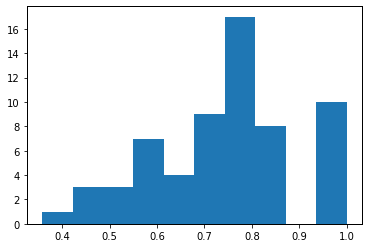

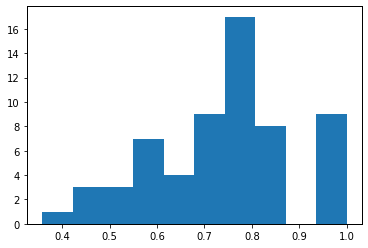

PFDN5_7
excluded


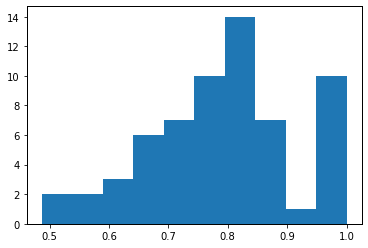

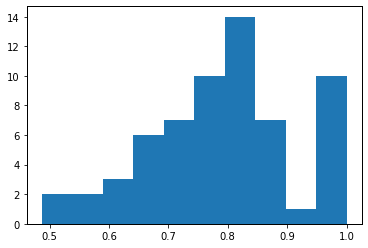

PSAT1_4
included


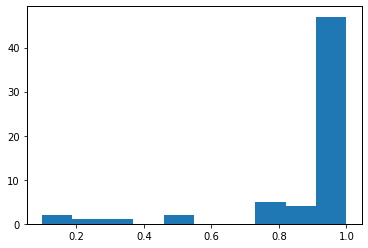

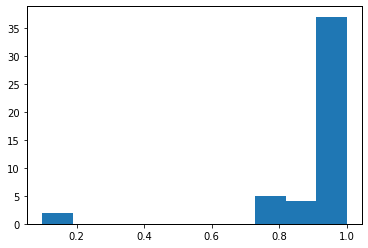

RBM39_nmdSE_2
uncategorized


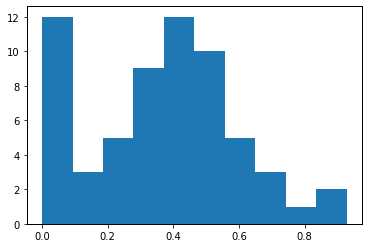

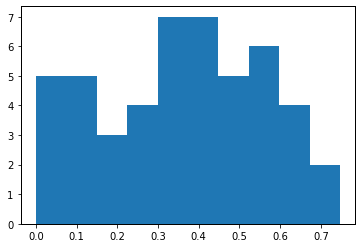

RBM4_2
uncategorized


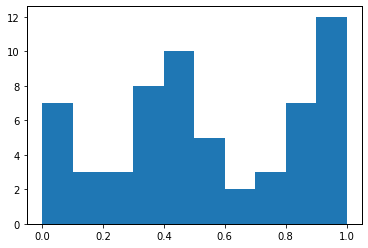

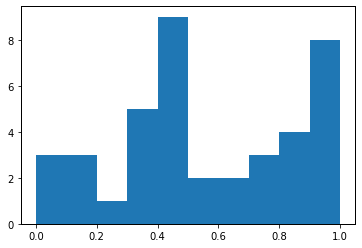

RPL17_2
excluded


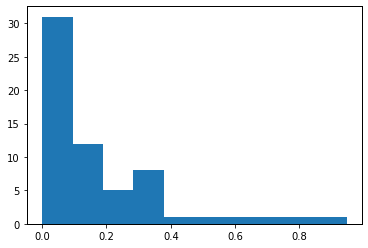

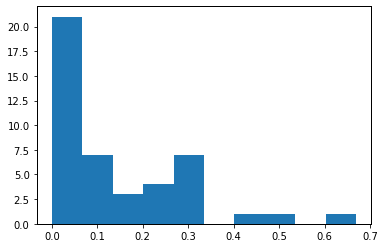

RPS24_1
middle


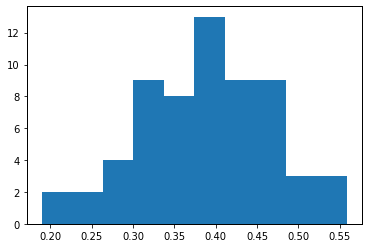

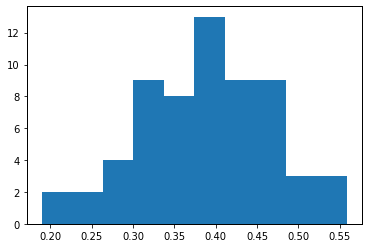

SEPT2_3
excluded


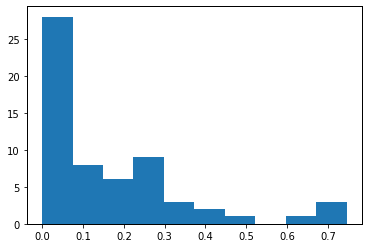

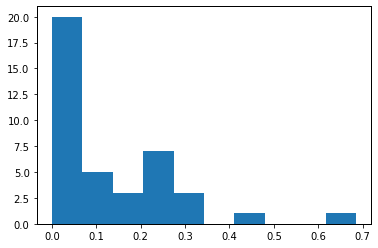

SNHG16_2
uncategorized


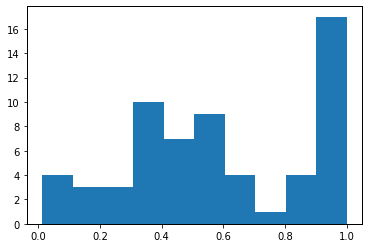

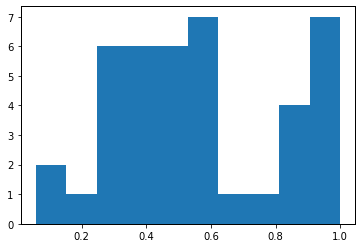

SNHG1_3
bimodal


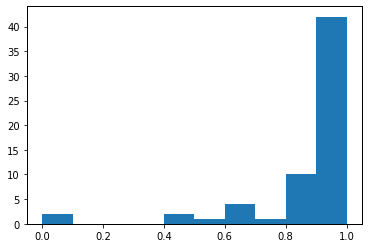

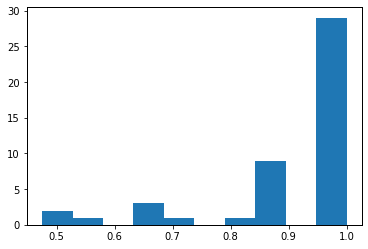

SNHG5_11
included


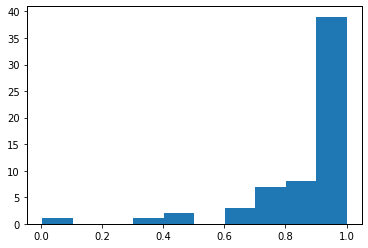

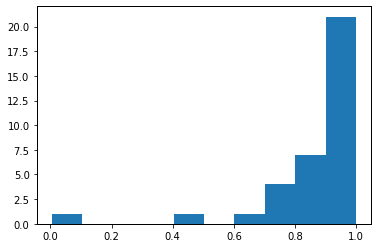

SNHG6_1
included


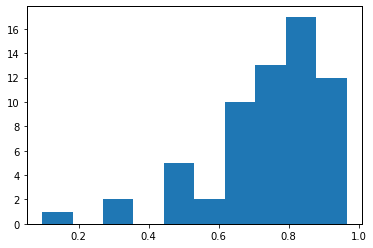

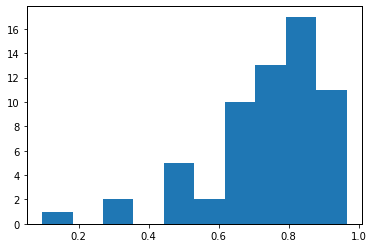

SNRPA1_4
excluded


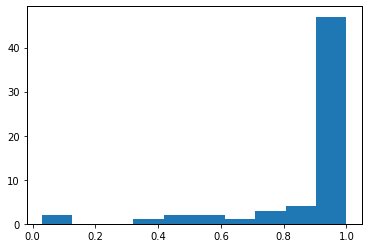

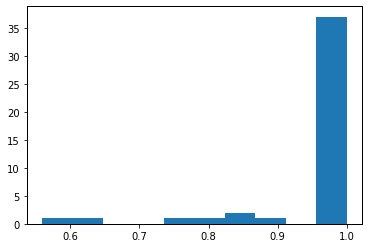

SNRPN_3
excluded


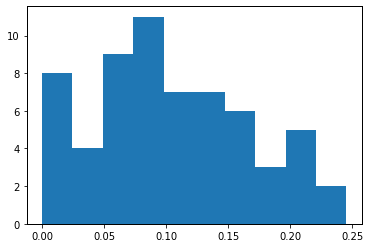

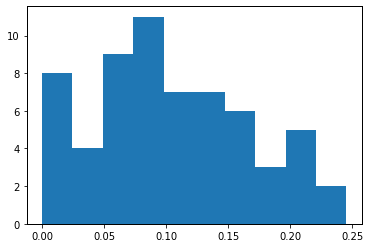

SNU13_1
excluded


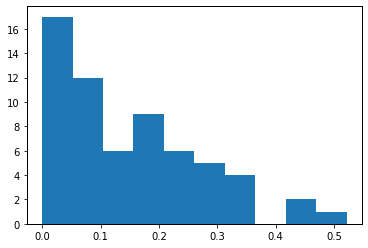

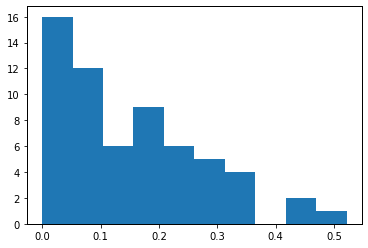

SRP9_3
excluded


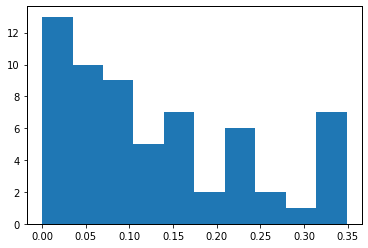

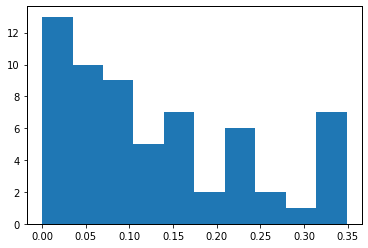

SRSF7_4
included


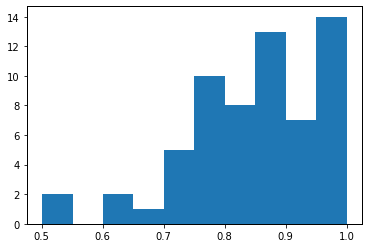

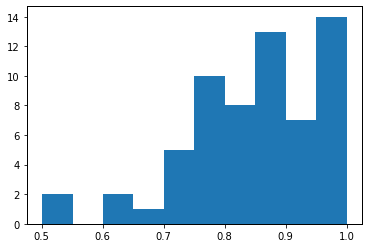

SYNCRIP_4
uncategorized


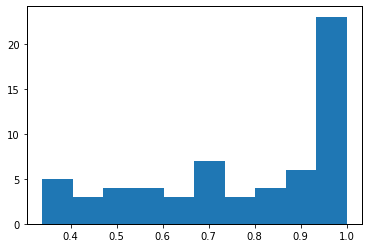

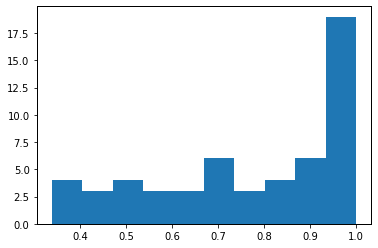

TERF1_1
uncategorized


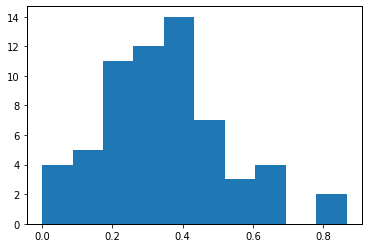

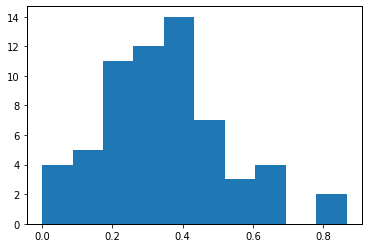

THYN1_1
uncategorized


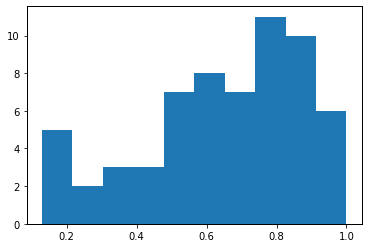

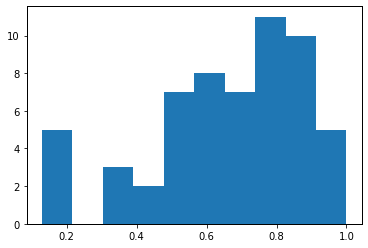

TIMM8B_1
excluded


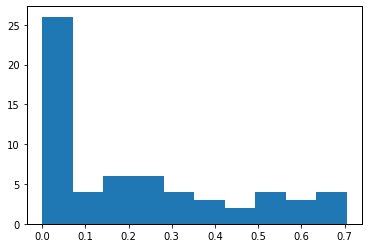

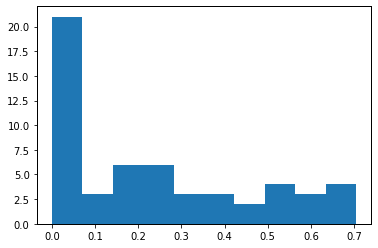

TIMM8B_2
excluded


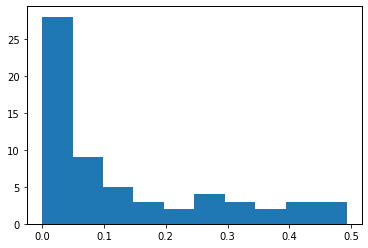

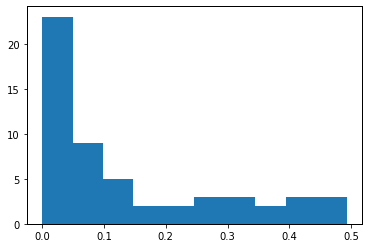

TPM1_1
excluded


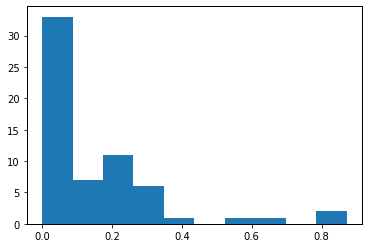

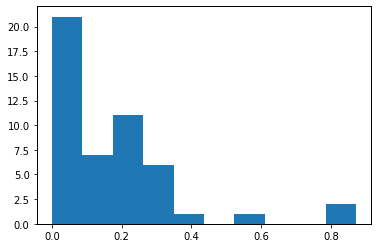

TPM1_5
excluded


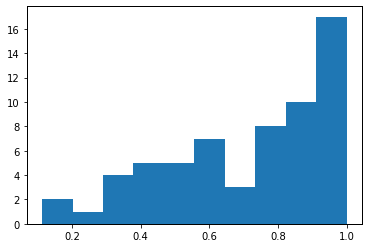

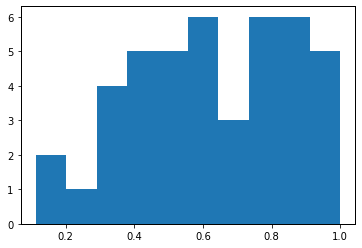

UFC1_1
included


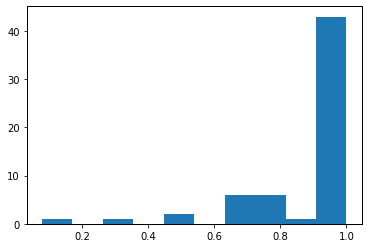

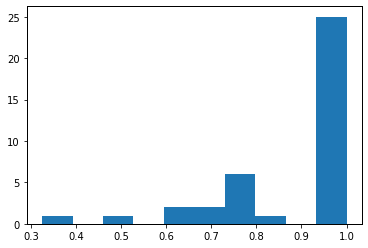

UGP2_1
excluded


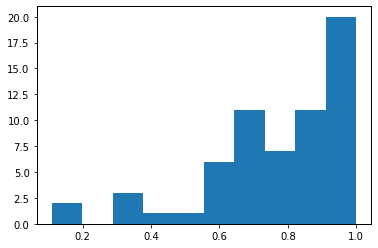

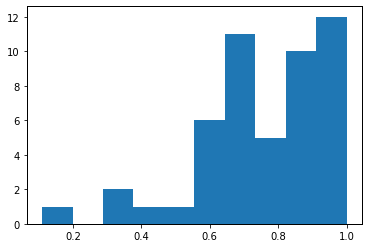

YWHAB_4
excluded


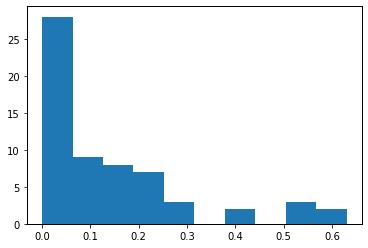

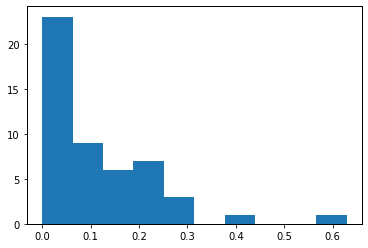

YWHAZ_2
excluded


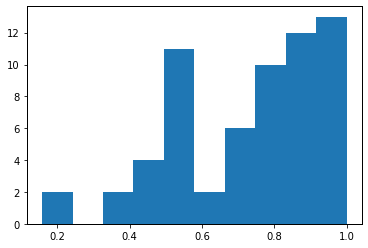

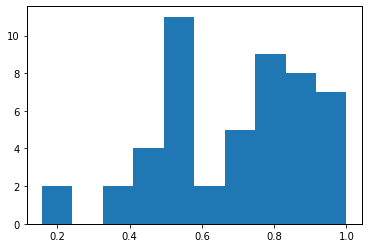

ZBTB8OS_28
uncategorized


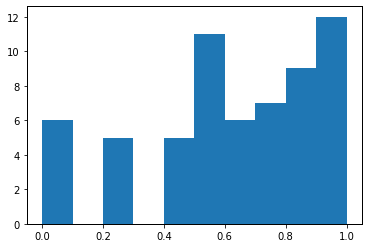

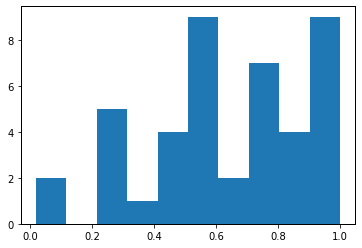

ZFAS1_2
uncategorized


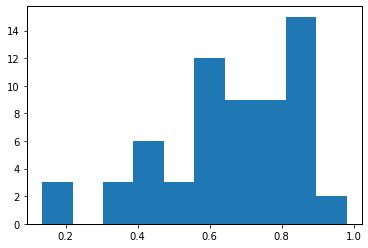

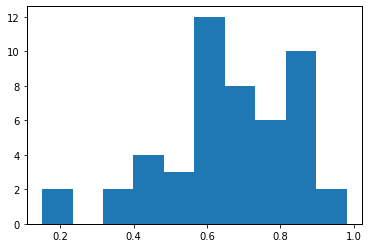

ZFAS1_3
uncategorized


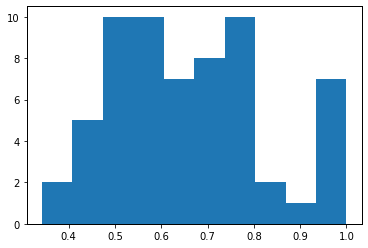

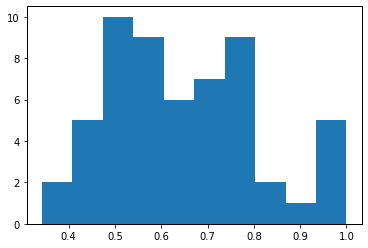

ZNF207_1
uncategorized


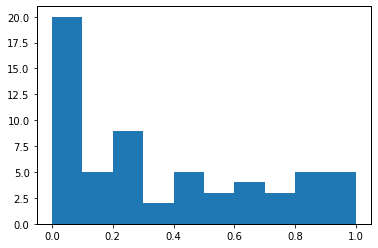

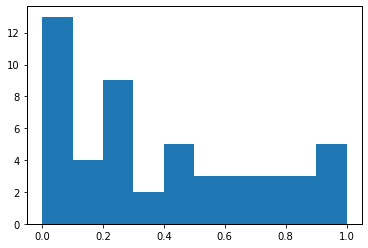

In [35]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    print(evento)
    print(song_modalities.loc[evento, 'iPSC'])
    plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
    plt.show()
    plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
    plt.show()

In [36]:
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        print(evento)
        print(song_modalities.loc[evento, 'iPSC'])
        
        
        quantile_25 = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
            plt.show()
            
        else:
            print(quantile_25)
            print(quantile_75)
            
            
        
        quantile_25_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.75)
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_iPSC].dropna())
            plt.show()

ANAPC11_3
bimodal
0.5491878551340182
0.9805188263890616
DNAJC19_5
bimodal
0.8133779797496612
1.0
DNMT3B_2
bimodal
0.5087281795511222
0.8908575478384124
EIF4A2_3
bimodal
0.35387488328664796
0.6629011882947415
FDPS_3
bimodal
0.61358591116993
0.9466579299702724
FIBP_1
bimodal
0.9671843182034446
1.0
GNAS_6
bimodal
0.605388502173068
0.9959220363313803
JMJD1C_7
bimodal
0.5324346981876913
0.959044633755906
LINC00458_1
bimodal
0.8123773834145414
0.9610840314330196
MATR3_1
bimodal
0.7472061313608414
0.9918809201623816
MATR3_10
bimodal
0.8303176525748222
1.0
MRPL22_2
bimodal
0.5969624375237726
1.0
MYL6_4
bimodal
0.7720286922140681
0.8818604012442557
NQO2_11
bimodal
0.6087808702469619
0.9396984924623116
PCBP2_11
bimodal
0.452467200161993
0.9982983607790809
PCBP2_5
bimodal
0.8364288177641312
1.0
SNHG1_3
bimodal
0.8612409148770173
1.0


In [37]:
len([x for x in song_iPSC_filtered[0].index if x in song_modalities.index])

100

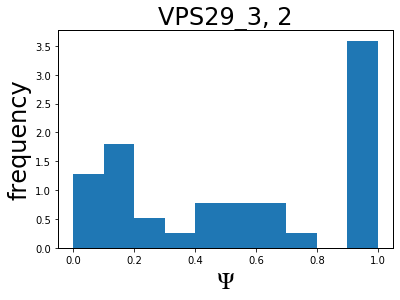

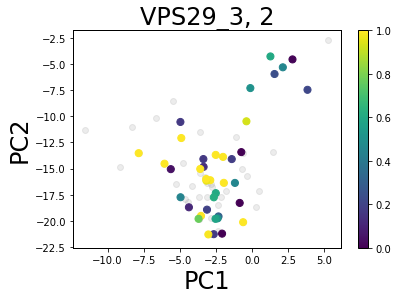

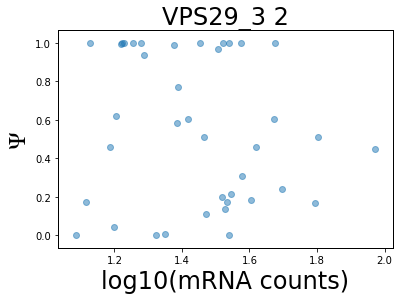

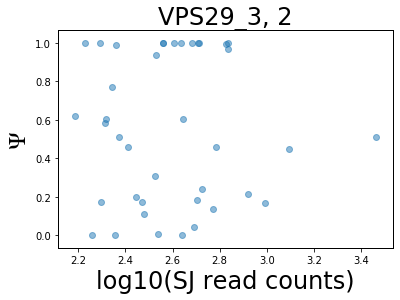

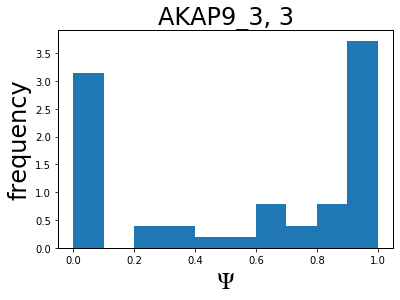

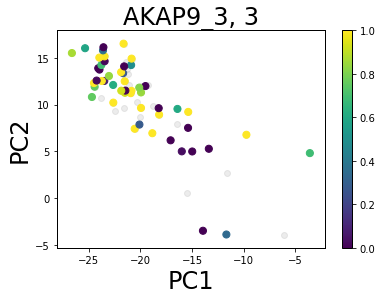

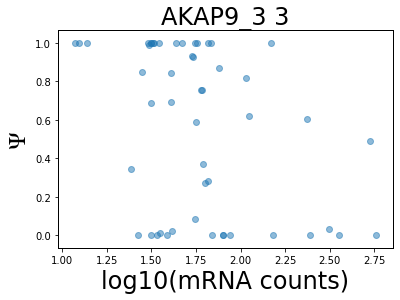

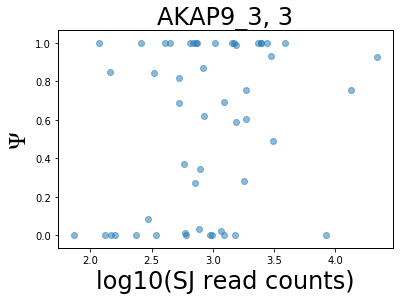

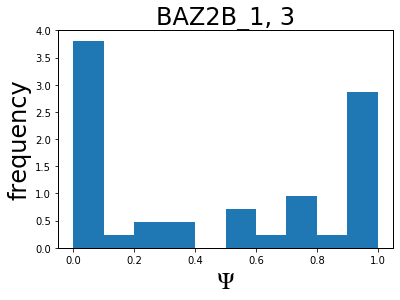

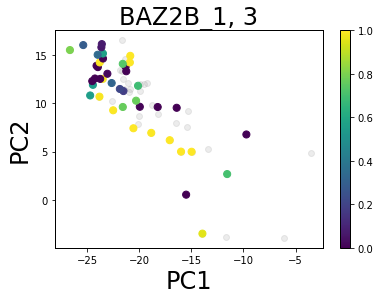

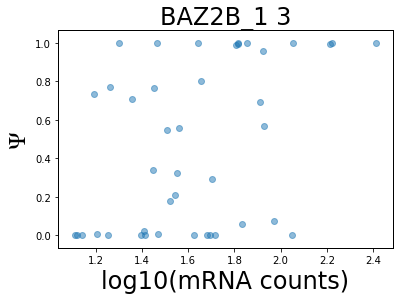

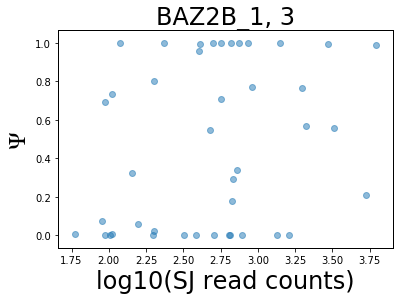

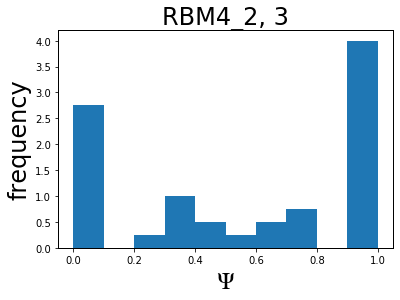

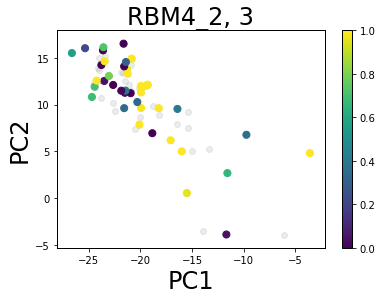

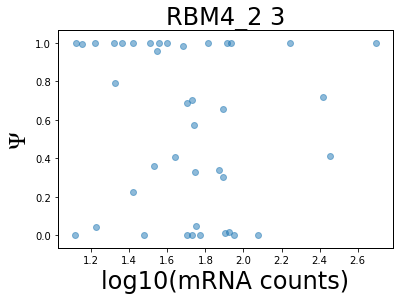

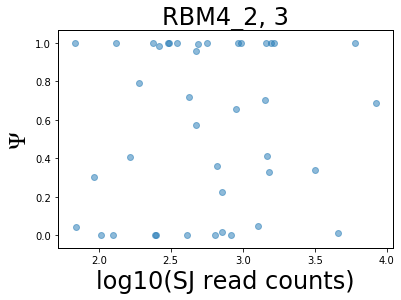

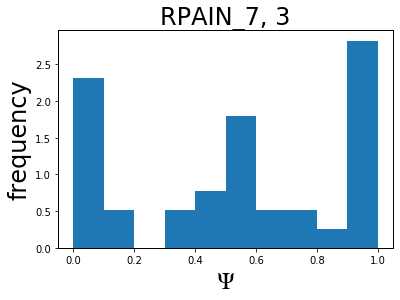

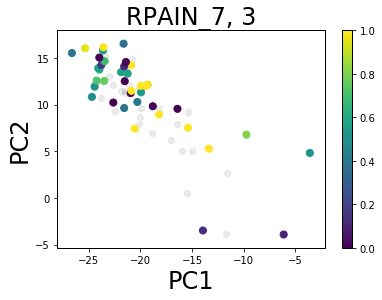

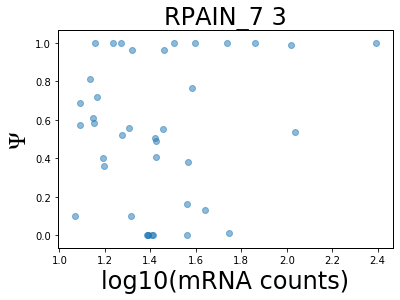

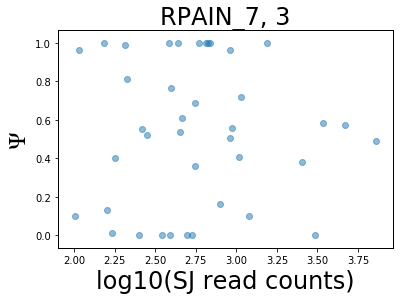

In [38]:
figsize(6, 4)
filtered_bimodal(song_clust_filter, dset_name_list, song_pca, mrna_per_event_song, 
                     song_read_counts, quantile = 0.25, psi_lim = 0.25)

In [39]:
((song_iPSC_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_iPSC_filtered[0].quantile(0.75, axis=1) >= 0.75)).sum()

0

TCF12_1
bimodal


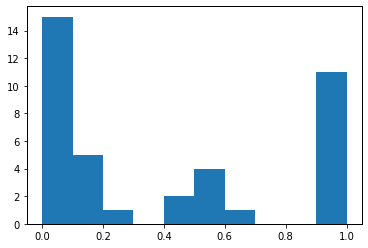

VPS29_3
bimodal


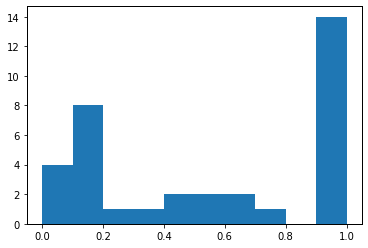

In [40]:
song_NPC_bimodal = song_NPC_filtered[0].loc[((song_NPC_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_NPC_filtered[0].quantile(0.75, axis=1) >= 0.75))].index
for event in song_NPC_bimodal:
    if event in song_modalities.index:
        print(event)
        print(song_modalities.loc[event, 'NPC'])
        plt.hist(song_NPC_filtered[0].loc[event].dropna())
        plt.show()

AKAP9_3
bimodal


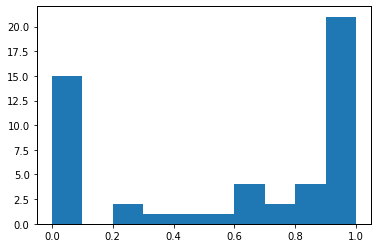

BAZ2B_1
bimodal


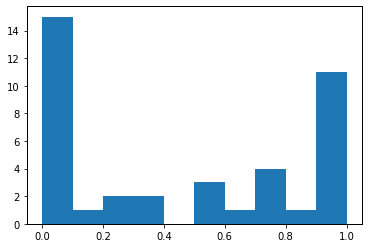

RBM4_2
bimodal


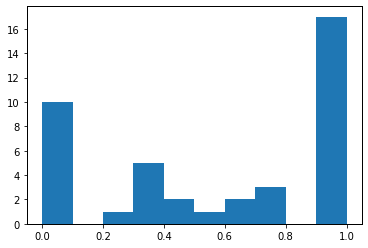

RPAIN_10
excluded


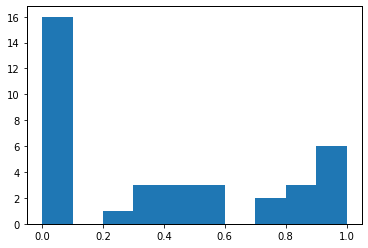

In [41]:
song_MN_bimodal = song_MN_filtered[0].loc[((song_MN_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_MN_filtered[0].quantile(0.75, axis=1) >= 0.75))].index
for event in song_MN_bimodal:
    if event in song_modalities.index:
        print(event)
        print(song_modalities.loc[event, 'MN'])
        plt.hist(song_MN_filtered[0].loc[event].dropna())
        plt.show()

In [42]:
song_modalities.loc['VPS29_3']

song_annotation    exon:chr12:110939854-110939897:-@exon:chr12:11...
iPSC                                                        excluded
NPC                                                          bimodal
MN                                                          excluded
Name: VPS29_3, dtype: object

In [43]:
song_NPC_filtered[0].shape

(49, 70)

In [44]:
((song_MN_filtered[0].quantile(0.25, axis=1) <= 0.25) & (song_MN_filtered[0].quantile(0.75, axis=1) >= 0.75)).sum()

4

TCF12_1
bimodal
0.000907528442630275
0.9712759524289458


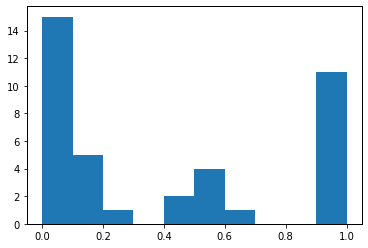

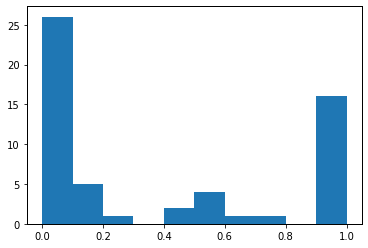

0.000907528442630275
0.9712759524289458
VPS29_3
bimodal
0.17162698412698413
1.0


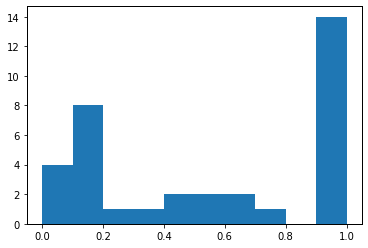

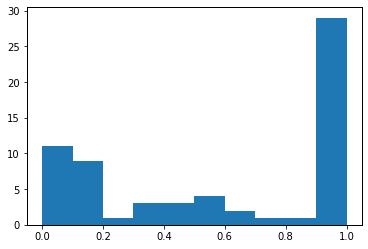

0.17162698412698413
1.0


In [45]:
for evento in [x for x in song_NPC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'NPC'] == 'bimodal':
        
        
        quantile_25 = song_NPC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_NPC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'NPC'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_NPC_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_NPC].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
            
        
        

AKAP9_3
bimodal
0.028111416151910318
1.0


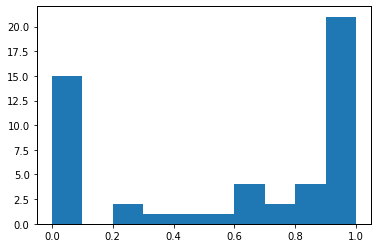

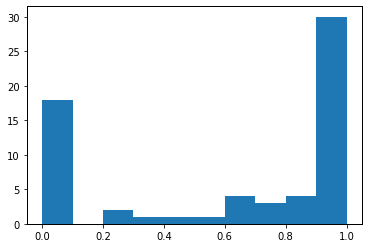

0.028111416151910318
1.0
BAZ2B_1
bimodal
0.003993833327961667
0.9910456369994731


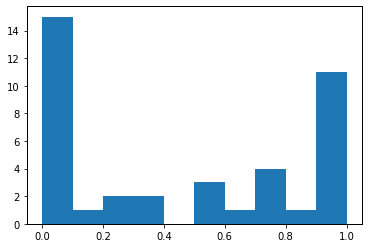

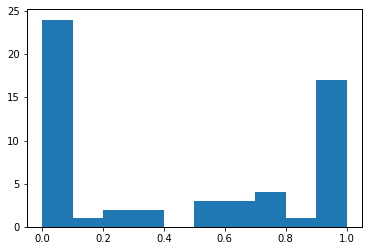

0.003993833327961667
0.9910456369994731
RBM4_2
bimodal
0.22508591065292094
1.0


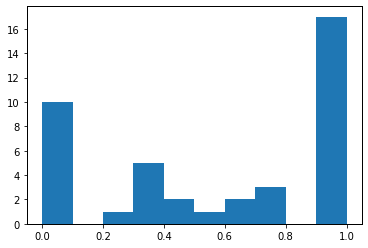

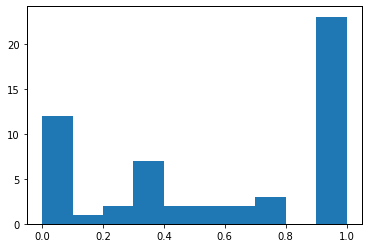

0.22508591065292094
1.0
RPAIN_10
excluded
0.0
0.7584369449378331


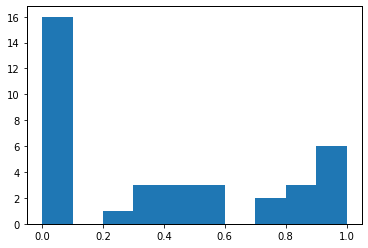

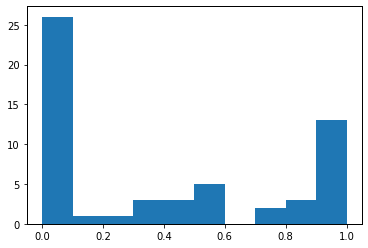

0.0
0.7584369449378331


In [46]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_MN].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
            
    else:
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
            quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
            quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
            #if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_PSI.loc[evento, song_MN].dropna())
            plt.show()
            
#         else:
            print(quantile_25)
            print(quantile_75)
            
        
        

In [47]:
print((song_modalities.iPSC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.iPSC == '-').sum()))
print((song_modalities.iPSC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.iPSC == '-').sum()))

2835
8895
0.31871838111298484


In [48]:
print((song_modalities.NPC == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.NPC == '-').sum()))
print((song_modalities.NPC == 'bimodal').sum() / (len(song_modalities) - (song_modalities.NPC == '-').sum()))

1981
6539
0.3029515216393944


In [49]:
print((song_modalities.MN == 'bimodal').sum())
print((len(song_modalities) - (song_modalities.MN == '-').sum()))
print((song_modalities.MN == 'bimodal').sum() / (len(song_modalities) - (song_modalities.MN == '-').sum()))

1131
4156
0.27213666987487967


In [50]:
song_outrigger = pd.read_csv('song_outrigger_psi.tab', index_col = 0)

In [51]:
outrigger_iPSC = [x for x in list(song_outrigger.index) if x[0] == 'P']
outrigger_NPC = [x for x in list(song_outrigger.index) if ((x[0] == 'C') or (x[0] == 'N'))]
outrigger_MN = [x for x in list(song_outrigger.index) if x[0] == 'M']

In [52]:
print(song_iPSC_filtered[0].shape)
print(song_NPC_filtered[0].shape)
print(song_MN_filtered[0].shape)

(102, 62)
(49, 70)
(47, 70)


AKAP9_3
bimodal
0.028111416151910318
1.0


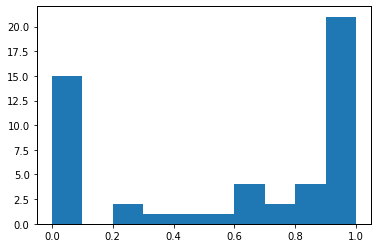

BAZ2B_1
bimodal
0.003993833327961667
0.9910456369994731


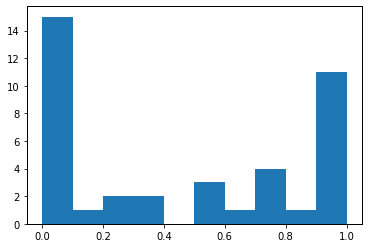

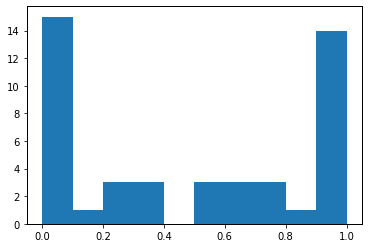

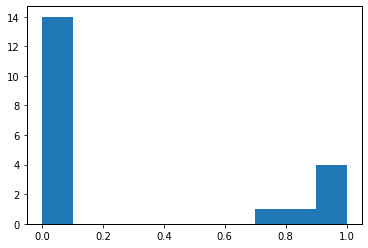

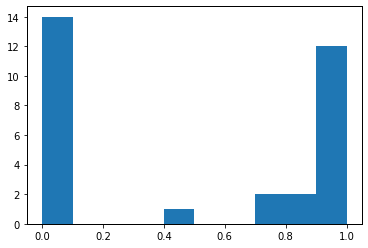

RBM4_2
bimodal
0.22508591065292094
1.0


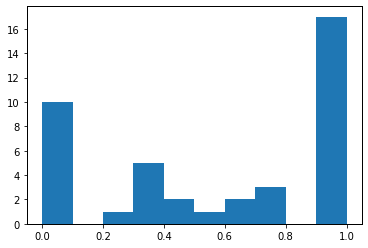

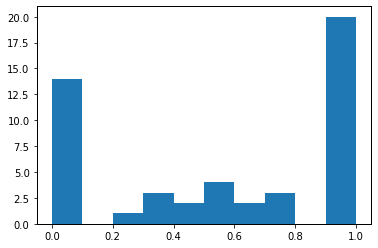

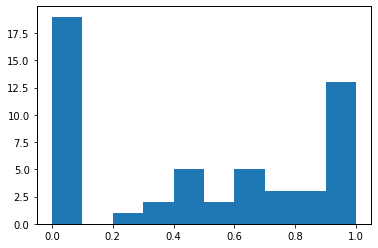

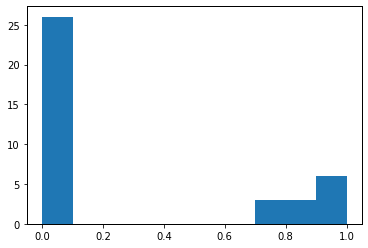

In [53]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        
        
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            print(evento)
            print(song_modalities.loc[evento, 'MN'])
        
            print(quantile_25)
            print(quantile_75)
            plt.hist(song_MN_filtered[0].loc[evento].dropna())
            plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        quantile_25_unfiltered = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.25)
        quantile_75_unfiltered = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
            plt.show()
        
        

AKAP9_3
bimodal


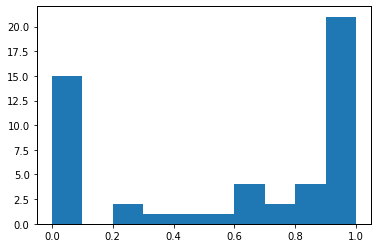

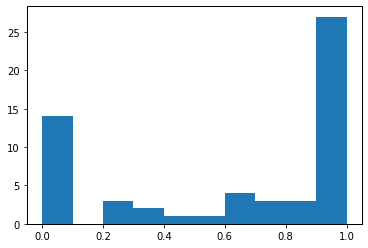

BAZ2B_1
bimodal


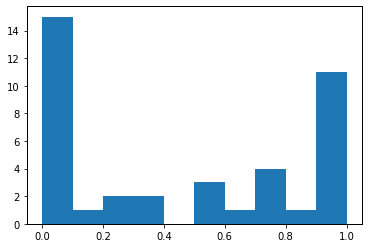

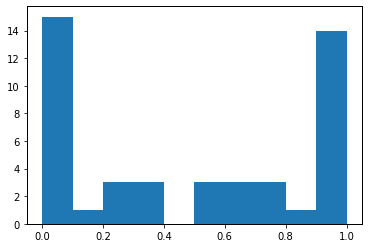

BAZ2B_4
bimodal


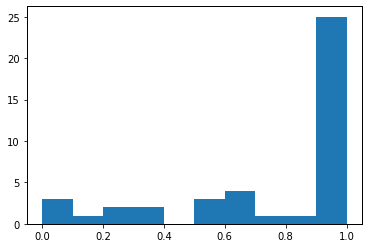

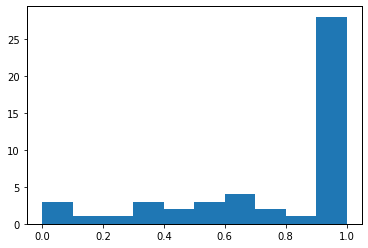

DCX_1
bimodal


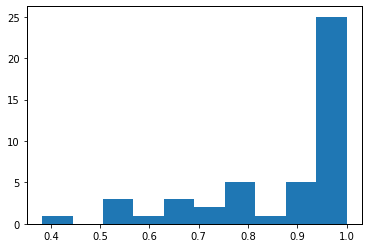

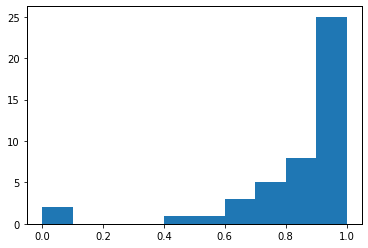

DGUOK_2
bimodal


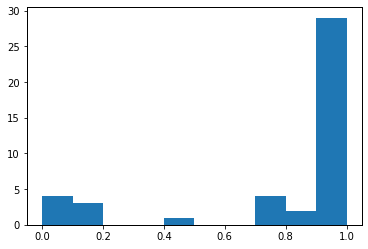

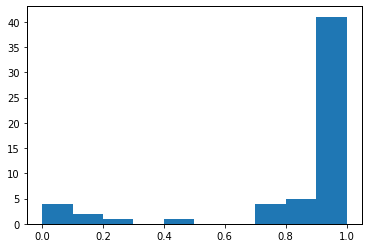

DGUOK_7
bimodal


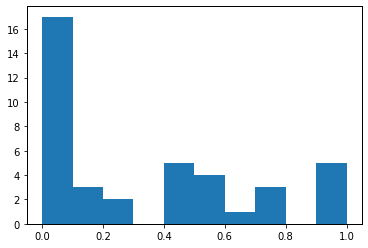

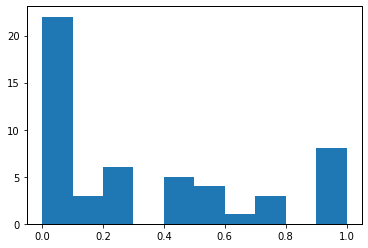

EIF3I_4
bimodal


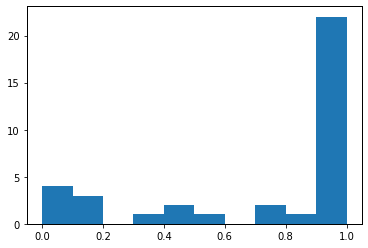

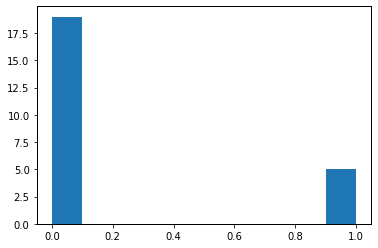

EIF3K_1
bimodal


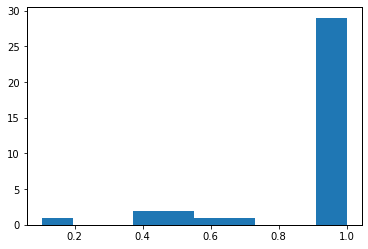

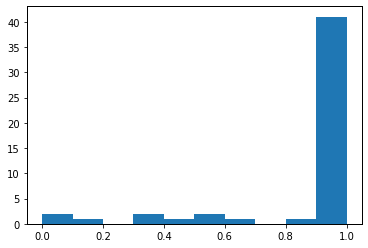

EIF4A2_4
bimodal


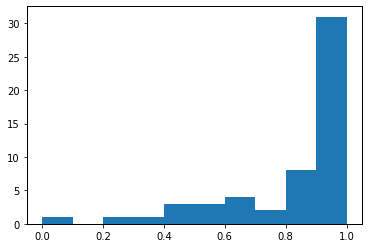

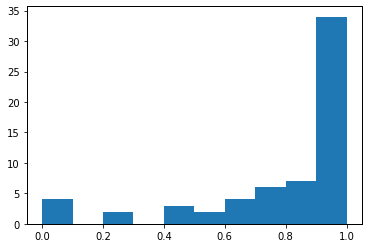

ELAVL4_2
bimodal


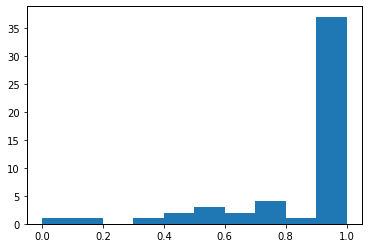

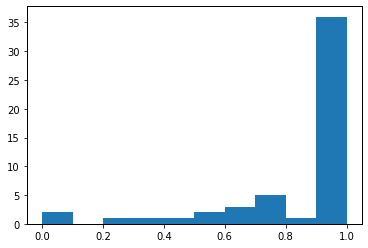

GAS5_19
bimodal


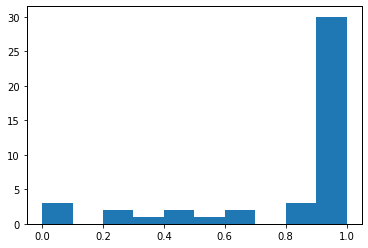

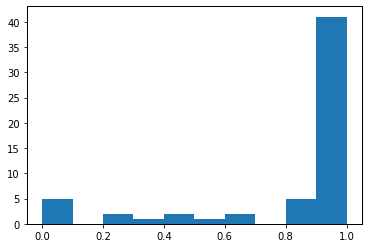

HNRNPC_1
bimodal


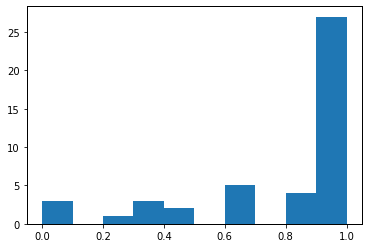

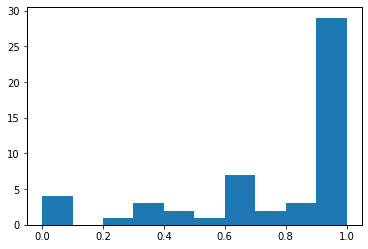

HNRNPDL_7
bimodal


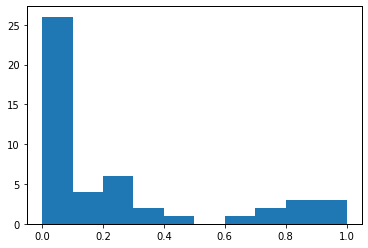

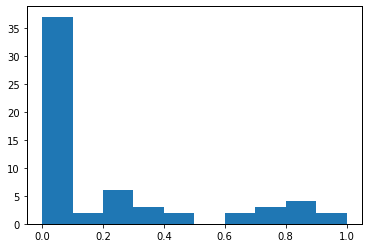

HNRNPR_4
bimodal


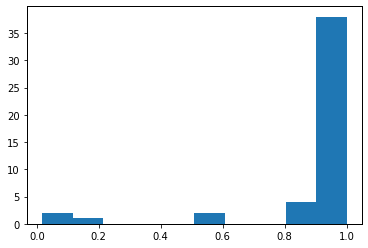

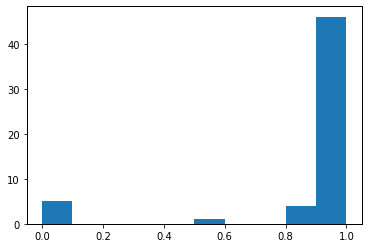

HNRNPR_6
bimodal


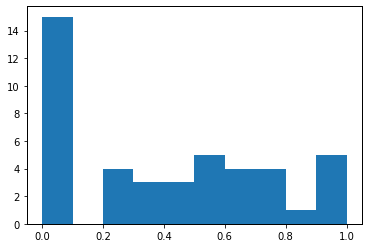

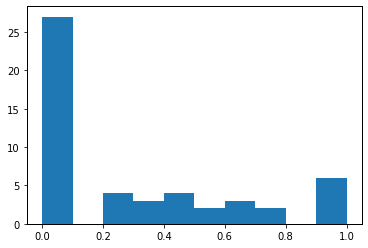

HNRNPR_7
bimodal


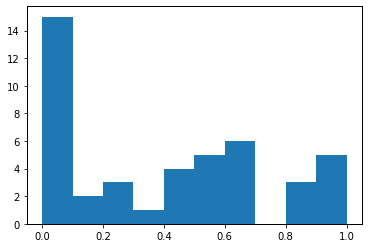

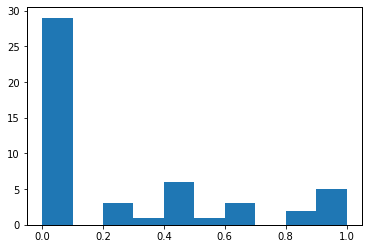

MORF4L2_1
bimodal


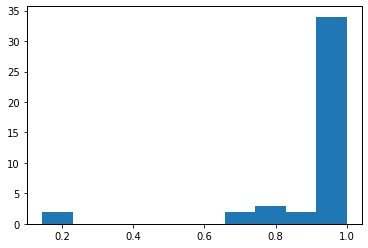

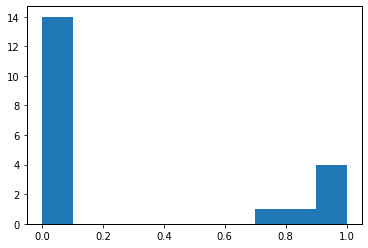

MORF4L2_3
bimodal


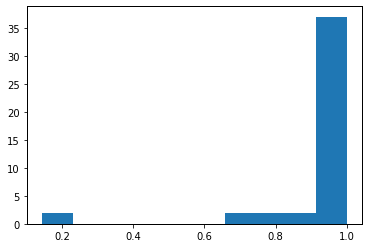

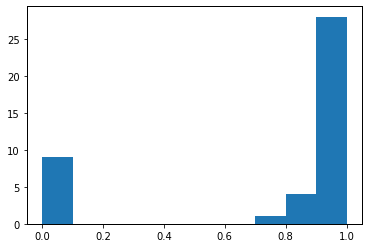

MRPL33_3
bimodal


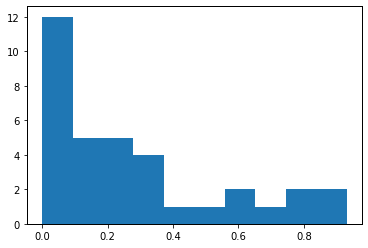

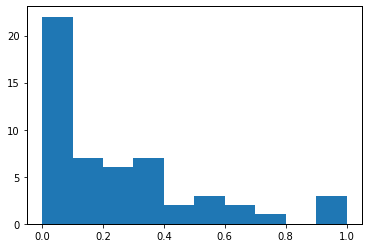

OCIAD2_9
bimodal


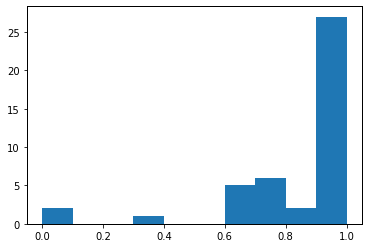

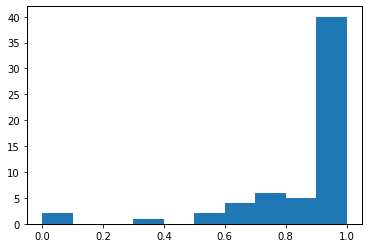

PNISR_2
bimodal


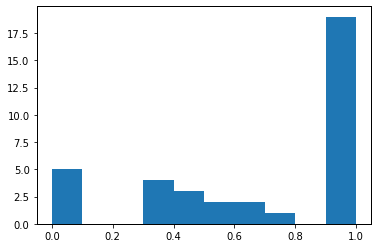

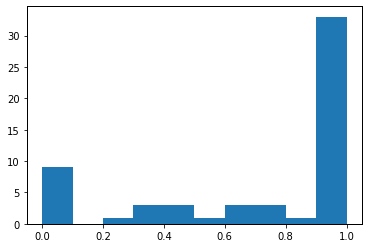

PRDX5_2
bimodal


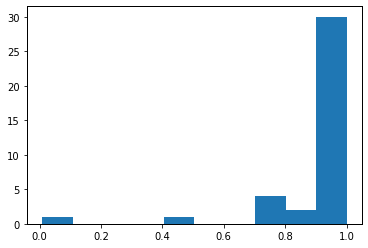

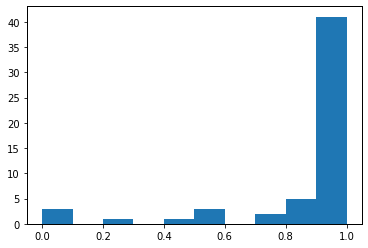

PRDX5_4
bimodal


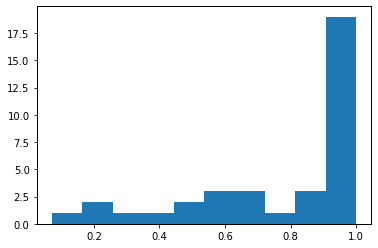

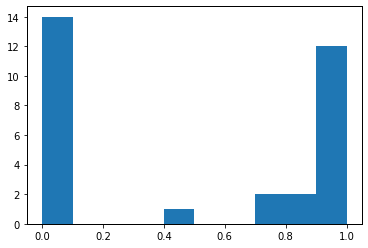

RBFOX2_1
bimodal


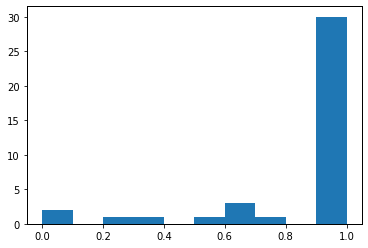

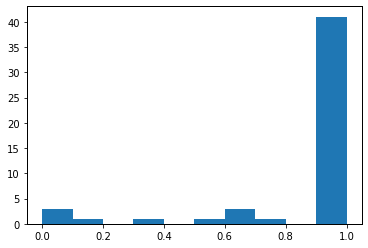

RBM39_nmdSE_2
bimodal


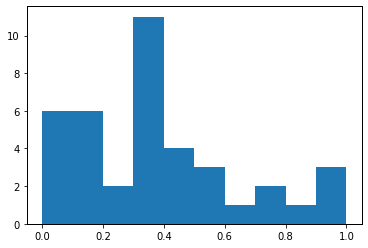

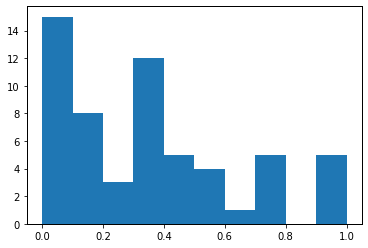

RBM4_2
bimodal


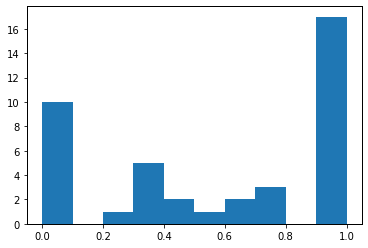

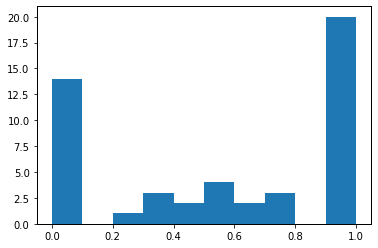

RPAIN_2
bimodal


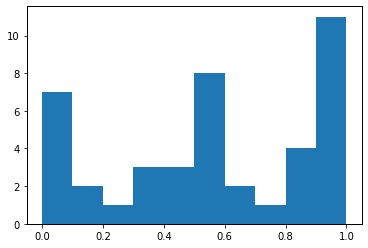

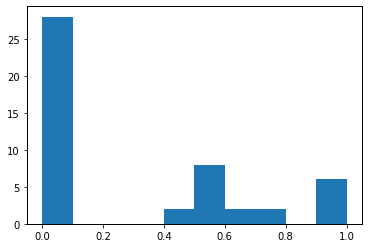

RPAIN_6
bimodal


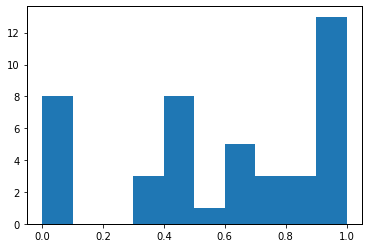

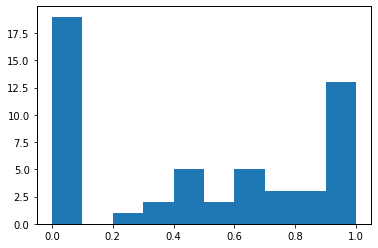

RPAIN_7
bimodal


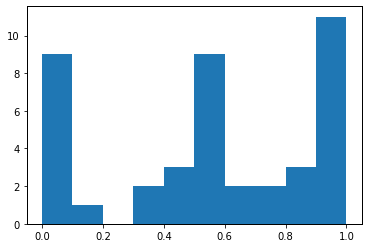

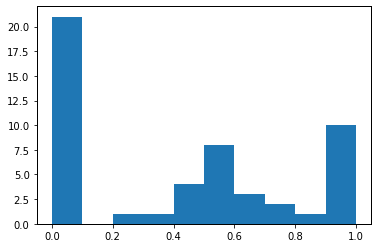

TTC3_1
bimodal


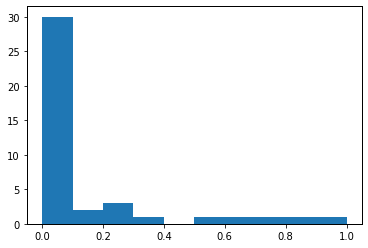

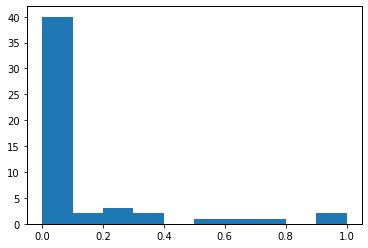

YWHAZ_2
bimodal


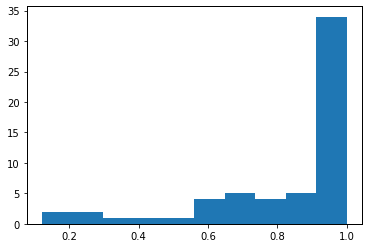

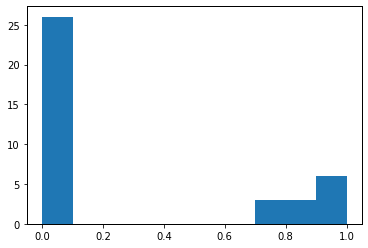

In [54]:
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        

        print(evento)
        print(song_modalities.loc[evento, 'MN'])

        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
        plt.show()
        

ANAPC11_3
bimodal


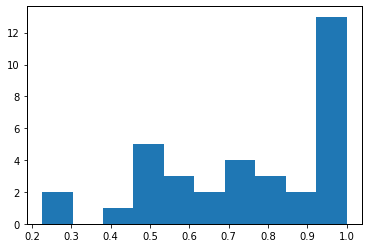

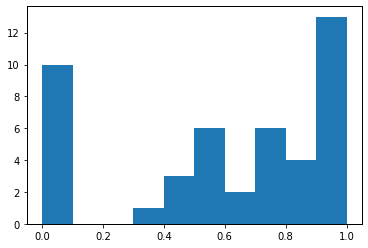

DNAJC19_5
bimodal


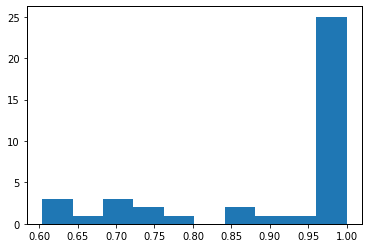

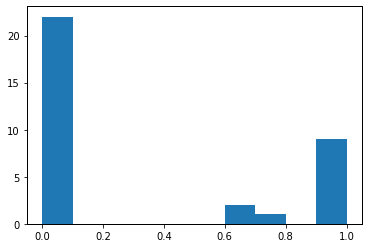

DNMT3B_2
bimodal


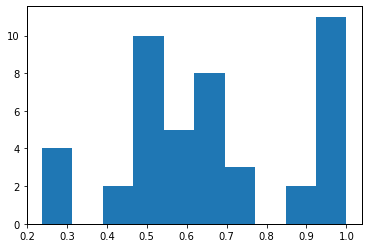

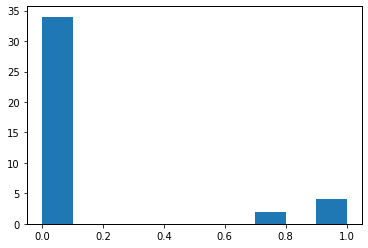

EIF4A2_3
bimodal


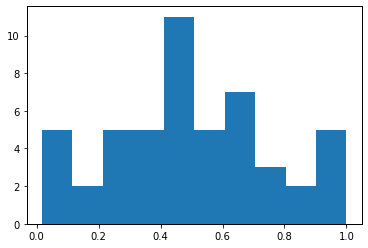

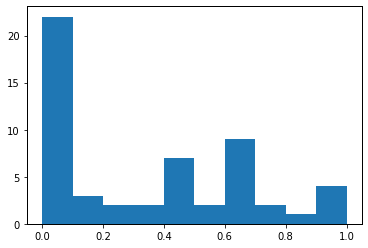

FDPS_3
bimodal


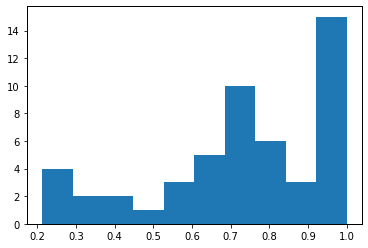

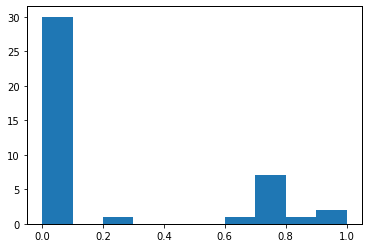

FIBP_1
bimodal


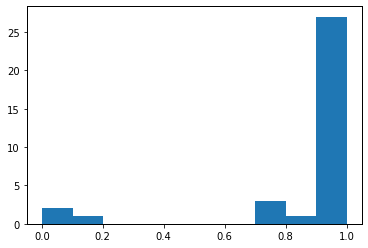

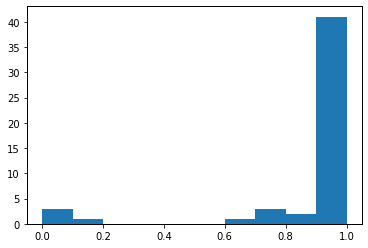

GNAS_6
bimodal


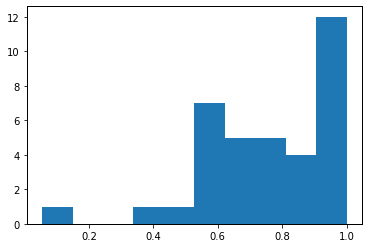

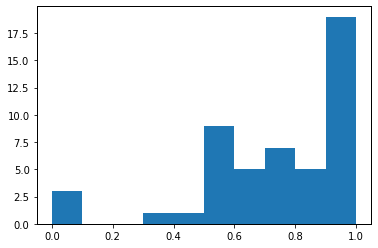

JMJD1C_7
bimodal


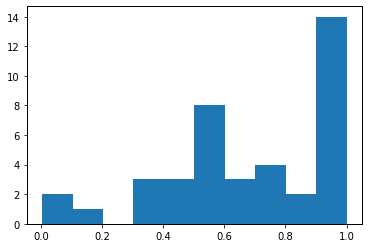

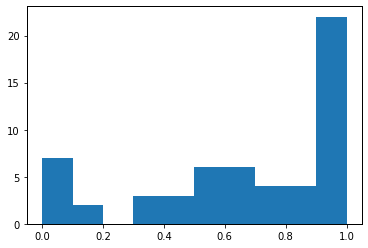

LINC00458_1
bimodal


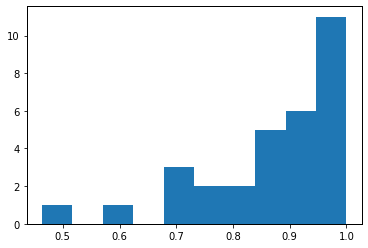

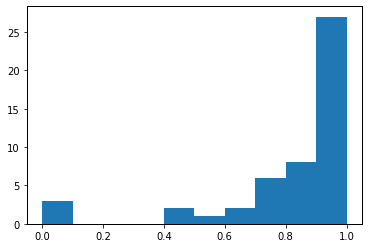

MATR3_1
bimodal


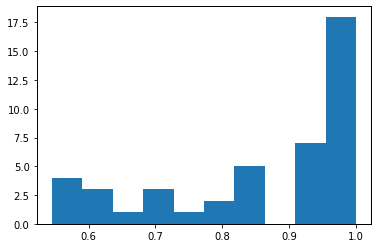

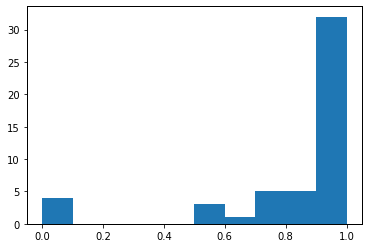

MATR3_10
bimodal


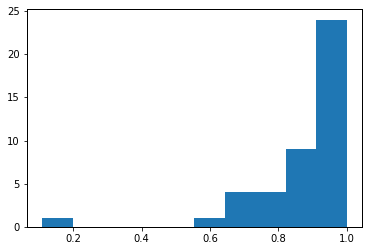

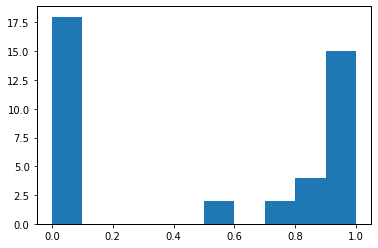

MRPL22_2
bimodal


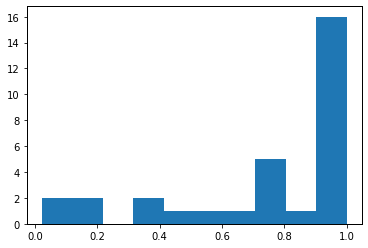

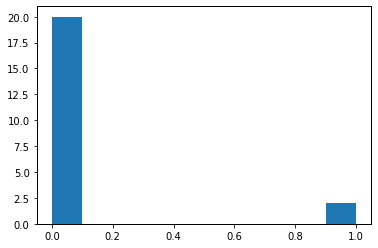

MYL6_4
bimodal


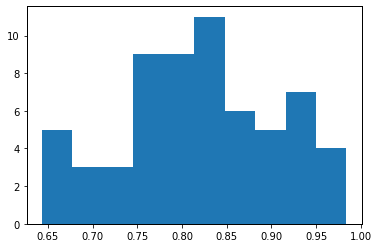

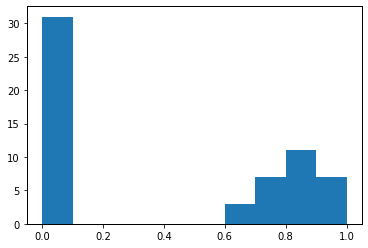

NQO2_11
bimodal


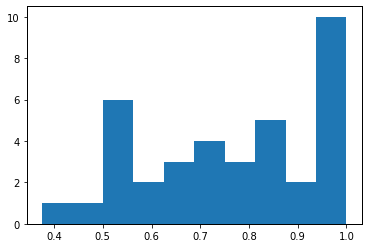

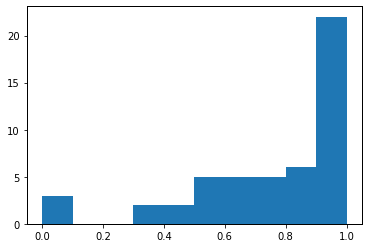

PCBP2_11
bimodal


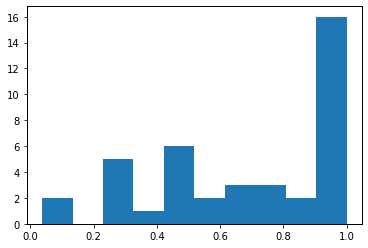

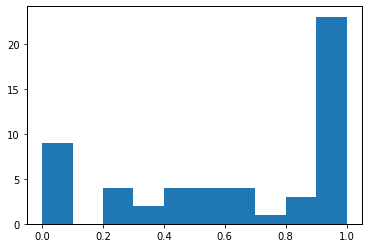

PCBP2_5
bimodal


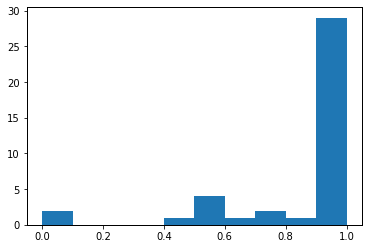

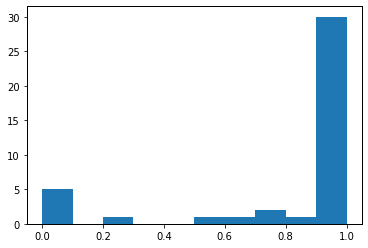

SNHG1_3
bimodal


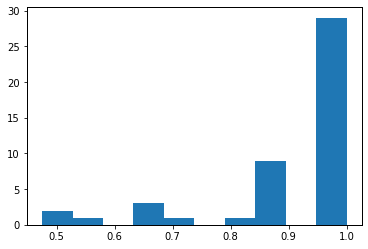

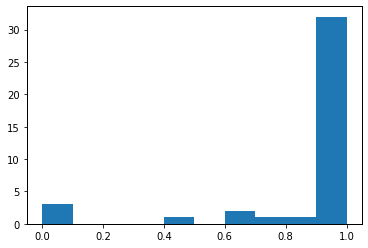

In [55]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
for evento in [x for x in song_iPSC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'iPSC'] == 'bimodal':
        suma_iPSC += 1

        print(evento)
        print(song_modalities.loc[evento, 'iPSC'])

        plt.hist(song_iPSC_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_iPSC, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_iPSC_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_iPSC].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_iPSC_unfiltered += 1
        

ANAPC11_3
bimodal


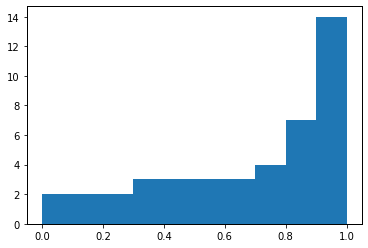

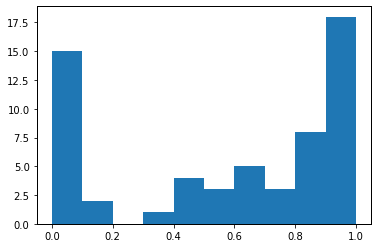

ANAPC11_6
bimodal


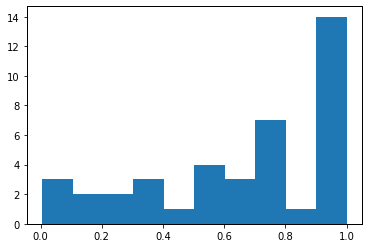

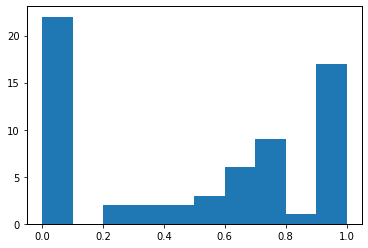

DGUOK_11
bimodal


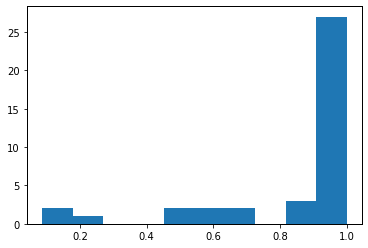

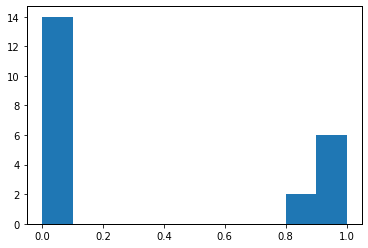

DGUOK_2
bimodal


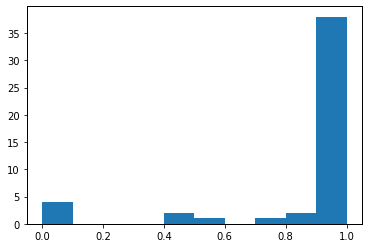

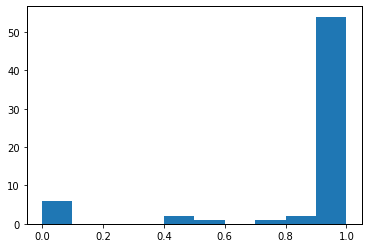

DGUOK_3
bimodal


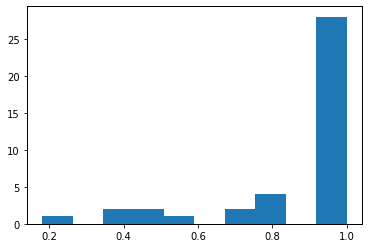

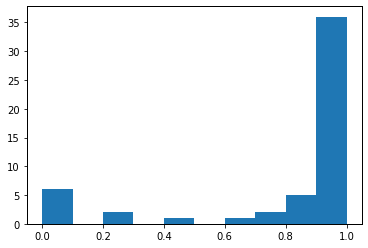

DGUOK_7
bimodal


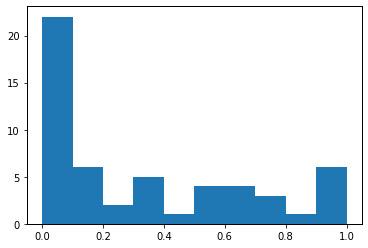

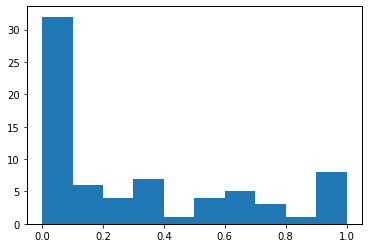

EIF3K_1
bimodal


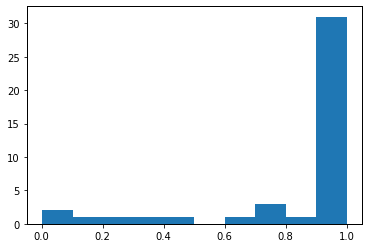

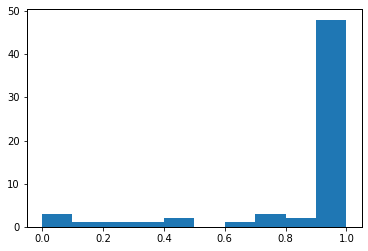

EIF4A2_3
bimodal


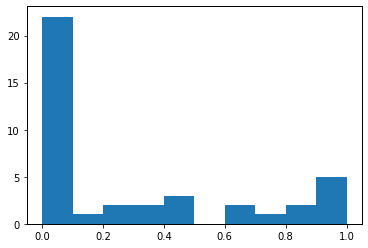

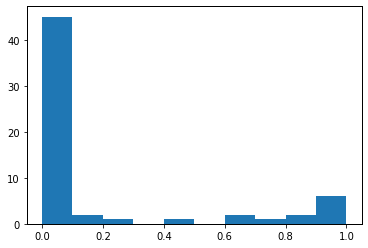

EIF4A2_4
bimodal


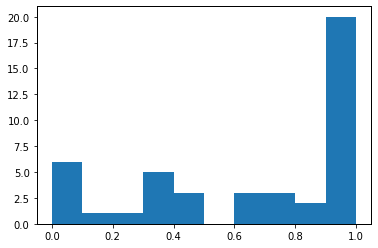

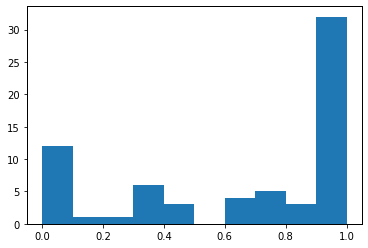

FDPS_3
bimodal


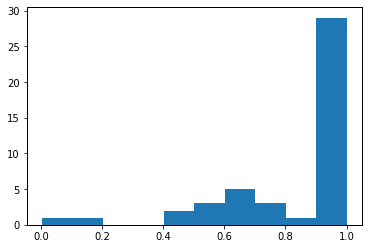

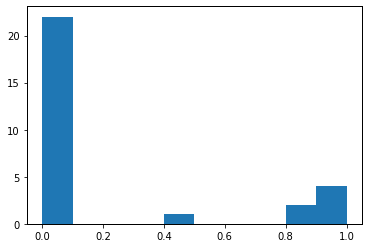

HNRNPR_6
bimodal


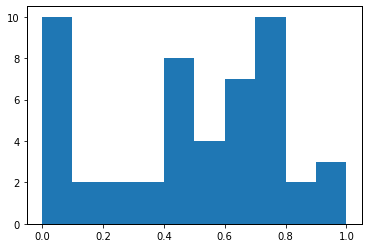

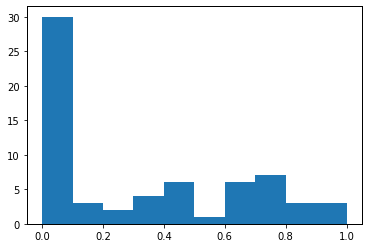

HNRNPR_7
bimodal


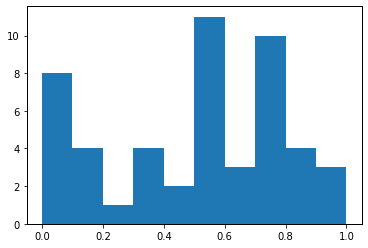

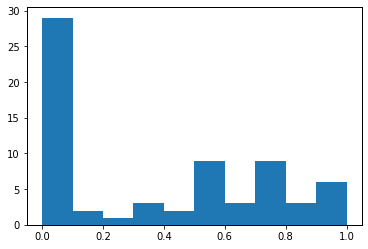

MATR3_10
bimodal


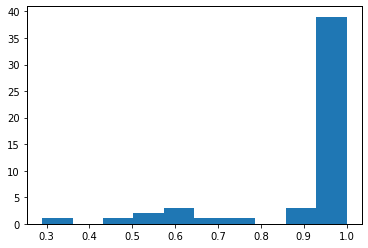

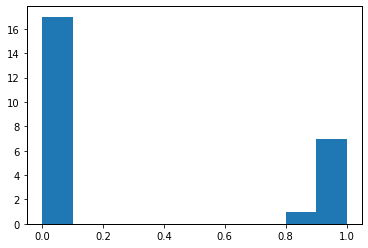

PCBP2_11
bimodal


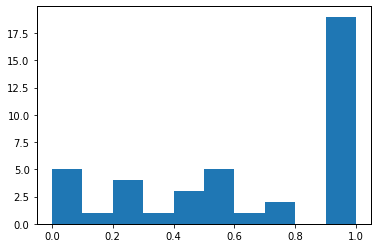

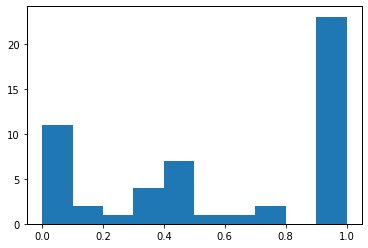

PCBP2_5
bimodal


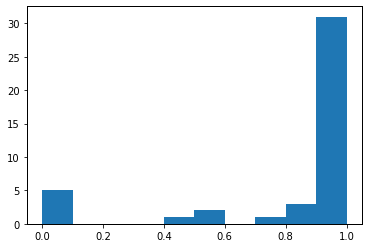

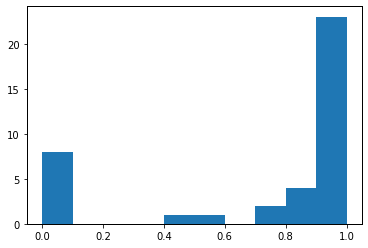

PCBP2_9
bimodal


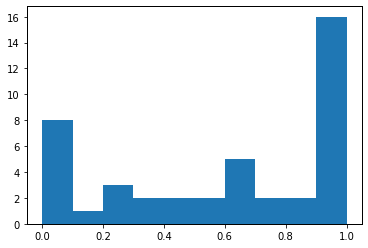

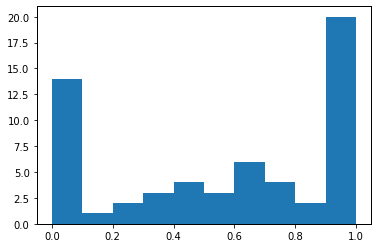

RBM4_2
bimodal


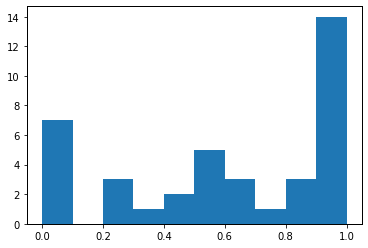

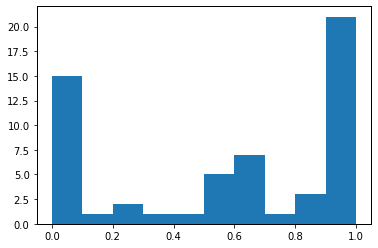

SNHG6_1
bimodal


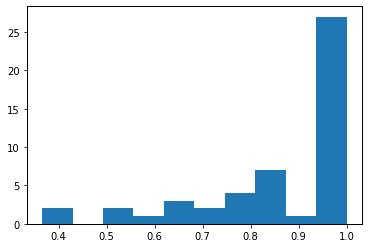

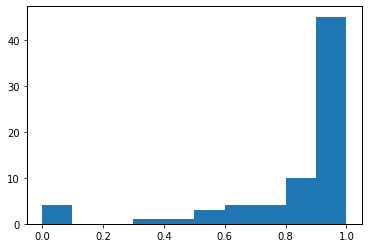

SYNCRIP_4
bimodal


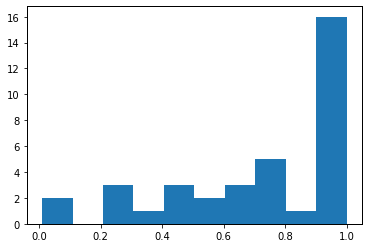

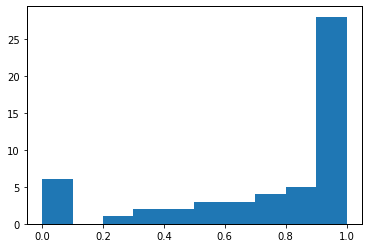

TCF12_1
bimodal


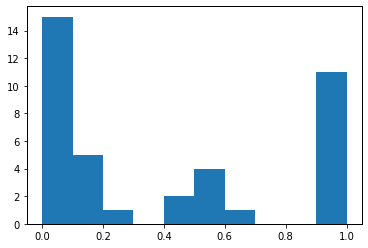

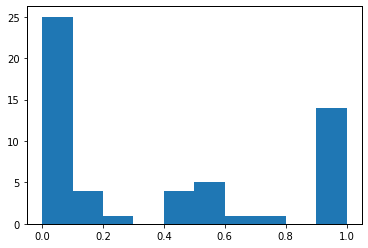

VPS29_1
bimodal


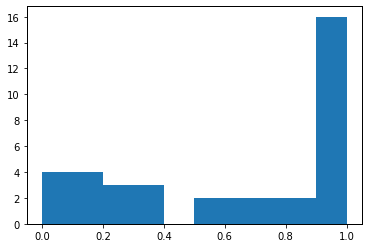

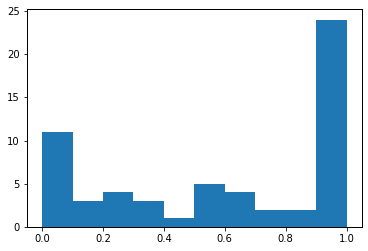

VPS29_3
bimodal


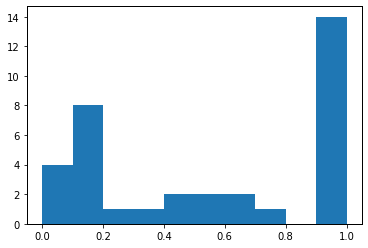

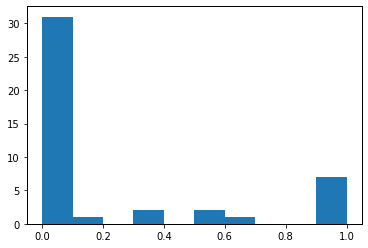

ZFAS1_3
bimodal


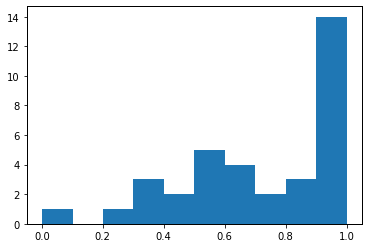

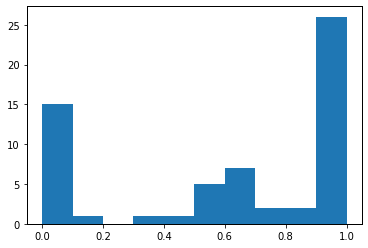

In [56]:
suma_NPC = 0
suma_NPC_unfiltered = 0
suma_NPC_filtered = 0
suma_NPC_outrigger = 0
for evento in [x for x in song_NPC_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'NPC'] == 'bimodal':
        suma_NPC += 1

        print(evento)
        print(song_modalities.loc[evento, 'NPC'])

        plt.hist(song_NPC_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_NPC, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_NPC_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_NPC_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_NPC_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_NPC, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_NPC, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_NPC_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_NPC].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_NPC_unfiltered += 1
        

AKAP9_3
bimodal


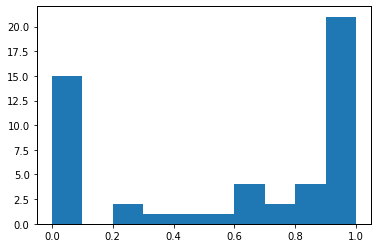

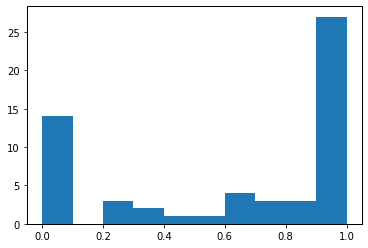

BAZ2B_1
bimodal


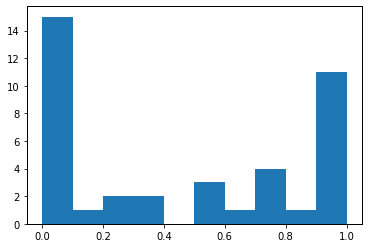

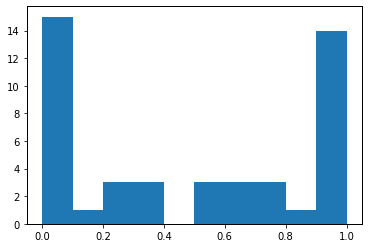

BAZ2B_4
bimodal


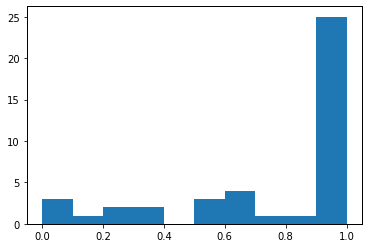

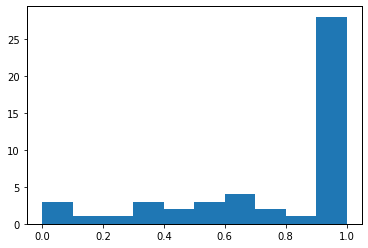

DCX_1
bimodal


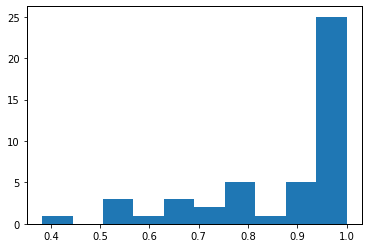

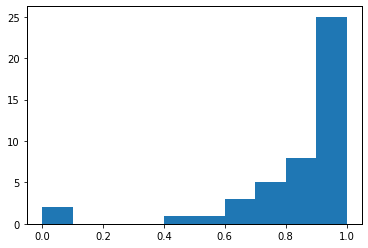

DGUOK_2
bimodal


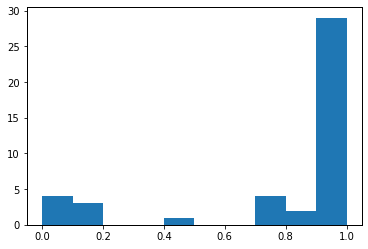

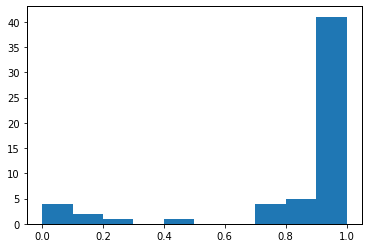

DGUOK_7
bimodal


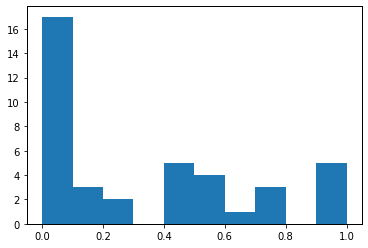

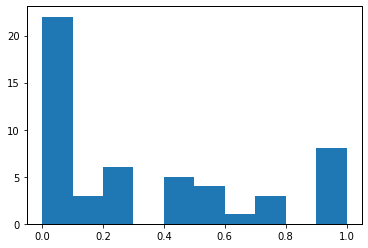

EIF3I_4
bimodal


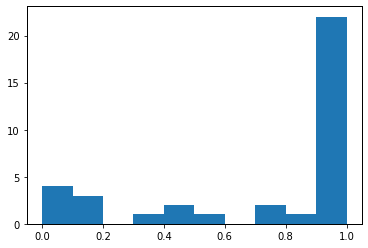

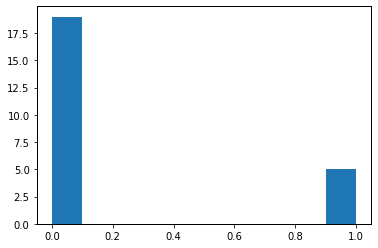

EIF3K_1
bimodal


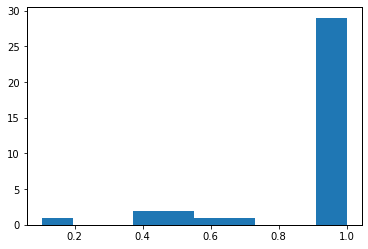

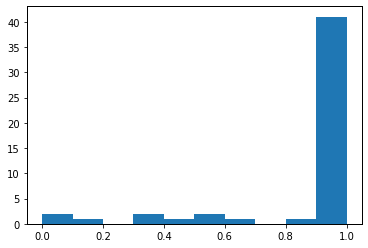

EIF4A2_4
bimodal


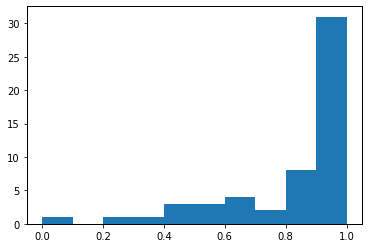

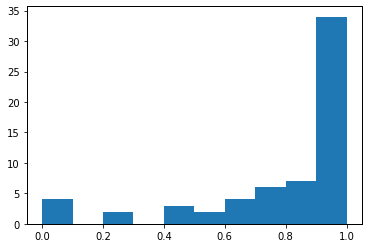

ELAVL4_2
bimodal


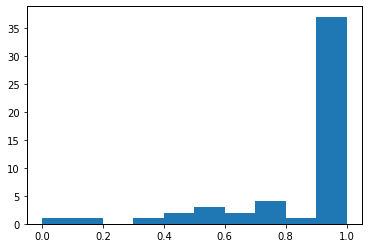

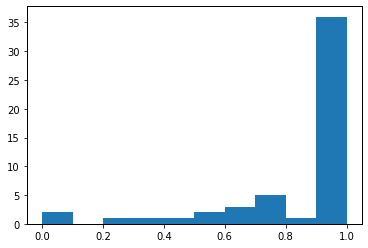

GAS5_19
bimodal


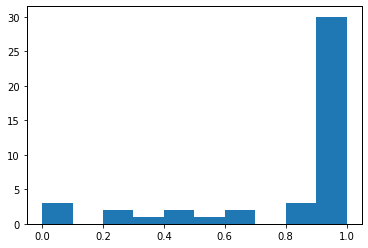

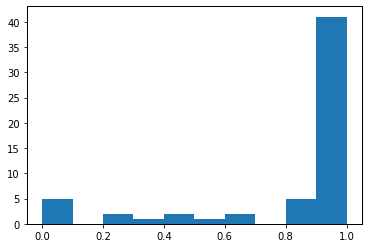

HNRNPC_1
bimodal


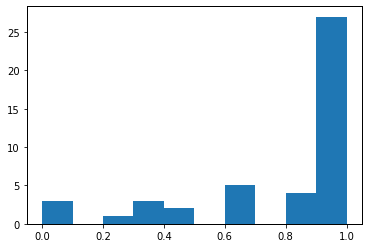

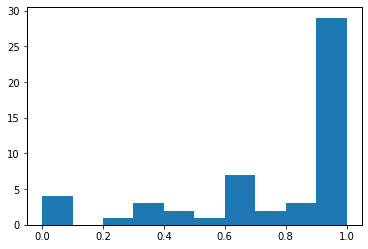

HNRNPDL_7
bimodal


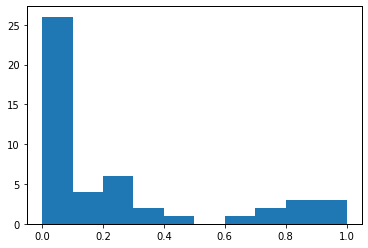

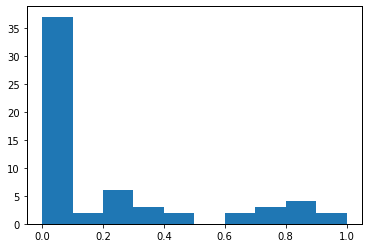

HNRNPR_4
bimodal


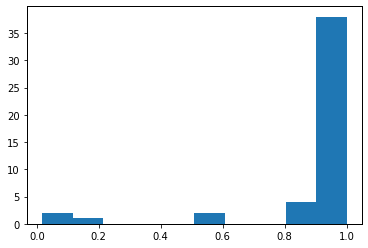

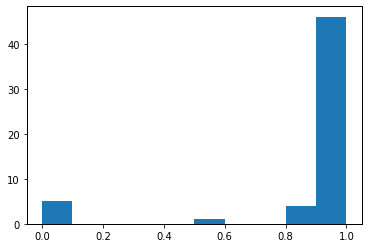

HNRNPR_6
bimodal


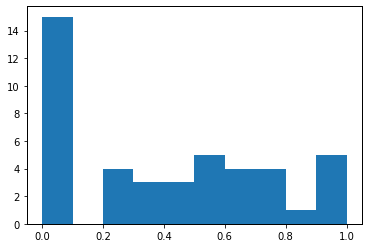

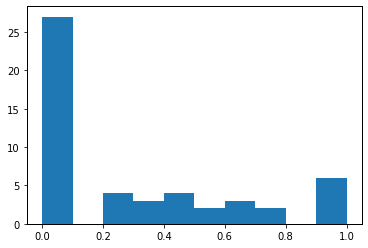

HNRNPR_7
bimodal


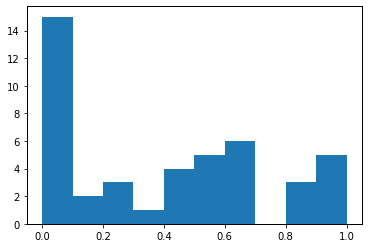

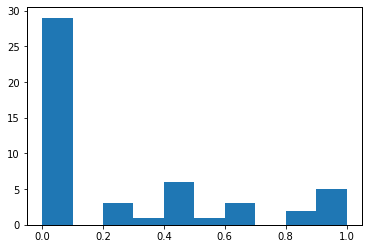

MORF4L2_1
bimodal


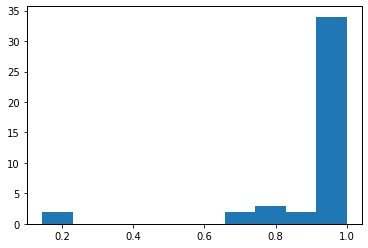

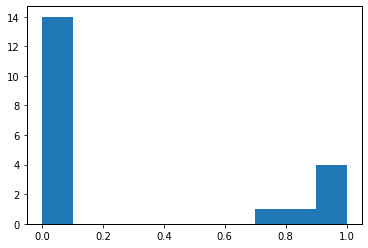

MORF4L2_3
bimodal


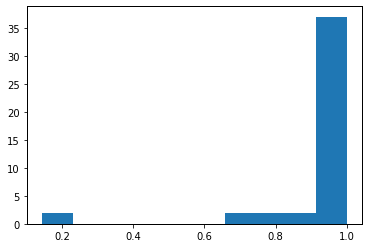

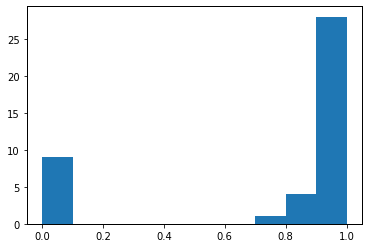

MRPL33_3
bimodal


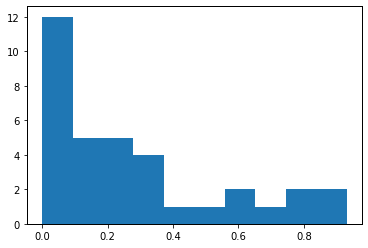

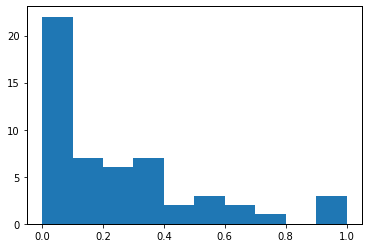

OCIAD2_9
bimodal


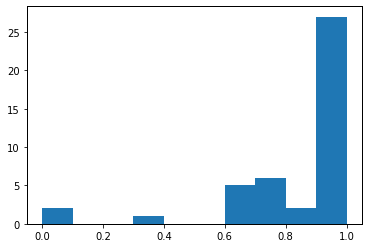

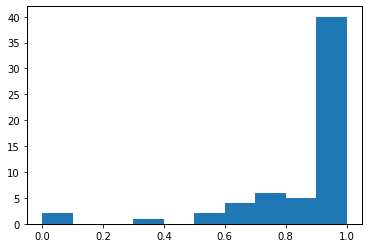

PNISR_2
bimodal


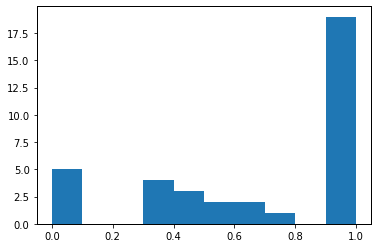

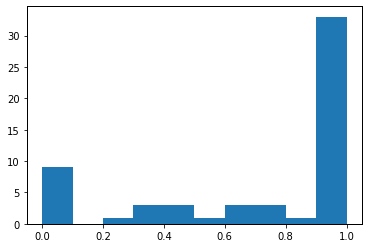

PRDX5_2
bimodal


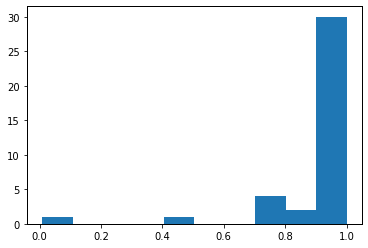

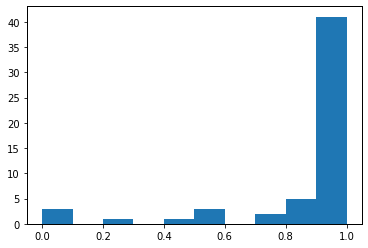

PRDX5_4
bimodal


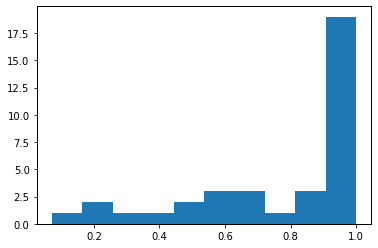

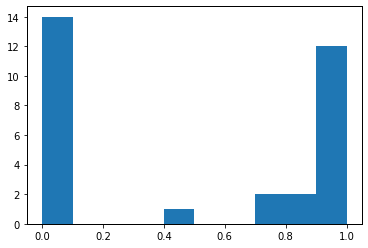

RBFOX2_1
bimodal


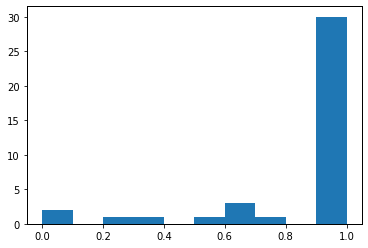

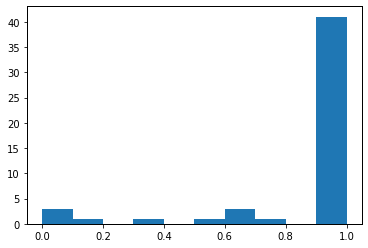

RBM39_nmdSE_2
bimodal


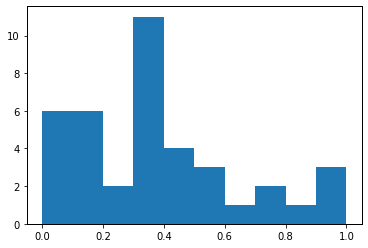

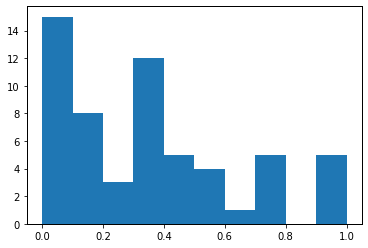

RBM4_2
bimodal


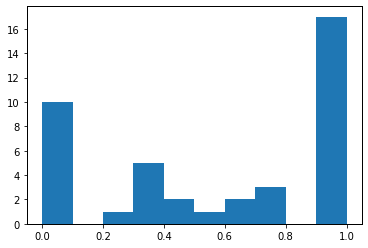

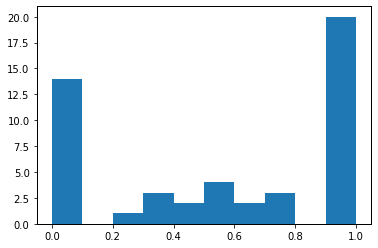

RPAIN_2
bimodal


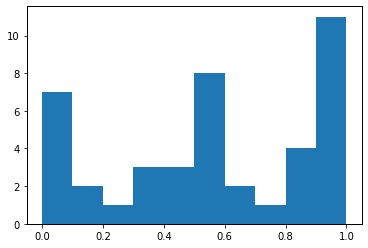

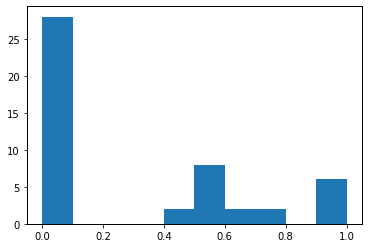

RPAIN_6
bimodal


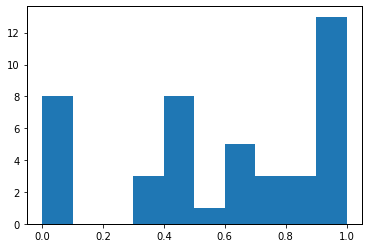

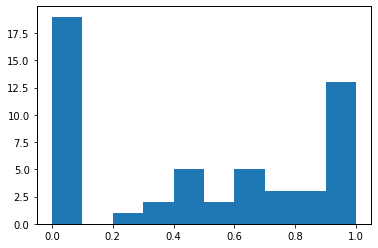

RPAIN_7
bimodal


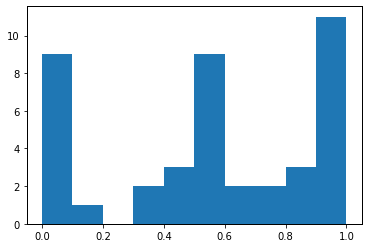

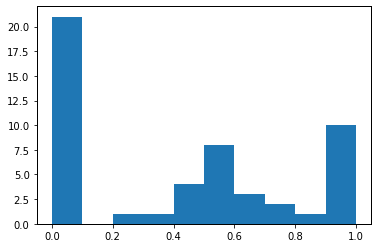

TTC3_1
bimodal


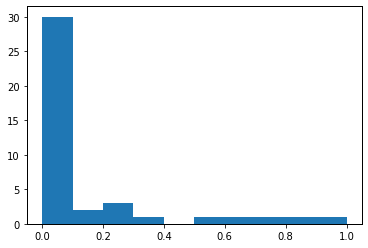

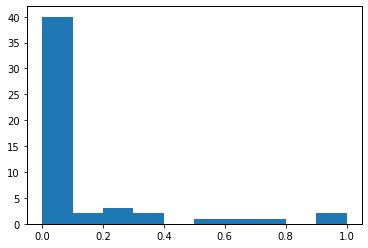

YWHAZ_2
bimodal


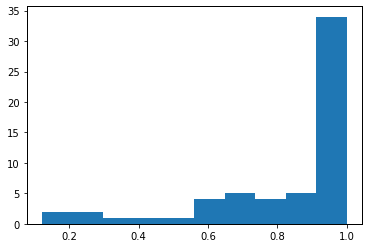

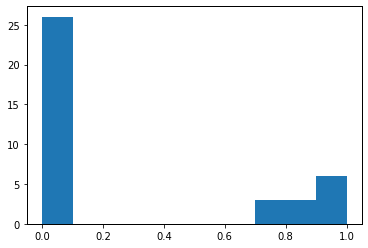

In [57]:
suma_MN = 0
suma_MN_unfiltered = 0
suma_MN_filtered = 0
suma_MN_outrigger = 0
for evento in [x for x in song_MN_filtered[0].index if x in song_modalities.index]:
    if song_modalities.loc[evento, 'MN'] == 'bimodal':
        suma_MN += 1

        print(evento)
        print(song_modalities.loc[evento, 'MN'])

        plt.hist(song_MN_filtered[0].loc[evento].dropna())
        plt.show()
            
            
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        
        plt.hist(song_outrigger.loc[outrigger_MN, outrigger_event].dropna())
        plt.show()
        
        
        
             
        quantile_25 = song_MN_filtered[0].loc[evento].quantile(0.25)
        quantile_75 = song_MN_filtered[0].loc[evento].quantile(0.75)
        
        if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):
            
            suma_MN_filtered += 1
                    
        
        quantile_25_outrigger = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.25)
        quantile_75_outrigger = song_outrigger.loc[outrigger_MN, outrigger_event].quantile(0.75)
        
        if (quantile_25_outrigger <= 0.25) and (quantile_75_outrigger >= 0.75):
            suma_MN_outrigger += 1
            
            
        quantile_25_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.25)
        quantile_75_unfiltered = song_PSI.loc[evento, song_MN].quantile(0.75)
        
        if (quantile_25_unfiltered <= 0.25) and (quantile_75_unfiltered >= 0.75):
            suma_MN_unfiltered += 1
        

In [58]:
suma_iPSC/song_iPSC_filtered[0].shape[0]

0.16666666666666666

In [59]:
suma_iPSC_outrigger/song_iPSC_filtered[0].shape[0]

0.029411764705882353

In [60]:
suma_iPSC_outrigger

3

In [61]:
suma_MN_outrigger

6

In [62]:
quantile_75_unfiltered

1.0

In [63]:
6/song_MN_filtered[0].shape[0]

0.1276595744680851

In [64]:
suma_NPC/song_NPC_filtered[0].shape[0]

0.46938775510204084

In [65]:
suma_NPC_filtered/49

0.04081632653061224

In [66]:
10/song_NPC_filtered[0].shape[0]

0.20408163265306123

In [67]:
3/102

0.029411764705882353

In [68]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_iPSC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_iPSC].mean(axis = 1)) <= 0.3), song_iPSC]
suma_iPSC_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_iPSC_unfiltered_all += 1
                    

In [69]:
suma_iPSC_unfiltered_all / song_unfilt_selected.shape[0]

0.5099337748344371

In [70]:
song_iPSC_filtered[0].shape[0] / song_unfilt_selected.shape[0]

0.08443708609271523

In [71]:
song_iPSC_filtered[0].shape[0]

102

In [72]:
song_unfilt_selected.shape[0]

1208

In [73]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_NPC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_NPC].mean(axis = 1)) <= 0.3), song_NPC]
suma_NPC_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_NPC_unfiltered_all += 1
                    

In [74]:
suma_NPC_unfiltered_all/song_unfilt_selected.shape[0]

0.5741324921135647

In [75]:
suma_NPC_filtered/song_NPC_filtered[0].shape[0]

0.04081632653061224

In [76]:
song_unfilt_selected = song_PSI.loc[(song_PSI[song_MN].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_MN].mean(axis = 1)) <= 0.3), song_MN]
suma_MN_unfiltered_all = 0
for evento in song_unfilt_selected.index:
             
    quantile_25 = song_unfilt_selected.loc[evento].quantile(0.25)
    quantile_75 = song_unfilt_selected.loc[evento].quantile(0.75)
        
    if (quantile_25 <= 0.25) and (quantile_75 >= 0.75):

        suma_MN_unfiltered_all += 1
                    

In [77]:
suma_MN_unfiltered_all/song_unfilt_selected.shape[0]

0.5363790186125211

In [78]:
song_unfilt_selected.shape

(591, 70)

In [79]:
song_iPSC_filtered = process_subpop(song_iPSC, song_PSI, song_mrna_counts, 
                                    mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_NPC_filtered = process_subpop(song_NPC, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)
song_MN_filtered = process_subpop(song_MN, song_PSI, song_mrna_counts, 
                                  mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 0.1, 10)


In [80]:
song_iPSC_unfiltered = song_PSI.loc[(song_PSI[song_iPSC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_iPSC].mean(axis = 1)) <= 0.4), song_iPSC]
song_NPC_unfiltered = song_PSI.loc[(song_PSI[song_NPC].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_NPC].mean(axis = 1)) <= 0.4), song_NPC]
song_MN_unfiltered = song_PSI.loc[(song_PSI[song_MN].isna().mean(axis = 1) <= 0.75) & (np.abs(0.5-song_PSI[song_MN].mean(axis = 1)) <= 0.4), song_MN]


In [81]:
song_iPSC_filtered[0].mean(axis=1).min()

0.10145187285206692

In [82]:
song_iPSC_filtered[0].shape

(102, 62)

In [83]:
song_PSI.loc[song_iPSC_filtered[0].index, song_iPSC_filtered[0].columns].mean(axis=1).max()

0.8996632229622492

In [84]:
assert np.all([x in song_iPSC_unfiltered.index for x in song_iPSC_filtered[0].index])
assert np.all([x in song_NPC_unfiltered.index for x in song_NPC_filtered[0].index])
assert np.all([x in song_MN_unfiltered.index for x in song_MN_filtered[0].index])

In [85]:
suma_iPSC = 0
suma_iPSC_unfiltered = 0
suma_iPSC_filtered_all = 0
suma_iPSC_filtered = 0
suma_iPSC_outrigger = 0
suma_iPSC_outrigger_total = 0

for evento in song_iPSC_unfiltered.index:
        
    q25_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.25)
    q75_unfiltered = song_iPSC_unfiltered.loc[evento].quantile(0.75)
    if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
        suma_iPSC_unfiltered += 1
        
    if evento in song_iPSC_filtered[0].index:
        
        q25_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.25)
        q75_filtered_all = song_PSI.loc[evento, song_iPSC].quantile(0.75)        
        if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
            suma_iPSC_filtered_all += 1
            
        q25_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.25)
        q75_filtered = song_iPSC_filtered[0].loc[evento].quantile(0.75)
        if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
            suma_iPSC_filtered += 1
       
    if evento in song_modalities.index:
        suma_iPSC_outrigger_total += 1
        outrigger_event = song_modalities.loc[evento, 'song_annotation']
        
        q25_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.25)
        q75_outrigger = song_outrigger.loc[outrigger_iPSC, outrigger_event].quantile(0.75)
        
        if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
            suma_iPSC_outrigger += 1
            

In [86]:
from scipy.stats import hypergeom
def hyper_test(M, n, N, k):
    
    hpd = hypergeom(M, n, N)
    p_depleted = hpd.cdf(k)
    p_enriched = hpd.sf(k-1)
    
    return p_depleted, p_enriched

In [87]:
def get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = '', outrigger_modalities = '', outrigger_subpop = ''):
    
    PSI_filtered = process_subpop(subpop, PSI_tab, mrna_counts, 
                                    mrna_per_event, read_counts, coverage_tab['SJ_coverage'], psi_int, mrna_min)
    
    PSI_observed = (PSI_tab[subpop].isna().mean(axis = 1) <= 0.5)
    PSI_int = (np.abs(0.5-PSI_tab[subpop].mean(axis = 1)) <= (0.5-psi_int))
    PSI_unfiltered = PSI_tab.loc[(PSI_observed & PSI_int), subpop]
    
    assert np.all([x in PSI_unfiltered.index for x in PSI_filtered[0].index])
    
    suma = len(PSI_unfiltered.index)
    suma_f = len(PSI_filtered[0].index)
    suma_unfiltered = 0
    suma_filtered_all = 0
    suma_filtered = 0
    suma_outrigger = 0
    suma_outrigger_total = 0

    for evento in PSI_unfiltered.index:

        q25_unfiltered = PSI_unfiltered.loc[evento].quantile(0.25)
        q75_unfiltered = PSI_unfiltered.loc[evento].quantile(0.75)
        if (q25_unfiltered <= 0.25) and (q75_unfiltered >= 0.75):
            suma_unfiltered += 1

        if evento in PSI_filtered[0].index:

            q25_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.25)
            q75_filtered_all = PSI_tab.loc[evento, subpop].quantile(0.75)        
            if (q25_filtered_all <= 0.25) and (q75_filtered_all >= 0.75):
                suma_filtered_all += 1

            q25_filtered = PSI_filtered[0].loc[evento].quantile(0.25)
            q75_filtered = PSI_filtered[0].loc[evento].quantile(0.75)
            if (q25_filtered <= 0.25) and (q75_filtered >= 0.75):
                suma_filtered += 1

        if len(outrigger_modalities) >= 1:
            if evento in outrigger_modalities.index:
                suma_outrigger_total += 1
                outrigger_event = outrigger_modalities.loc[evento, 'song_annotation']

                q25_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.25)
                q75_outrigger = outrigger_tab.loc[outrigger_subpop, outrigger_event].quantile(0.75)

                if (q25_outrigger <= 0.25) and (q75_outrigger >= 0.75):
                    suma_outrigger += 1


    p_deplete = hyper_test(suma, suma_unfiltered, suma_f, suma_filtered)[0]
                    
    
    return suma, suma_f, suma_unfiltered, suma_filtered_all, suma_filtered, suma_outrigger, suma_outrigger_total, p_deplete


In [88]:
get_proportions(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.1, mrna_min = 10,
                   outrigger_tab = song_outrigger, outrigger_modalities = song_modalities, outrigger_subpop = outrigger_iPSC)

(1266, 102, 269, 0, 0, 235, 1125, 8.14419171834066e-12)

In [89]:
269/616

0.4366883116883117

In [90]:
177/579

0.30569948186528495

In [91]:
get_proportions(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(188, 20, 85, 8, 4, 0, 0, 0.01345020242302973)

In [92]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(457, 43, 173, 6, 3, 0, 0, 1.7139526385648574e-06)

In [93]:
get_proportions(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

(452, 97, 108, 2, 0, 0, 0, 6.425484125955408e-14)

In [94]:
def test_dset(PSI_tab, subpop_list, mrna_counts, mrna_per_event, read_counts, coverage_tab, psi_int = 0.1, mrna_min = 10):
    total = []
    bimodal_total = []
    filtered = []
    bimodal_filtered = []
    pvals = []
    for subpop in subpop_list:
        proport = get_proportions(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, 
                                  psi_int = psi_int, mrna_min = mrna_min)
        
        total.append(proport[0])
        bimodal_total.append(proport[2])
        filtered.append(proport[1])
        bimodal_filtered.append(proport[4])
        pvals.append(proport[7])
        
    return total, bimodal_total, filtered, bimodal_filtered, pvals



In [95]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[] 


cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in [chen_ES2i, chen_ES, chen_Epi, chen_MN]])
cells_in_cluster.extend([len(x) for x in [lescroart_E6, lescroart_E7]])
cells_in_cluster.extend([len(x) for x in [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72]])
cells_in_cluster.extend([len(x) for x in [song_iPSC, song_NPC, song_MN]])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, [chen_ES2i, chen_ES, chen_Epi, chen_MN], chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, [lescroart_E6, lescroart_E7], lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, [trapnell_M00, trapnell_M24, trapnell_M48, trapnell_M72], 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, [song_iPSC, song_NPC, song_MN], song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

KeyboardInterrupt: 

In [ ]:
pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [ ]:
multipletests(pvals, method='fdr_bh')[1]

In [ ]:
multipletests(pvals+[0.049, 0.15], method='fdr_bh')

In [ ]:
cell_type = ['mES2i', 'mES', 'Epi', 'Motor neuron', 'Heart E6.75', 'Heart E7.25', 
             'Myoblast 00h', 'Myoblast 24h', 'Myoblast 48h', 'Myoblast 72h',
             'iPSC', 'NPC', 'Motor neuron', 'BMDC']
dataset = ['Chen']*4 + ['Lescroart']*2 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*6+['Human']*7+['Mouse']

In [ ]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cell_type'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [ ]:
bimodality_table.to_csv('selected_int_exons.csv', index=False, header=True)

In [ ]:
bimodality_table

In [ ]:
chen_clusters = []
for cluster in chen_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = chen_pca_clust.index[chen_pca_clust.AC == cluster]
    chen_clusters.append(clust_subpop)
    
    
lescroart_clusters = []
for cluster in range(3):
    clust_subpop = lescroart_pca_clust.index[lescroart_pca_clust.AC == cluster]
    lescroart_clusters.append(clust_subpop)
    
trapnell_clusters = []
for cluster in trapnell_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = trapnell_pca_clust.index[trapnell_pca_clust.AC == cluster]
    trapnell_clusters.append(clust_subpop)
    

song_clusters = []
for cluster in song_pca_clust.groupby('AC')['pseudotime'].mean().sort_values().index:
    clust_subpop = song_pca_clust.index[song_pca_clust.AC == cluster]
    song_clusters.append(clust_subpop)
    
 

In [ ]:
total = [] 
bimodal_total = [] 
filtered = [] 
bimodal_filtered = [] 
pvals =[]

cells_in_cluster = []

cells_in_cluster.extend([len(x) for x in chen_clusters])
cells_in_cluster.extend([len(x) for x in lescroart_clusters])
cells_in_cluster.extend([len(x) for x in trapnell_clusters])
cells_in_cluster.extend([len(x) for x in song_clusters])
cells_in_cluster.append(len(shalek_PSI.columns))


chen_processed = test_dset(chen_PSI, chen_clusters, chen_mrna_counts, mrna_per_event_chen, 
          chen_read_counts, chen_coverage_tab, psi_int = 0.2, mrna_min = 10)

lescroart_processed = test_dset(lescroart_PSI, lescroart_clusters, lescroart_mrna_counts, mrna_per_event_lescroart, 
          lescroart_read_counts, lescroart_coverage_tab, psi_int = 0.2, mrna_min = 10)

trapnell_processed = test_dset(trapnell_PSI, trapnell_clusters, 
                               trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, 
                               trapnell_coverage_tab, psi_int = 0.2, mrna_min = 10)

song_processed = test_dset(song_PSI, song_clusters, song_mrna_counts, mrna_per_event_song, 
          song_read_counts, song_coverage_tab, psi_int = 0.2, mrna_min = 10)

shalek_processed = test_dset(shalek_PSI, [shalek_PSI.columns], shalek_mrna_counts, mrna_per_event_shalek, 
          shalek_read_counts, shalek_coverage_tab, psi_int = 0.2, mrna_min = 10)


total.extend(chen_processed[0])
total.extend(lescroart_processed[0])
total.extend(trapnell_processed[0])
total.extend(song_processed[0])
total.extend(shalek_processed[0])

bimodal_total.extend(chen_processed[1])
bimodal_total.extend(lescroart_processed[1])
bimodal_total.extend(trapnell_processed[1])
bimodal_total.extend(song_processed[1])
bimodal_total.extend(shalek_processed[1])

filtered.extend(chen_processed[2])
filtered.extend(lescroart_processed[2])
filtered.extend(trapnell_processed[2])
filtered.extend(song_processed[2])
filtered.extend(shalek_processed[2])

bimodal_filtered.extend(chen_processed[3])
bimodal_filtered.extend(lescroart_processed[3])
bimodal_filtered.extend(trapnell_processed[3])
bimodal_filtered.extend(song_processed[3])
bimodal_filtered.extend(shalek_processed[3])

pvals.extend(chen_processed[4])
pvals.extend(lescroart_processed[4])
pvals.extend(trapnell_processed[4])
pvals.extend(song_processed[4])
pvals.extend(shalek_processed[4])

pval_adj = multipletests(pvals, method='fdr_bh')[1]

In [ ]:
cell_type = ['chen_1', 'chen_2', 'chen_3', 'chen_4', 'chen_5', 'lescroart_1', 'lescroart_2', 'lescroart_2',
             'trapnell_1', 'trapnell_2', 'trapnell_3', 'trapnell_4', 'song_1', 'song_2', 'song_3', 'shalek_1']

dataset = ['Chen']*5 + ['Lescroart']*3 + ['Trapnell']*4 + ['Song']*3 + ['Shalek']
organism = ['Mouse']*8+['Human']*7+['Mouse']

In [ ]:
bimodality_table = pd.DataFrame()
bimodality_table['dataset'] = dataset
bimodality_table['organism'] = organism
bimodality_table['cluster'] = cell_type
bimodality_table['cells_in_cluster'] = cells_in_cluster
bimodality_table['total_exons'] = total
bimodality_table['bimodal_exons'] = bimodal_total
bimodality_table['bimodal_percent'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_total)/np.array(total)]
bimodality_table['selected_exons'] = filtered
bimodality_table['selected_bimodal'] = bimodal_filtered
bimodality_table['bimodal_percent_selected'] = [str(round(x*100, 2))+'%' for x in np.array(bimodal_filtered)/np.array(filtered)]
bimodality_table['p-val'] = pvals
bimodality_table['p-val (adj)'] = pval_adj

In [ ]:
bimodality_table

In [ ]:
bimodality_table.to_csv('selected_int_exons_clusters.csv', index=False, header=True)

In [ ]:
round(34.3223,2)

In [ ]:
75/336

In [ ]:
get_proportions(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                psi_int = 0.2, mrna_min = 10)

In [ ]:
6/43

In [ ]:
173/457

In [ ]:
hypergeom.sf(10, 100, 4, 40)

In [ ]:
import scipy.stats as stats
oddsratio, pvalue = stats.fisher_exact([[457-173, 173], [43-6, 6]])
print(pvalue)

In [ ]:
(452, 97, 108, 2, 0, 0, 0)

In [ ]:
hyper_test(234, 40, 20, 1)

In [ ]:
(173/457)/(6/43)

In [ ]:
sra_meta = pd.read_csv('shalek.meta.tab', sep='\t', index_col=0)
shalek_PSI_paper = pd.read_csv('../../../data/shalek/shalek.psi_paper.csv', index_col = 0)
shalek_counts_paper = pd.read_csv('../../../data/shalek/shalek.expression_paper.csv', index_col = 0)
shalek_pca = pd.read_csv('../../../data/shalek/shalek.pca.tab', index_col = 0, sep='\t')

In [ ]:
# shalek_PSI_paper.columns

In [ ]:
shalek_cells = shalek_PSI_paper.columns[1:18]


In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Acpp_AE']+1), shalek_PSI.loc['Acpp_AE', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Acpp alternative end exon', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec7a_other_1']+1), 
            shalek_PSI.loc['Clec7a_other_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec7a SE', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()



In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irgm1_1']+1), 
            shalek_PSI.loc['Irgm1_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


In [ ]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRGM1', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irgm1', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irgm1 SE, MISO', fontsize = 20)
plt.ylim(-0.1, 1.1)
plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Irf7_1']+1), 
            shalek_PSI.loc['Irf7_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


In [ ]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['IRF7', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Irf7', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Irf7 SE, MISO', fontsize = 20)
plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Clec4n_2']+1), 
            shalek_PSI.loc['Clec4n_2', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE', fontsize = 20)
plt.show()


In [ ]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['CLEC4N', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Clec4n SE, MISO', fontsize = 20)
plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Sat1_nmdSE_1']+1), 
            shalek_PSI.loc['Sat1_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Sat1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()



In [ ]:
# Not in their paper

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Zfp207_2']+1), 
            shalek_PSI.loc['Zfp207_2', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()


In [ ]:
plt.scatter(np.log10(np.array(list(shalek_counts_paper.loc['ZFP207', shalek_cells]))+1),
            np.array(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Zfp207', shalek_cells].index[0],
                                         shalek_cells]))
plt.xlabel('log10 TPM expresion', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Zfp207 SE, MISO', fontsize = 20)
plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Psmg4_1']+1), 
            shalek_PSI.loc['Psmg4_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [ ]:
# not in their paper

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_1']+1), 
            shalek_PSI.loc['Abi1_1', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_3']+1), 
            shalek_PSI.loc['Abi1_3', mrna_per_event_shalek.columns])
plt.ylim(-0.1, 1.1)

plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Abi1_7']+1), 
            shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns])

plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Abi1 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

In [ ]:
plt.scatter(np.log10(mrna_per_event_shalek.loc['Srsf7_nmdSE_1']+1), 
            shalek_PSI.loc['Srsf7_nmdSE_1', mrna_per_event_shalek.columns])
plt.xlabel('log10 mRNA + 1', fontsize = 20)
plt.ylabel('$\Psi$', fontsize = 20)
plt.title('Srsf7 SE', fontsize = 20)
plt.ylim(-0.1, 1.1)

plt.show()

In [ ]:
shalek_int_genes, shalek_int_exons = spu.get_int_events(shalek_PSI, shalek_mrna_counts, 0.05)
shalek_int_exons = [x for x in shalek_int_exons if x in mrna_per_event_shalek.index]
shalek_PSI_filtered, shalek_PSI_mrna_filtered, shalek_good_exons, mrna_filtered, reads_filtered = filter_psi(shalek_PSI, 
                                            shalek_int_exons, mrna_per_event_shalek, shalek_coverage_tab['SJ_coverage'], 
                                                                        shalek_read_counts, 10,
                                                                       cell_min=0.5)

good_cells = shalek_PSI_filtered.columns[shalek_PSI_filtered.isna().mean() <= 0.5]
shalek_PSI_good = shalek_PSI_filtered[good_cells]

shalek_hist_complete_f, shalek_hist_intermediate_f = scp.get_bins_table2(shalek_PSI_filtered, mrna_filtered, 11)


import importlib
importlib.reload(scp)
importlib.reload(spu)
sns.reset_orig()
mpl.rcParams["mathtext.fontset"] = "stix"

hist_list = [shalek_hist_complete_f]

dset_name_list = ['Shalek']


scp.plot_histograms(hist_list, dset_name_list, fig_len=10, fig_height = 10, ypos1=0.025, ypos2 = 0.625,
                    plot_dir = 'plots2/figure1/', plot_name = 'PSI_distributions_filtered_shalek',
                    plot_title = "", 
                    ylab='Exons ranked by junction reads', ls=18, sk=1.65, tfs=20, nbins=11)

plt.show()

In [ ]:
shalek_PSI_filtered.index

In [ ]:
shalek_paper_bin_exon = ['Acpp_AE', 'Clec7a_other_1', 'Irgm1_1', 'Irf7_1', 'Clec4n_2', 'Sat1_nmdSE_1', 'Zfp207', 
                         'Abi1_7', 'Srsf7_nmdSE_1', 'Psmg4_1']

In [ ]:
for event in [x for x in shalek_paper_bin_exon if x in shalek_PSI_filtered.index]:
    print(event)
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25))
    print(shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75))

In [ ]:
shalek_PSI.loc['Abi1_7', mrna_per_event_shalek.columns].quantile(0.75)

In [ ]:
for event in shalek_PSI_filtered.index:
    q25 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.25)
    q75 = shalek_PSI.loc[event, mrna_per_event_shalek.columns].quantile(0.75)
    
    if (q25 <= 0.25) and (q75 >= 0.75):
        print(event)
        print(q25)
        print(q75)

In [ ]:
shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index[0],
                                         shalek_cells].quantile(0.25)


In [ ]:
len(shalek_PSI_paper.loc[shalek_PSI_paper.gene=='Clec4n', shalek_cells].index)

In [ ]:
for event in shalek_paper_bin_exon:
    gen = event.split('_')[0]
    if len(shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index) >= 1:
        print(event)
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.25))
        print(shalek_PSI_paper.loc[shalek_PSI_paper.loc[shalek_PSI_paper.gene==gen, shalek_cells].index[0],
                                         shalek_cells].quantile(0.75))

In [ ]:
# Add: PCA on gene expression ofonly cells of certain type or cluster. See if it separates PSI.

In [ ]:
[x for x in chen_PSI.index if 'Rbm4' in x]

In [ ]:
figsize(6, 4)
plt.hist(chen_PSI.loc['Rbm4_1', chen_MN].dropna())
plt.show()

In [ ]:
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/')
scp.plot_pca(chen_pca, chen_PSI, mrna_per_event_chen, chen_read_counts, chen_coverage_tab['SJ_coverage'], 
             'Rbm4_1', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [ ]:
def plot_pca(pca_tab, psi_tab, mrna_tab, reads_tab, cj, event, mrna_min, plot_dir, cmap='viridis', filter_cells=True):
    
    #pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (rpm_tab.loc[event] >= rpm_tab.mean(axis=1).quantile(0.1))]
    
    
    if filter_cells:
        read_min = mrna_min*cj*(1+psi_tab.loc[event])

        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > mrna_min) & (reads_tab.loc[event] >= read_min)]
        
    else:
        pass_cells = psi_tab.columns[(mrna_tab.loc[event] > -1) & (reads_tab.loc[event] >= -1)]


    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.PC1, pca_tab.PC2, c='gray', s=150, edgecolors='none', alpha=0.1)
    sc = ax.scatter(pca_tab.loc[pass_cells, 'PC1'], pca_tab.loc[pass_cells, 'PC2'], 
                c=psi_tab.loc[event, pass_cells], s=250, edgecolors='none', vmin=0, vmax=1, cmap=cmap)
    
    ax.plot(pca_tab.line_1, -pca_tab.line_2, c='red',linewidth=2)

    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    
#     ax.set_xlim([-65, 102])
#     ax.set_ylim([-55, 63])
    
    cb = plt.colorbar(sc, shrink = 0.8)
    cb.set_label(label='$\Psi$',size=42)
    cb.ax.tick_params(labelsize=42)
    
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    
    ax.tick_params(labelsize=42)

    plt.ylabel('PC2', fontsize=42)
    plt.xlabel('PC1', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)
    
    if filter_cells:

        plt.savefig(plot_dir+event+'.pca.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.png', dpi=300, bbox_inches='tight')
        
    else:
        
        plt.savefig(plot_dir+event+'.pca.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pca.no_filter.png', dpi=300, bbox_inches='tight')

        
    
    
    #plt.show()
    
    figsize(14,10)
    fig = plt.figure()
    ax  = plt.subplot(1,1,1)
    ax.scatter(pca_tab.pseudotime, psi_tab.loc[event], c='skyblue', s=150, edgecolors='none', alpha=0.5)
    ax.scatter(pca_tab.loc[pass_cells, 'pseudotime'], psi_tab.loc[event, pass_cells], 
                c='navy', s=250, edgecolors='none')
    
    ax.set_ylim((-0.05,1.05))
    
    #plt.plot(chen_pca.line_1, -chen_pca.line_2, c='red',linewidth=3, label='lineage')
    #plt.legend(frameon=False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    
    ax.tick_params(labelsize=42)

    plt.ylabel('$\Psi$', fontsize=42)
    plt.xlabel('pseudotime', fontsize=42)
    plt.title(event.split('_')[0], fontsize=48)

    if filter_cells:
    
        plt.savefig(plot_dir+event+'.pseudotime.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.png', dpi=300, bbox_inches='tight')
        
    else:
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.svg', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.pdf', bbox_inches='tight')
        plt.savefig(plot_dir+event+'.pseudotime.no_filter.png', dpi=300, bbox_inches='tight')
    
    plt.show()
    


In [ ]:
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/')
plot_pca(song_pca, song_PSI, mrna_per_event_song, song_read_counts, song_coverage_tab['SJ_coverage'], 
             'RBM4_2', 10, plot_dir='plots_review/figure3/events/', filter_cells=False)



In [ ]:
# Check bam alignments for RBM4
# Regression for bursts kinetics and bimodalty
# COntrol by expression, see of there are differences high freq low size, viceversa

In [ ]:
chen_selected_exons = []
for clust in chen_clust_filter:
    chen_selected_exons.extend(list(clust[0].index))
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [ ]:
len(chen_selected_exons)

In [ ]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [ ]:
aver_total = aver[0].T.corr().dropna().index
# aver[0].loc[aver_total].T.corr()

In [ ]:
aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]

In [ ]:
sns.clustermap(aver[0].loc[aver_total_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

aver_total_ = aver[0].T.corr().index
aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0.01]
#aver[0].loc[aver_total_]


aver_filtered_ = []
aver_filtered_basura_ = []
for x in aver_total_:
    if x.split('_')[:-1] not in aver_filtered_basura_:
        aver_filtered_.append(x)
        aver_filtered_basura_.append(x.split('_')[:-1])

In [ ]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered_].T.corr().fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].T.corr(method='spearman').fillna(0), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [ ]:
len(aver_filtered_)

In [ ]:
# figsize(4,4)
# sns.clustermap(aver[0].loc[aver_filtered_].corr(method='spearman').fillna(0), cmap=cm.bwr)
# plt.show()

In [ ]:
from scipy.stats import zscore
# zscore(aver[0].loc[aver_filtered_])

In [ ]:
aver_finale = aver[0].loc[aver_filtered_]#
aver_finale = pd.DataFrame(zscore(aver_finale.T.fillna(aver_finale.T.mean()).T))
aver_finale.columns = aver[0].columns
aver_finale.index = aver_filtered_

In [ ]:
# sns.clustermap(aver_finale.corr(method='spearman'), cmap=cm.viridis)
# plt.show()

In [ ]:
# sns.clustermap(aver_finale.T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
# plt.show()

In [ ]:
chen_coverage_tab['zero'] = [0]*len(chen_coverage_tab.index)

In [ ]:
song_coverage_tab['zero'] = [0]*len(song_coverage_tab.index)
trapnell_coverage_tab['zero'] = [0]*len(trapnell_coverage_tab.index)
lescroart_coverage_tab['zero'] = [0]*len(lescroart_coverage_tab.index)

In [ ]:
sns.clustermap(aver[0].loc[aver_total].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
aver_filtered = []
aver_filtered_basura = []
for x in aver_total:
    if x.split('_')[:-1] not in aver_filtered_basura:
        aver_filtered.append(x)
        aver_filtered_basura.append(x.split('_')[:-1])

In [ ]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='spearman'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
figsize(4,4)
sns.clustermap(aver[0].loc[aver_filtered].T.corr(method='kendall'), cmap=cm.bwr, vmin=-1, vmax=1)
plt.show()

In [ ]:
chen_selected_exons = list(chen_clust_filter[0][0].index)
for clust in chen_clust_filter:
    chen_selected_exons = [x for x in list(clust[0].index) if x in chen_selected_exons]
    
chen_selected_exons = sorted(set(chen_selected_exons))

In [ ]:
aver = filter_psi(chen_PSI.loc[chen_selected_exons], chen_selected_exons, mrna_per_event_chen, chen_coverage_tab['SJ_coverage'],
          chen_read_counts, 10, 0, 0)

In [ ]:
def best_friends(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_2 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].T.corr().index
    aver_total_ = aver_total_[aver[0].loc[aver_total_].T.corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    aver_filtered_ = []
    aver_filtered_basura_ = []
    for x in aver_total_:
        if x.split('_')[:-1] not in aver_filtered_basura_:
            aver_filtered_.append(x)
            aver_filtered_basura_.append(x.split('_')[:-1])

    best_friends_3 = []
    aver_filtered_cor = aver[0].loc[aver_filtered_].T.corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0].loc[aver_filtered_].isna().mean().mean())
    print(len(aver_filtered_))


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

In [ ]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=10)

In [ ]:
best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(chen_PSI, chen_Epi, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(chen_PSI, chen_clusters[0], chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.2, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
def best_friends_cells(psi_tab, subpop, mrna_counts, mrna_per_event, read_counts, coverage_tab, method = 'best_friend',
                 na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, quant=0.9, top_friends=5):

    int_genes, int_exons = spu.get_int_events(psi_tab[subpop], mrna_counts, psi_min)
    int_exons = [x for x in int_exons if x in mrna_per_event.index]


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'SJ_coverage'],
              read_counts[subpop], 0, read_min, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_2 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_2.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_2.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)

    aver = filter_psi(psi_tab[subpop], int_exons, mrna_per_event[subpop], coverage_tab.loc[subpop, 'zero'],
              read_counts[subpop], mrna_min, 0, cell_min)

    aver_total_ = aver[0].corr().index
    aver_total_ = aver_total_[aver[0][aver_total_].corr().isna().mean(axis=1) <= 0]
    #aver[0].loc[aver_total_]


    best_friends_3 = []
    aver_filtered_cor = aver[0][aver_total_].corr()
    for i in aver_filtered_cor.index:
        if method == 'best_friend':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values()[-2])
        elif method == 'quantile':
            best_friends_3.append(np.abs(aver_filtered_cor.loc[i]).sort_values().quantile(quant))
        elif method == 'top_friends':
            best_friends_3.extend(np.abs(aver_filtered_cor.loc[i]).sort_values()[(-top_friends)-1:-1])
        else:
            raise Exception('invalid best friend method ' + method)

    print(aver[0][aver_total_].isna().mean().mean())
    print(len(aver_total_))
    print(aver[0][aver_total_].shape)


    figsize(6,4)
    plt.hist(best_friends, alpha=0.5, density=True)
    plt.hist(best_friends_2, alpha=0.5, density=True)
    plt.hist(best_friends_3, alpha=0.5, density=True)
    plt.show()
    
    return np.mean(best_friends), np.mean(best_friends_2), np.mean(best_friends_3)

In [ ]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'best_friend', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'top_friends', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.75, psi_min=0.1, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(chen_PSI, chen_ES, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(song_PSI, song_NPC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(trapnell_PSI, trapnell_PSI.columns, trapnell_mrna_counts, mrna_per_event_trapnell, trapnell_read_counts, trapnell_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=10, read_min = 10, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
best_friends_cells(lescroart_PSI, lescroart_PSI.columns, lescroart_mrna_counts, mrna_per_event_lescroart, lescroart_read_counts, lescroart_coverage_tab, 
             method = 'quantile', na_tolerance = 0, mrna_min=5, read_min = 5, cell_min = 0.5, psi_min=0.05, 
             quant=0.9, top_friends=5)

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

In [ ]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])

In [ ]:
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 15):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 15), read, color = 'darkred')
plt.plot(range(1, 15), mrna, color = 'forestgreen')
plt.plot(range(1, 15), both, color = 'navy')
plt.show()

In [ ]:
both_song = []
read_song = []
mrna_song = []
for limite in range(1, 15):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_song.append(output[0])
    read_song.append(output[1])
    mrna_song.append(output[2])
    
    
plt.plot(range(1, 15), read_song, color = 'darkred')
plt.plot(range(1, 15), mrna_song, color = 'forestgreen')
plt.plot(range(1, 15), both_song, color = 'navy')
plt.show()

In [ ]:
both_e = []
read_e = []
mrna_e = []
for limite in range(1, 15):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both_e.append(output[0])
    read_e.append(output[1])
    mrna_e.append(output[2])
    
    
plt.plot(range(1, 15), read_e, color = 'darkred')
plt.plot(range(1, 15), mrna_e, color = 'forestgreen')
plt.plot(range(1, 15), both_e, color = 'navy')
plt.show()

In [ ]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.1, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred')
plt.plot(range(1, 11), mrna, color = 'forestgreen')
plt.plot(range(1, 11), both, color = 'navy')
plt.show()

In [ ]:
# both = []
# read = []
# mrna = []
# for limite in range(1, 11):
#     output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
#                  method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
#                  quant=0.9, top_friends=5)
#     both.append(output[0])
#     read.append(output[1])
#     mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, Motor neurons in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Motor neurons in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_PSI.columns, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('quantile best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_MN, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, MN in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(chen_PSI, chen_ES2i, chen_mrna_counts, mrna_per_event_chen, chen_read_counts, chen_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('cell best friends, mES2i in Chen dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'best_friend', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_PSI.columns, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, cells in song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_iPSC, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, iPSC in song dataset')
plt.show()

In [ ]:
both = []
read = []
mrna = []
for limite in range(1, 11):
    output = best_friends_cells(song_PSI, song_MN, song_mrna_counts, mrna_per_event_song, song_read_counts, song_coverage_tab, 
                 method = 'quantile', na_tolerance = 0, mrna_min=limite, read_min = limite, cell_min = 0.5, psi_min=0.05, 
                 quant=0.9, top_friends=5)
    both.append(output[0])
    read.append(output[1])
    mrna.append(output[2])
    
    
plt.plot(range(1, 11), read, color = 'darkred', label='reads')
plt.plot(range(1, 11), mrna, color = 'forestgreen', label='mrna')
plt.plot(range(1, 11), both, color = 'navy', label='combined')
plt.legend()
plt.xlabel('filter limit')
plt.ylabel('average best friend correlation')
plt.title('best friends, MN in song dataset')
plt.show()

In [ ]:
def mean_confidence_interval(data):
    m = np.mean(data)
    #md = np.median(data)
    s = np.std(data)
    ci_up = np.min([m+(1.645*s), 1])
    ci_dn = np.max([m-(1.645*s), 0])
    
    return m, ci_up, ci_dn

In [ ]:
from scipy.special import logit
from scipy.special import expit

In [ ]:
chen_good_cells = chen_coverage_tab.loc[chen_coverage_tab['SJ_coverage'] >= chen_coverage_tab['SJ_coverage'].quantile(0.1)].index


In [ ]:
def get_curves_dataset(PSI_tab, subpop, mrna_counts, mrna_per_event, read_counts, 
                       coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5):
    
    int_ = PSI_tab[subpop].loc[np.abs(0.5 - PSI_tab[subpop].mean(axis=1)) <= (0.5-psi_min)]
    PSI_int = int_.loc[int_.isna().mean(axis=1) <= (1-cell_min)]

    curva_list = []
    for exon in PSI_int.index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((PSI_int.loc[exon].dropna() <= (0+i)) | (PSI_int.loc[exon].dropna() >= (1-i))).mean())

        curva_list.append(curva)
#         print(exon)

    filtered_all = process_subpop(subpop, PSI_tab, mrna_counts, 
                                        mrna_per_event, read_counts, coverage_tab['SJ_coverage'], 
                                       psi_min, 10, reads_min = reads_min)

    curva_list_filt = []
    for exon in filtered_all[0].index:

        curva = []
        for i in np.arange(0, 0.51, 0.01):
            curva.append(((filtered_all[0].loc[exon].dropna() <= (0+i)) | (filtered_all[0].loc[exon].dropna() >= (1-i))).mean())

        curva_list_filt.append(curva)
#         print(exon)
        
    return curva_list, curva_list_filt

def plot_bimodality_curves(curva_list, curva_list_filt):


    for curva in curva_list:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='darkred', alpha=0.02)

    for curva in curva_list_filt:
        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c='navy', alpha=0.02)

    mean_list = []
    ci_up_list = []
    ci_dn_list = []

    mean_list_filt = []
    ci_up_list_filt = []
    ci_dn_list_filt = []

    for i in range(len(curva_list[0])):
        m_list = mean_confidence_interval([x[i] for x in curva_list])
        m_list_filt = mean_confidence_interval([x[i] for x in curva_list_filt])

        mean_list.append(m_list[0])
        ci_up_list.append(m_list[1])
        ci_dn_list.append(m_list[2])

        mean_list_filt.append(m_list_filt[0])
        ci_up_list_filt.append(m_list_filt[1])
        ci_dn_list_filt.append(m_list_filt[2])

    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c='darkred', linewidth=3) 
    plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list_filt), c='navy', linewidth=3) 

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
                     color='darkred', alpha=0.1, linewidth=0.0)

    plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list_filt), [0]+list(ci_up_list_filt),
                     color='navy', alpha=0.1, linewidth=0.0)

    plt.show()

In [ ]:
def plot_bimodality_curves(curva_set, color_list, plot_individual_events = False):

    for i in range(len(curva_set)):
        curva_list = curva_set[i]
        col = color_list[i]

        if plot_individual_events:
            for curva in curva_list:
                plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(curva), c=col, alpha=0.02)

        mean_list = []
        ci_up_list = []
        ci_dn_list = []

        for i in range(len(curva_list[0])):
            m_list = mean_confidence_interval([x[i] for x in curva_list])

            mean_list.append(m_list[0])
            ci_up_list.append(m_list[1])
            ci_dn_list.append(m_list[2])

        plt.plot([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(mean_list), c=col, linewidth=3) 

        plt.fill_between([0]+list(np.arange(0, 0.51, 0.01)), [0]+list(ci_dn_list), [0]+list(ci_up_list),
                         color=col, alpha=0.1, linewidth=0.0)

    plt.show()

In [ ]:
curva_list_ES2i, curva_list_filt_ES2i = get_curves_dataset(chen_PSI, chen_ES2i, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_ES, curva_list_filt_ES = get_curves_dataset(chen_PSI, chen_ES, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_Epi, curva_list_filt_Epi = get_curves_dataset(chen_PSI, chen_Epi, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_MN, curva_list_filt_MN = get_curves_dataset(chen_PSI, chen_MN, chen_mrna_counts, 
                                                           mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves([curva_list_filt_ES2i, curva_list_filt_ES, curva_list_filt_Epi, curva_list_filt_MN], 
                       ['darkred', 'darkorange', 'forestgreen', 'navy'])

In [ ]:
curva_list_iPSC, curva_list_filt_iPSC = get_curves_dataset(song_PSI, song_iPSC, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_NPC, curva_list_filt_NPC = get_curves_dataset(song_PSI, song_NPC, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

curva_list_MN, curva_list_filt_MN = get_curves_dataset(song_PSI, song_MN, song_mrna_counts, 
                                                           mrna_per_event_song, song_read_counts, 
                       song_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves([curva_list_filt_iPSC, curva_list_filt_NPC, curva_list_filt_MN], 
                       ['darkred', 'forestgreen', 'navy'])

In [ ]:
plot_bimodality_curves([curva_list_iPSC, curva_list_NPC, curva_list_MN], 
                       ['darkred', 'forestgreen', 'navy'])

In [ ]:
plot_bimodality_curves([curva_list_iPSC, curva_list_filt_iPSC], ['darkred', 'navy'])

In [ ]:
plot_bimodality_curves([curva_list_MN, curva_list_filt_MN], ['darkred', 'navy'])

In [ ]:
curva_list, curva_list_filt = get_curves_dataset(chen_PSI, chen_PSI.columns, chen_mrna_counts, 
                                                 mrna_per_event_chen, chen_read_counts, 
                       chen_coverage_tab, psi_min = 0.2, mrna_min = 10, reads_min = 0, cell_min = 0.5)

plot_bimodality_curves(curva_list, curva_list_filt)

In [ ]:
from sklearn.metrics import auc

In [ ]:
auc_list = []
for i in range(len(curva_list)):
    auc_list.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list[i]))
    
auc_list_filt = []
for i in range(len(curva_list_filt)):
    auc_list_filt.append(auc(list(np.arange(0, 0.51, 0.01)), curva_list_filt[i]))

In [ ]:
plt.hist(auc_list, density=True, alpha=0.5)
plt.hist(auc_list_filt, density=True, alpha=0.5)
plt.show()

In [ ]:
from scipy.stats import probplot

In [ ]:
plt.scatter(probplot(auc_list)[0][0], probplot(auc_list)[0][1])
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

In [ ]:
plt.scatter(probplot(auc_list_filt)[0][0], probplot(auc_list_filt)[0][1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score


cluster1 = KMeans(5)
# cluster2 = KMeans(len(dataset2.cell_types))

# def computeARI(latent1, latent, cluster1, cluster2, batch_indices):
#     c11 = cluster1.fit_predict(latent1)
#     c12 = cluster1.fit_predict(latent[batch_indices == 0])
#     c21 = cluster2.fit_predict(latent2)
#     c22 = cluster2.fit_predict(latent[batch_indices == 1])
#     return (adjusted_rand_score(c11, c12), adjusted_rand_score(c21, c22))

In [ ]:
# from sklearn.decomposition import PCA
# latent = PCA(n_components=10).fit_transform(chen_mrna_counts.T)

In [ ]:
# plt.scatter(latent.T[0], latent.T[1])
# plt.show()

In [ ]:
c11 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])
c12 = cluster1.fit_predict(chen_pca[['PC1', 'PC2']])

In [ ]:
[int(x in chen_clusters[4]) for x in chen_PSI.columns]

In [ ]:
adjusted_rand_score([1 if x == 'Motor neuron' else 0 for x in chen_pca_clust.cell_type], 
                    [int(x) for x in chen_PSI.loc['Clta_4'] >= 0.5])

In [ ]:
from scipy.stats import chisquare

In [ ]:
chisquare([10, 0, 1, 0, 30, 16], [10, 22, 10, 9, 25, 1])

In [ ]:
def test_exon_chi(PSI_tab, exon, clusters, psi_lim = 0.5):
    chi_pos = []
    chi_neg = []
    for clust in clusters.unique():
        cluster_cells = clusters.loc[clusters == clust].index
        
        pos_cases = (PSI_tab.loc[exon, cluster_cells] >= psi_lim).sum()
        missing = PSI_tab.loc[exon, cluster_cells].isna().sum()
        neg_cases = len(cluster_cells) - pos_cases - missing
        
        chi_pos.append(pos_cases)
        chi_neg.append(neg_cases)
        
    return chisquare(chi_pos, chi_neg)

In [ ]:
test_exon_chi(chen_filtered_all)
chen_pca_clust.loc[chen_pca_clust.cell_type == 'Motor neuron'].index

In [ ]:
chen_filter = process_subpop(chen_PSI.columns, chen_PSI, chen_mrna_counts, mrna_per_event_chen, 
                                 chen_read_counts, chen_coverage_tab['SJ_coverage'], 0.05, 10, 0, cell_min=0.1)

In [ ]:
test_exon_chi(aver[0], 'Rpn2_1', chen_pca_clust.cell_type, psi_lim = 0.5)

In [ ]:
test_exon_chi(aver[0], 'Mff_3', chen_pca_clust.cell_type, psi_lim = 0.5)

In [ ]:
test_exon_chi(chen_filter[0], 'Cadm1_2', chen_pca_clust.AC, psi_lim = 0.5)

In [ ]:
aver[0].loc['Mff_3']

In [ ]:
# TO DO: run human metaclass in sc exons
# Get NTW table

In [ ]:
pearsonr([0, 1]*8, [0, 3]*8)